In [128]:
multisession_mat_file_behavior

'/home/jupyter/temp/combined_behavior.mat'

# more extraction - low priority

In [2]:
# write a script to extract the motion energy of the pixels inside the nose-jaw-eye delineated rectangle - to include whisker pad but exclude moving lickport

# regression

In [1]:
#Import necessary libraries - should work mostly from BCI_analysis + matplotlib + numpy
import BCI_analysis
from BCI_analysis.pipeline import pipeline_regression
import importlib
importlib.reload(pipeline_regression)
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

No module named 'cellpose'
cannot use anatomical mode, but otherwise suite2p will run normally


In [2]:
#load multi-session mat files

#multisession_mat_file = os.path.abspath("/home/jupyter/bucket/Data/Calcium_imaging/multi_session_mat/combined_new_old2.mat")
multisession_mat_file = os.path.abspath("/home/jupyter/temp/combined_new_old2.mat")
#multisession_mat_file_behavior = os.path.abspath("/home/jupyter/bucket/Data/Calcium_imaging/multi_session_mat/combined_behavior.mat")
multisession_mat_file_behavior = os.path.abspath("/home/jupyter/temp/combined_behavior.mat")

# print('loading multi-session imaging data...')
# multi_session_data = BCI_analysis.io_matlab.read_multisession_mat_2022(multisession_mat_file)
print('loading multi-session behavior data...')
multi_session_behavior_data = BCI_analysis.io_matlab.read_multisession_behavior_mat(multisession_mat_file_behavior)



loading multi-session behavior data...


In [3]:
# # define base directories, if necessary
# # define subject/FOV/session/
# importlib.reload(BCI_analysis.pipeline_align)
# multisession_mat_file = os.path.abspath("/home/jupyter/bucket/Data/Calcium_imaging/multi_session_mat/combined_new_old2.mat")
# dlc_base_dir = os.path.abspath("/home/jupyter/bucket/Data/Behavior_videos/DLC_output/Bergamo-2P-Photostim/")
# bpod_path = os.path.abspath("/home/jupyter/bucket/Data/Behavior/BCI_exported/Bergamo-2P-Photostim/")
# suite2p_path = os.path.abspath("/home/jupyter/bucket/Data/Calcium_imaging/suite2p/Bergamo-2P-Photostim/")
# sessionwise_data_path = os.path.abspath("/home/jupyter/bucket/Data/Calcium_imaging/sessionwise_tba/")
# aligned_data_path = os.path.abspath("/home/jupyter/bucket/Data/Calcium_imaging/data_aligned/")
# plt_save_path = os.path.abspath("/home/jupyter/Plots/")

# mouse = "BCI_26"
# FOV = "FOV_04"
# camera = "side"
# session = "041022"


# mouse = "BCI_29"
# FOV = "FOV_02"
# camera = "side"
# session = "042822"

# # match calcium imaging frames with DLC frames, extract all data in a nice structure
# # it doesn't have to have the actual calcium traces, the frame indices are enough, since we'll select the calcium traces in a next step, since probably this cell will be the slowest
# # should have the option for averaging/std calculation on variable windows, then downsampling
# # should have the option for excluding post-reward activity
# dict_aligned = BCI_analysis.pipeline_align.get_aligned_data(suite2p_path, 
#                                                             dlc_base_dir, 
#                                                             bpod_path, 
#                                                             sessionwise_data_path, 
#                                                             aligned_data_path, 
#                                                             mouse=mouse, 
#                                                             FOV=FOV, 
#                                                             camera=camera, 
#                                                             session=session, 
#                                                             sampling='down', 
#                                                             functions = ['diff','diff_signed','mean'],
#                                                             convolve_tau = 0,
#                                                             plot = False,
#                                                             overwrite=True)
# print(dict_aligned.keys())
# DLC_aligned = pd.DataFrame.from_dict(dict_aligned['DLC_aligned'])
# F = np.concatenate(dict_aligned['F_aligned'], axis=1)

In [4]:
multi_session_behavior_data['mouse']

['BCI33',
 'BCI33',
 'BCI33',
 'BCI33',
 'BCI33',
 'BCI34',
 'BCI34',
 'BCI34',
 'BCI34',
 None,
 'BCI35',
 'BCI35',
 'BCI35',
 'BCI35',
 'BCI37',
 'BCI37',
 'BCI37',
 'BCI37']

In [3]:
# using data from .mat file 
from oasis.functions import deconvolve
importlib.reload(BCI_analysis)
dlc_base_dir = os.path.abspath("/home/jupyter/bucket/Data/Behavior_videos/DLC_output/Bergamo-2P-Photostim/")
bpod_path = os.path.abspath("/home/jupyter/bucket/Data/Behavior/BCI_exported/Bergamo-2P-Photostim/")
suite2p_path = os.path.abspath("/home/jupyter/bucket/Data/Calcium_imaging/suite2p/Bergamo-2P-Photostim/")
sessionwise_data_path = os.path.abspath("/home/jupyter/bucket/Data/Calcium_imaging/sessionwise_tba/")
aligned_data_path = os.path.abspath("/home/jupyter/bucket/Data/Calcium_imaging/data_aligned/")
plt_save_path = os.path.abspath("/home/jupyter/Plots/")

multi_session_dict = {'mouse':[],
                     'session':[],
                      'mat_idx':[],
                     'cn':[],
                     'DLC_aligned':[],
                     'F':[],
                     'trial_end_frames':[]}
needed_subject = 'BCI34'
do_deconvolve = False
for mat_session_index in range(len(multi_session_behavior_data['session'])):
    # if multi_session_behavior_data['mouse'][mat_session_index] != needed_subject:
    #     continue
    try:
        mouse = multi_session_behavior_data['mouse'][mat_session_index][:3]+'_'+multi_session_behavior_data['mouse'][mat_session_index][3:]
        session = multi_session_behavior_data['session'][mat_session_index]
        camera = "side"
        data = {'F':multi_session_behavior_data['df_closedLoop'][mat_session_index].T,
               'trial_start':multi_session_behavior_data['trial_start'][mat_session_index],
               'cn':int(multi_session_behavior_data['conditioned_neuron'][mat_session_index].tolist())-1,
               'si':multi_session_behavior_data['dt_si'][mat_session_index].tolist()}

        if do_deconvolve:
            spikes_matrix= []
            for F_trace in data['F']:
                c, s, b_, g_, lam = deconvolve(F_trace, penalty=1) 
                spikes_matrix.append(s)
            data['F'] = np.asarray(spikes_matrix)


        dict_aligned = BCI_analysis.pipeline_align.get_aligned_data(suite2p_path, 
                                                                    dlc_base_dir, 
                                                                    bpod_path, 
                                                                    sessionwise_data_path, 
                                                                    aligned_data_path, 
                                                                    mouse=mouse, 
                                                                    FOV=None, 
                                                                    camera=camera, 
                                                                    session=session, 
                                                                    sampling='down', 
                                                                    functions = ['diff','diff_signed','mean'],
                                                                    convolve_tau = .7,
                                                                    plot = False,
                                                                    overwrite=False,
                                                                    use_provided_data=True,
                                                                    source_data = data)
        DLC_aligned = pd.DataFrame.from_dict(dict_aligned['DLC_aligned'])
        F = np.concatenate(dict_aligned['F_aligned'], axis=1)

        multi_session_dict['mouse'].append(multi_session_behavior_data['mouse'][mat_session_index])
        multi_session_dict['session'].append(multi_session_behavior_data['session'][mat_session_index])
        multi_session_dict['cn'].append(int(multi_session_behavior_data['conditioned_neuron'][mat_session_index].tolist())-1)
        multi_session_dict['mat_idx'].append(mat_session_index)
        multi_session_dict['DLC_aligned'].append(DLC_aligned)
        multi_session_dict['F'].append(F)
        multi_session_dict['trial_end_frames'].append(dict_aligned['trial_start_indices'])
        #break
        
        
    except:
        print('no luck with session {}'.format(mat_session_index))

print(dict_aligned.keys())



/home/jupyter/Scripts/OASIS/oasis/functions.py:13: UserWarning: Could not find cvxpy. Don't worry, you can still use OASIS, just not the slower interior point methods we compared to in the papers.
  warn("Could not find cvxpy. Don't worry, you can still use OASIS, " +


File found at /home/jupyter/bucket/Data/Calcium_imaging/data_aligned/BCI_33/062722-dict_aligned-downsampled.npy
Aligned data not found at /home/jupyter/bucket/Data/Calcium_imaging/data_aligned/BCI_33/062822-dict_aligned-downsampled.npy, saving
bpod trials: 92
imaging trials: 39
Since max_frames is all, this function will return a list of F trialwise as all trials have different lengths
39
(168, 622)
no luck with session 1
File found at /home/jupyter/bucket/Data/Calcium_imaging/data_aligned/BCI_33/062922-dict_aligned-downsampled.npy
File found at /home/jupyter/bucket/Data/Calcium_imaging/data_aligned/BCI_33/063022-dict_aligned-downsampled.npy
File found at /home/jupyter/bucket/Data/Calcium_imaging/data_aligned/BCI_33/070122-dict_aligned-downsampled.npy
File found at /home/jupyter/bucket/Data/Calcium_imaging/data_aligned/BCI_34/062722-dict_aligned-downsampled.npy
File found at /home/jupyter/bucket/Data/Calcium_imaging/data_aligned/BCI_34/062822-dict_aligned-downsampled.npy
File found at 

In [4]:
#create multi-session dlc-aligned
import scipy
zscore_fluorescence = False
session_frame_nums = []
for i,(DLC_aligned_now,F_now) in enumerate(zip(multi_session_dict['DLC_aligned'],multi_session_dict['F'])):
    session_frame_nums.append(F_now.shape[1])
    if zscore_fluorescence:
        F_now = scipy.stats.zscore(F_now,axis = 1)
    for k in DLC_aligned_now.keys():
        if 'mean' in k:# subtract mean from the raw position from day to day
            DLC_aligned_now[k] = DLC_aligned_now[k] - np.nanmean(DLC_aligned_now[k])
    if i == 0:
        DLC_aligned = DLC_aligned_now
        F = F_now
    else:
        DLC_aligned = pd.concat([DLC_aligned, DLC_aligned_now], ignore_index=True)
        F = np.concatenate([F,F_now],1)
    print(DLC_aligned.shape)
    #break


(25197, 108)
(47773, 108)
(70180, 108)
(92363, 108)


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 622 and the array at index 1 has size 364

In [227]:
# # moving average of fluorescence
# F_roll = []
# for f in F:
#     F_roll.append(BCI_analysis.plot_utils.rollingfun(f,10,'mean'))
# F_roll = np.asarray(F_roll)
# F = F_roll

(8000.0, 10000.0)

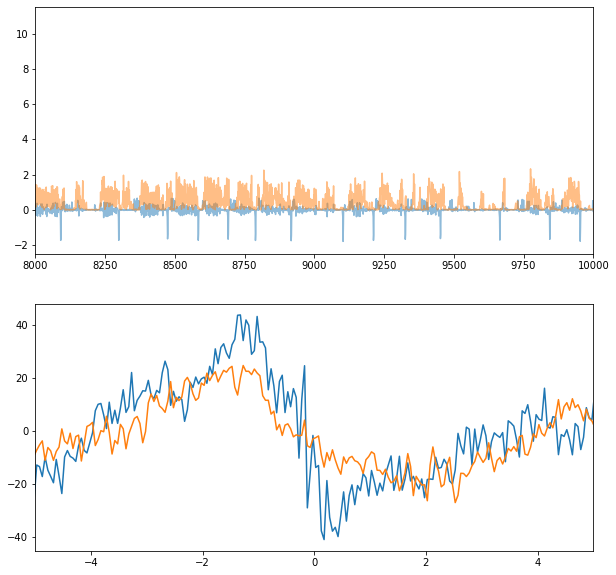

In [163]:
fig = plt.figure(figsize = [10,10])
ax = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
lp = multi_session_dict['DLC_aligned'][0]['Lickport','diff_signed','x'].values.copy()
#lp[lp<0] = 0
jaw = multi_session_dict['DLC_aligned'][0]['Jaw','diff','y']

ax.plot(lp,alpha = .5)
ax.plot(jaw,alpha = .5)
for s,e in zip([0,10000],[5000,15000]):

    
    ax.set_xlim([s,e])
    cc = scipy.signal.correlate(lp[s:e], jaw[s:e], mode='full', method='auto')

    ax2.plot((np.arange(len(cc))-len(cc)/2)/20,cc)
    ax2.set_xlim([-5,5])
ax.set_xlim([8000,10000])

In [7]:
# to do 
# add velocity, convolve with calcium kinetics
# change subject to BCI29 - session with nice learning

import matplotlib
font = {'family' : 'normal',
        #'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)


In [8]:
for k in DLC_aligned.keys(): # remove eye and likelihood
    if 'likelihood'in k or 'eye' in k[0].lower() or 'pole' in k[0].lower():
        DLC_aligned.pop(k)
for k in DLC_aligned.keys(): # remove lickport
    if 'lickport' in k[0].lower() or 'pole' in k[0].lower():
        DLC_aligned.pop(k)
# for k in DLC_aligned.keys(): # remove everything but lickport
#     if ('lickport' not in k[0].lower() and 'pole' not in k[0].lower()) or ('lickport' in k[0].lower() and 'y' == k[2]):
#         DLC_aligned.pop(k)
for k in DLC_aligned.keys(): # normalize data
    DLC_aligned[k] = (DLC_aligned[k] - DLC_aligned[k].mean())/DLC_aligned[k].std()
    #DLC_aligned[k] = (DLC_aligned[k] - DLC_aligned[k].quantile(.05))/(DLC_aligned[k].quantile(.95)-DLC_aligned[k].quantile(.05))

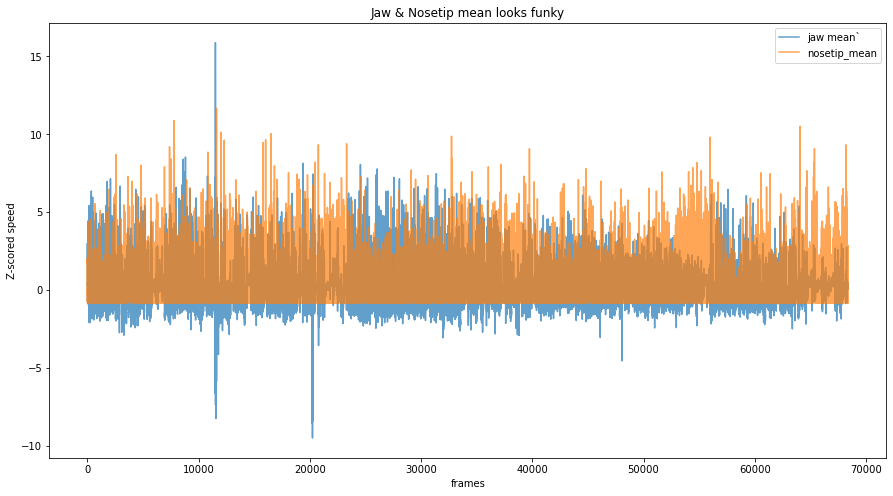

In [165]:
fig = plt.figure(figsize = [15,8])
ax1 = fig.add_subplot(1,1,1)
ax1.plot(DLC_aligned["Jaw"]['mean']['x'], alpha = .7,label = 'jaw mean`')
ax1.plot(DLC_aligned["NoseTip"]['diff']['x'], alpha = .7,label = 'nosetip_mean')
ax1.set_title('Jaw & Nosetip mean looks funky')
ax1.set_xlabel('frames')
ax1.set_ylabel('Z-scored speed')
#ax1.set_xlim([0,1000])
ax1.legend()

In [9]:
#create offsets - 1 second back and forward
offsets = np.arange(-20,25,5)
cols_new = []
for col in DLC_aligned.columns:
    for offset in offsets:
        cols_new.append((col[0],offset,col[1],col[2]))
df2 = pd.DataFrame(0, index=range(0), columns=cols_new)#dlc_data.columns)

for k in df2.keys():
    df2[k] = pd.Series(np.roll(DLC_aligned[k[0],k[2],k[3]],k[1]))
DLC_aligned = df2        

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


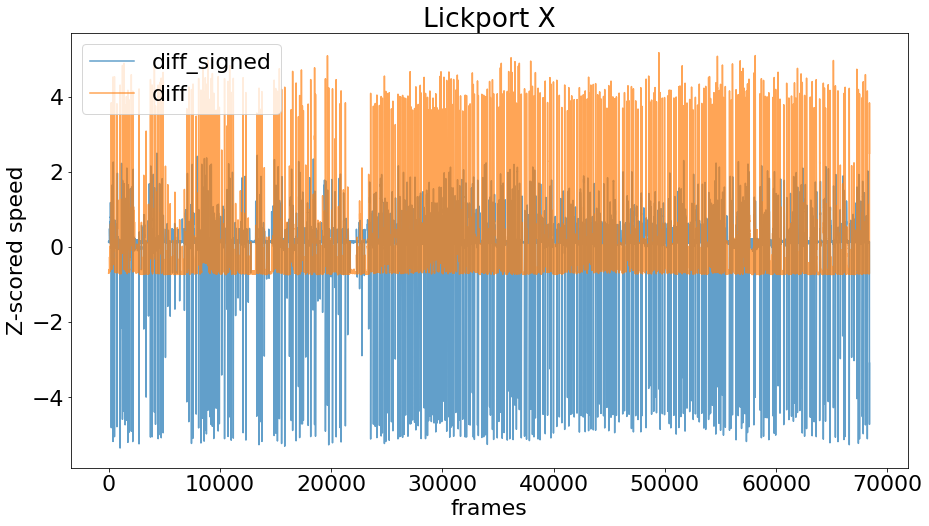

In [41]:
fig = plt.figure(figsize = [15,8])
ax1 = fig.add_subplot(1,1,1)
ax1.plot(DLC_aligned["Lickport"]['diff_signed']['x'], alpha = .7,label = 'diff_signed')
ax1.plot(DLC_aligned["Lickport"]['diff']['x'], alpha = .7,label = 'diff')
ax1.set_title('Lickport X')
ax1.set_xlabel('frames')
ax1.set_ylabel('Z-scored speed')
#ax1.set_xlim([0,1000])
ax1.legend()

In [10]:
scores, beta, intercept = pipeline_regression.linear_regression(F, DLC_aligned)


Calculating regression fit for 364 neurons, May take time


100%|██████████| 364/364 [07:21<00:00,  1.21s/it]


In [11]:
np.argsort(scores)[::-1][:20]

array([  8,  58, 135,   2,  84, 122, 115, 101, 198,  21, 208,  50, 118,
        66,  61, 127, 336, 287,  57, 234])

Text(0.0026181461467687387, 0.044879343890118495, 'neuron 101')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


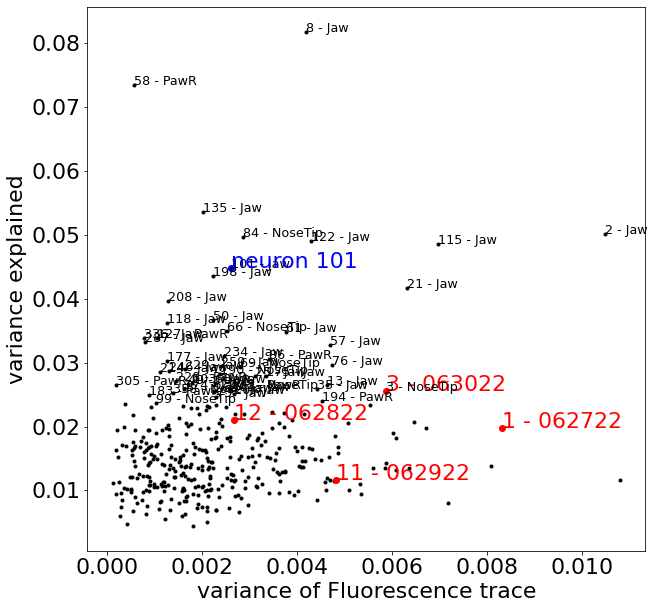

In [12]:
fig = plt.figure(figsize = [10,10])
ax=fig.add_subplot(1,1,1)
ax.plot(np.var(F,1),scores,'k.')
for cn,session in zip(multi_session_dict['cn'],multi_session_dict['session']):
    ax.plot(np.var(F,1)[cn],scores[cn],'ro')
    ax.text(np.var(F,1)[cn],scores[cn],'{} - {}'.format(cn,session),color = 'red')
ax.set_xlabel('variance of Fluorescence trace')
ax.set_ylabel('variance explained')
for cn in np.argsort(scores)[::-1][:50]:

    ax.text(np.var(F,1)[cn],scores[cn],'{} - {}'.format(cn,DLC_aligned.keys()[np.argsort(np.abs(beta[cn]))[::-1][0]][0]),color = 'black',size = 'xx-small')
cn = 101
ax.plot(np.var(F,1)[cn],scores[cn],'bo')
ax.text(np.var(F,1)[cn],scores[cn],'neuron {}'.format(cn),color = 'blue')

In [13]:
multi_session_dict['cn']

[1, 12, 11, 3]

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


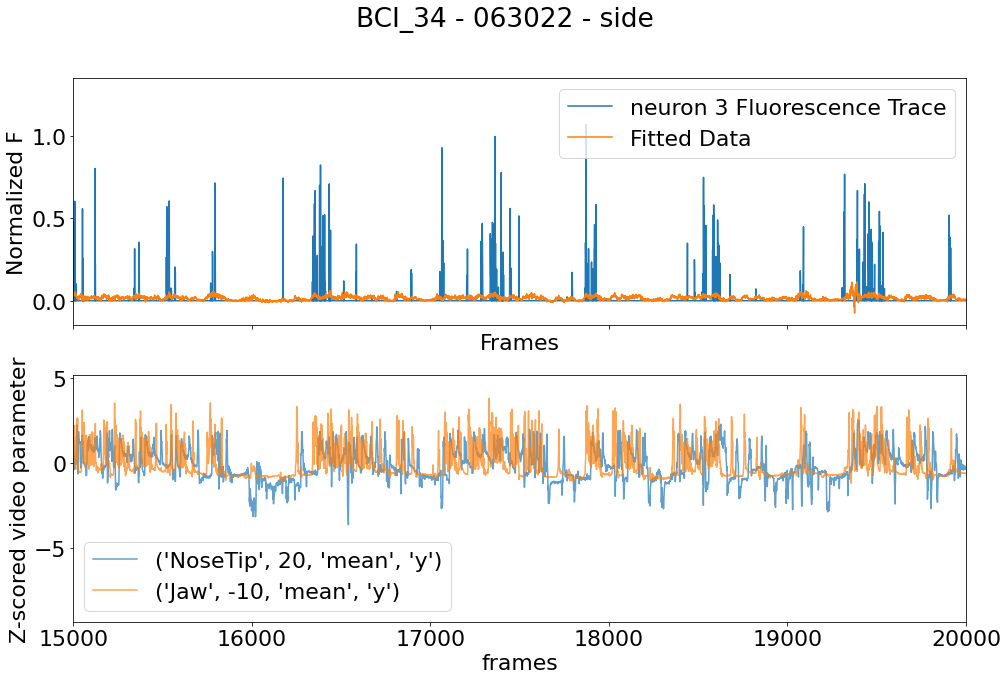

In [14]:
import matplotlib.pyplot as plt
cn = 3#dict_aligned['cn'] #54
def plot_regression(neuron=cn):
    _, axs = plt.subplots(2, 1, figsize=(16,10),sharex=True)
    plt.suptitle(f"{mouse} - {session} - {camera}")# - {FOV}")
    axs[0].plot(F[neuron, :], label=f'neuron {neuron} Fluorescence Trace')
    axs[0].plot((beta[neuron]@DLC_aligned.T) + intercept[neuron], label='Fitted Data')
    #axs[0].plot(F[neuron, :]-((beta[neuron]@DLC_aligned.T) + intercept[neuron]),'k-', label='Difference')
    # ax[0,0].set_title(f'{end-start} timepoints, score {scores[cn]:0.2f}')
    axs[0].set_xlabel("Frames")
    axs[0].set_ylabel("Normalized F")
    axs[0].legend()
    for i in np.argsort(np.abs(beta[neuron]))[::-1][:2]:
        axs[1].plot(DLC_aligned[DLC_aligned.keys()[i]], alpha = .7,label = DLC_aligned.keys()[i])
    # try:
    #     axs[1].plot(DLC_aligned["Lickport"]['diff_signed']['x'][:10000], alpha = .7,label = 'diff_signed')
    #     axs[1].plot(DLC_aligned["Lickport"]['diff']['x'][:10000], alpha = .7,label = 'diff')
    #     axs[1].set_title('Lickport X')
    # except:
    #     try:
    #         axs[1].plot(DLC_aligned["TongueTip"]['diff_signed']['y'][:10000], alpha = .7,label = 'diff_signed')
    #         axs[1].plot(DLC_aligned["TongueTip"]['diff']['y'][:10000], alpha = .7,label = 'diff')
    #         axs[1].set_title('Tongue Y')
    #     except:
    #         pass
    axs[1].set_xlabel('frames')
    axs[1].set_ylabel('Z-scored video parameter')
    axs[1].legend()
    axs[0].set_xlim([15000,20000])
    #plt.plot()
plot_regression(cn)

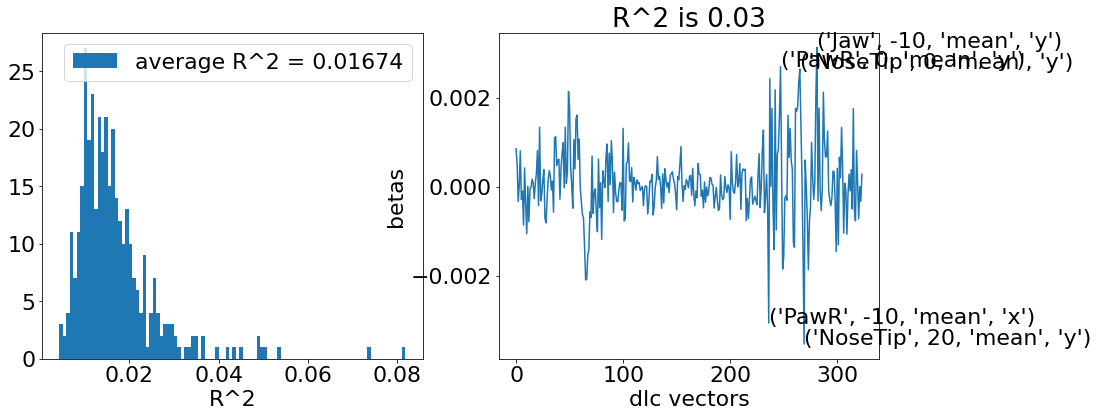

In [15]:

fig = plt.figure(figsize = [15,6])
ax_scores = fig.add_subplot(1,2,1)
ax_scores.hist(scores, bins=100, label=f'average R^2 = {np.mean(scores):0.5f}')
ax_scores.legend()
ax_scores.set_xlabel('R^2')
ax_beta_cn = fig.add_subplot(1,2,2)
ax_beta_cn.plot(beta[cn,:])
ax_beta_cn.set_xlabel('dlc vectors')
ax_beta_cn.set_ylabel('betas')
ax_beta_cn.set_title('R^2 is {}'.format(np.round(scores[cn],2)))
for i in np.argsort(np.abs(beta[cn,:]))[::-1][:5]:
    ax_beta_cn.text(i,beta[cn,i],DLC_aligned.keys()[i])
#plt.show

In [16]:
# offset in time
score_list = []
beta_list = []
offsets = np.arange(-155,155,5)
offsets = np.arange(-20,10,5)
for offset in offsets:
    scores_, beta_, intercept_ = pipeline_regression.linear_regression(np.roll(F[cn:cn+1],offset,1), DLC_aligned)
    score_list.append(scores_[0])
    beta_list.append(beta_[0])
#plt.plot(offsets/20,score_list)

Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:01<00:00,  1.13s/it]


Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:01<00:00,  1.18s/it]


Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:01<00:00,  1.18s/it]


Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:01<00:00,  1.20s/it]


Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:01<00:00,  1.16s/it]


Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:01<00:00,  1.18s/it]


Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:01<00:00,  1.16s/it]


Text(0.5, 1.0, 'betas at optimal offset')

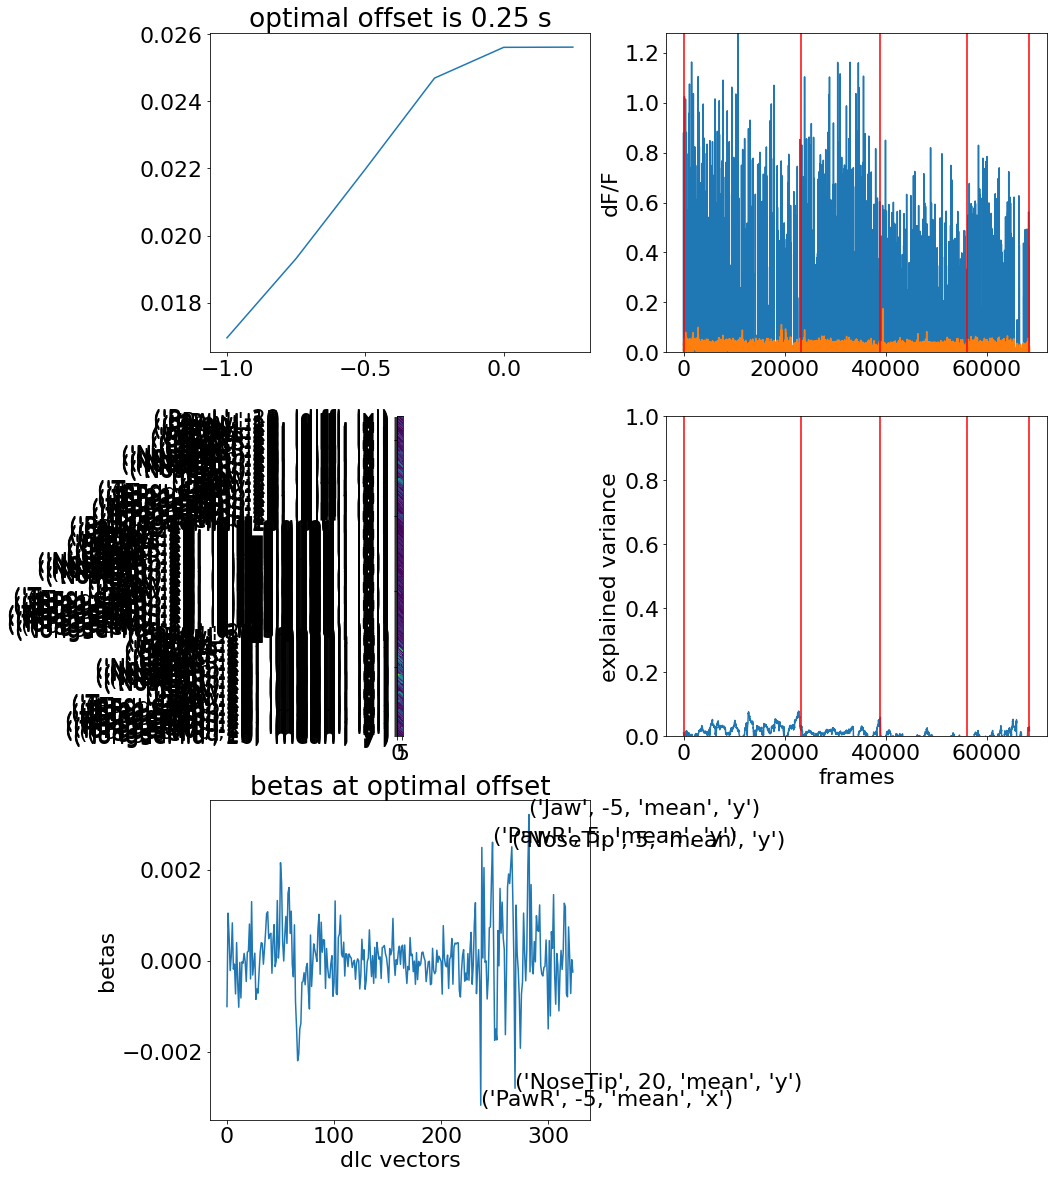

In [17]:
fig = plt.figure(figsize = [15,20])
ax1= fig.add_subplot(3,2,1)
ax2= fig.add_subplot(3,2,3)
ax1.plot(offsets/20,score_list)
ax1.set_title('optimal offset is {} s'.format(offsets[np.argmax(score_list)]/20))
beta_array = np.abs(np.asarray(beta_list).squeeze().T)
# beta_array = beta_array - np.min(beta_array,1)[:,np.newaxis]
# beta_array = beta_array / np.max(beta_array,1)[:,np.newaxis]
ax2.imshow(beta_array)
# ticks =np.arange(0,33,5)
# ax2.set_xticks(ticks)
# ax2.set_xticklabels(offsets[ticks]/20)
# ax2.set_xticklabels(offsets[ticks]/20)
ax2.set_yticks(np.arange(0,len(DLC_aligned.keys()),1))
ax2.set_yticklabels(DLC_aligned.keys())
ax3 = fig.add_subplot(3,2,2)
    
ax3.plot(F[cn, :], label=f'neuron {cn} Flourescence Trace')
scores_, beta_, intercept_ = pipeline_regression.linear_regression(np.roll(F[cn:cn+1],offsets[np.argmax(score_list)],1), DLC_aligned)
scores_ = scores_[0]
beta_ = beta_[0]
intercept_ = intercept_[0]
ax3.plot((beta_@DLC_aligned.T.values) + intercept_, label='Fitted Data')
#ax3.set_xlim([0,10000])
ax3.set_ylim([np.min(F[cn, :]),np.max(F[cn, :])])
ax3.set_ylabel('dF/F')
ax3.vlines(np.cumsum(np.concatenate([[0],session_frame_nums])),ymin = ax3.get_ylim()[0],ymax = ax3.get_ylim()[1],color = 'red')
var_win = 1000
original_variance = BCI_analysis.plot_utils.rollingfun(F[cn, :],var_win,'var')
predicted_variance =BCI_analysis.plot_utils.rollingfun((beta_@DLC_aligned.T.values) + intercept_,var_win,'var') 
residual_variance = BCI_analysis.plot_utils.rollingfun(F[cn, :] - ((beta_@DLC_aligned.T.values) + intercept_),var_win,'var')
nonexplained_variance = np.abs(residual_variance)/original_variance

ax_diff = fig.add_subplot(3,2,4,sharex = ax3)
#ax_diff.plot((original_variance-residual_variance)/original_variance,'k-')
#ax_diff.plot(original_variance)
ax_diff.plot(1-nonexplained_variance)
ax_diff.set_ylim([0,1])
ax_diff.vlines(np.cumsum(np.concatenate([[0],session_frame_nums])),ymin = ax_diff.get_ylim()[0],ymax = ax_diff.get_ylim()[1],color = 'red')

ax_diff.set_xlabel('frames')
ax_diff.set_ylabel('explained variance')
#ax_diff.plot(residual_variance)
ax_beta_cn = fig.add_subplot(3,2,5)
ax_beta_cn.plot(beta_)
ax_beta_cn.set_xlabel('dlc vectors')
ax_beta_cn.set_ylabel('betas')
for i in np.argsort(np.abs(beta_))[::-1][:5]:
    ax_beta_cn.text(i,beta_[i],DLC_aligned.keys()[i])
ax_beta_cn.set_title('betas at optimal offset')

(0.0, 5000.0)

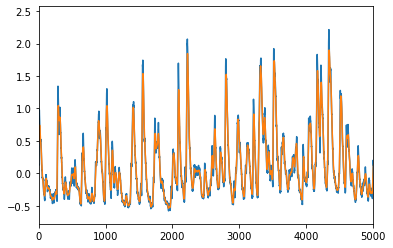

In [378]:
idx = 18
filt_win = 20

F_test_session_filtered = []
for f in F_test_session:
    F_test_session_filtered.append(BCI_analysis.plot_utils.rollingfun(f,filt_win,'mean'))
F_test_session_filtered=np.asarray(F_test_session_filtered)
plt.plot(F_test_session[idx,:])
plt.plot(F_test_session_filtered[idx,:])
plt.xlim([0,5000])

In [449]:
np.concatenate(frame_indices_fit_session_all)
#F_fit_session.shape

array([    0,     1,     2, ..., 31518, 31519, 31520])

In [11]:
len(stats_dict_ALL)


41

In [1019]:
needed_sessions = np.where(np.asarray(multi_session_dict['mouse']) == mouse_now)[0]

array([4, 5, 6, 7])

In [ ]:
X = DLC_aligned_fit_session.iloc[np.concatenate(frame_indices_fit_session_all[trial_indices_fit_session_fit_subset])].values
                Y = F_fit_session[cn,np.concatenate(frame_indices_fit_session_all[trial_indices_fit_session_fit_subset])]
                X_test = DLC_aligned_fit_session.iloc[np.concatenate(frame_indices_fit_session_all[trial_indices_fit_session_test_subset])].values
                Y_test = F_fit_session[cn,np.concatenate(frame_indices_fit_session_all[trial_indices_fit_session_test_subset])]
                X_test_session = DLC_aligned_test_session
                Y_test_session = F_test_session

In [144]:
# Fit CN on other days' activity, identify movement based on beta values
import seaborn
import matplotlib
import random
import scipy
from sklearn.linear_model import LinearRegression,Ridge,Lasso

from sklearn.neural_network import MLPRegressor
# from sklearn.datasets import make_regression
# from sklearn.model_selection import train_test_split

font = {'family' : 'normal',
        #'weight' : 'bold',
        'size'   : 14}
figsavepath = '/home/jupyter/bucket/plots/linear_regression'
figsavepath = '/home/jupyter/bucket/plots/linear_regression/All_cells_all_sessions'
matplotlib.rc('font', **font)
stats_metadata_ALL = {'pearsons_train_r_median':[],
                      'pearsons_train_p':[],
                      'pearsons_test_r_median':[],
                      'pearsons_test_p':[],
                      'pearsons_test_session_r_median':[],
                      'pearsons_test_session_p':[],
                      'spearman_train_r_median':[],
                      'spearman_train_p':[],
                      'spearman_test_r_median':[],
                      'spearman_test_p':[],
                      'spearman_test_session_r_median':[],
                      'spearman_test_session_p':[],
                      'slope_raw_train_median':[],
                      'slope_raw_train_p':[],
                      'slope_raw_test_median':[],
                      'slope_raw_test_p':[],
                      'slope_raw_test_session_median':[],
                      'slope_raw_test_session_p':[],
                      'r2_train_median':[],
                      'r2_test_median':[],
                      'r2_test_session_median':[],
                      'r2_train_p':[],
                      'r2_test_p':[],
                      'r2_test_session_p':[],
                      'session':[],
                      'mouse':[],
                      'train_sessions':[],
                      'stat_dict':[],
                     'scrambled':[],
                     'reversed':[]}
stats_dict_ALL = []




bootstrap_ratio = .5 #fraction of trials in training set
bootstrap_n = 100 # number of bootstrap repeats

filter_f = False # moving average
filt_win = 10 # moving average
reverse_f = False # reverse time of imaging 
#scramble_f = False # scrambles the trials - fluorescence is no longer aligned to behavior
use_all_available_test_sessions = True # use all previous sessions of the same FOV where the CN was not the  same as the CN on the test day
fit_sessions_in_future_as_well = True
run_on_all_cells = False
plot_movement_correlations = False
create_images = False
#regression_dict = {'type':'linear regression'}
regression_dict = {'type':'ridge regression',
                  'ridge_alpha':10000}
#regression_dict = {'type':'mlp'}
for scramble_f in [False,True]:
    for mouse_now in np.unique(multi_session_dict['mouse']):
        needed_sessions = np.where(np.asarray(multi_session_dict['mouse']) == mouse_now)[0]
        if not fit_sessions_in_future_as_well:
            needed_sessions = needed_sessions[1:]
        #for fit_session,test_session in zip(needed_sessions[:-1],needed_sessions[1:]):# add multiple fit sessions
        for test_session in needed_sessions[::-1]:
            test_session_neuron_num = multi_session_dict['F'][test_session].shape[0]
            if run_on_all_cells:
                cn_list = np.arange(test_session_neuron_num)
                #cn_list = [ 97, 204, 118]
                # cn_list = [ 97, 204, 118, 159,  24,  87,   4, 133,  78, 124, 438,  16,  66,
                #            100,  28, 264,  10, 145,  71,  30, 413, 171,  27, 200,   3,  14,
                #            309, 107,  95, 367, 457, 590, 173, 208, 374, 545, 485, 158, 194,
                #            463, 276,  68,  25, 231, 429, 123, 109, 209, 603, 337, 496, 322,
                #            214, 555, 243, 202, 378, 531, 230, 346, 289, 127, 293, 242,  43,
                #            271, 436, 549, 505, 221, 199,  92, 450, 163, 352, 238, 577, 368,
                #            377, 513, 484, 246, 478, 150, 418, 172, 529, 578, 295, 197, 519,
                #             80, 112, 536, 525, 510, 527, 258, 272, 212, 550, 506, 394, 193,
                #             72, 427, 434, 175, 425, 320,  57, 511, 353, 593, 165, 502, 419,
                #            468, 207, 299,  26, 300, 296, 393, 373, 601, 167, 483, 206, 584,
                #            535,  83, 384,   5, 518, 439, 566,  59, 385, 354, 569, 544, 477,
                #            285, 391, 432, 552, 316, 460, 530, 110, 452, 574, 210, 298, 217,
                #            390,  64, 351, 426, 414, 546, 411, 470, 466, 177, 559, 512, 582,
                #             65, 274,  91,  41, 540, 198, 407, 537, 225, 420, 144, 491, 516,
                #            459, 465, 498, 494, 444, 328, 362, 567, 240, 462, 495, 515, 185,
                #             88, 275, 538, 369, 116,  94, 443, 218, 424, 412, 448, 562, 313,
                #            556, 521, 226, 487, 428, 256, 421, 472, 558, 228, 543, 132, 458,
                #            492, 237,  63, 430, 405, 136, 469, 113, 355, 403, 481, 257, 364,
                #            310, 154, 312, 575, 474, 486, 591, 332, 604, 181, 101, 149, 588,
                #            528, 568, 501, 608, 489, 125, 488, 618, 326, 166, 610, 533, 179,
                #            504, 447,  69, 306, 579, 400, 239, 220, 523, 381, 156,  37, 138,
                #            602,  53, 616, 615, 215, 539, 423, 455, 134, 331, 471, 551, 606,
                #            363, 595, 140, 379, 453, 586, 404, 433, 387, 380, 395, 335, 441,
                #             15, 621,  38, 196, 189,   7, 609,  89, 137, 280, 314, 581, 451,
                #            115, 572, 619, 475, 365, 283, 236, 476, 597, 248, 361, 126, 168,
                #            244, 131, 557,  61, 317, 398, 532, 111, 464, 318, 440, 573, 201,
                #             19, 560, 553, 287, 388, 323, 267, 594, 266, 600, 611, 153, 157,
                #            375, 456, 191, 286, 382,  32, 508,  21,  35, 359, 614,  50, 247,
                #            311, 234, 106, 370, 279, 278, 580, 347, 386, 596, 348, 330, 587,
                #             34, 227, 565, 356, 514,  18, 564, 162,  75, 186, 599, 164, 205,
                #            598, 497,  85, 442, 344, 304, 254, 152,  96, 490, 479, 187, 445,
                #            509, 561, 473,  74, 182, 216, 229, 222, 262, 431,  54, 576, 292,
                #            340, 321,  46, 269, 184, 338, 617, 195, 343,   0, 305, 147,  90,
                #            482, 143, 160, 522, 284, 224,  44, 188, 249, 273, 141, 169, 259,
                #            342, 446, 325, 547, 526,  73, 146, 467, 301, 192, 417, 542, 142,
                #            410, 360,  11,  79, 263, 500, 507,  77, 416, 294,  51, 620, 288,
                #            383, 415,  98, 114, 399, 253, 170, 461, 612,  22, 334, 605, 250,
                #            345, 151, 534, 255, 241, 437, 297,  70, 223, 396, 174,  58, 290,
                #            135,  62, 282, 583, 319, 333, 409, 129, 281,  99,  33, 119, 406,
                #            103, 303, 392, 493, 592, 517,   2,  67, 371, 251, 372, 435, 585,
                #            358, 178,  49,   9, 520,  52,  40, 302, 180,  45,   8,   6, 402,
                #             86, 524, 148, 503,   1,  55, 349,  31, 183,  81, 397, 291, 203,
                #            499, 329, 607, 589, 219, 308, 117, 336, 570,  93, 265, 213,  12,
                #            105,  47,  60, 339,  56, 563, 324, 245, 541, 341, 480, 366, 104,
                #            449, 155, 408,  82,  84, 357,  17, 315,  39, 454, 108, 268, 613,
                #            128, 102, 190, 277, 176, 121, 161, 139,  76, 422,  36,  29, 235,
                #            122, 232, 389,  23, 130, 307, 376, 401, 211,  20,  48, 233, 350,
                #            260, 548, 327,  13, 554, 270,  42, 261, 571, 120, 252]
            else:
                cn_list = [multi_session_dict['cn'][test_session] ]
                
            for cn in cn_list:
                if use_all_available_test_sessions:
                    
                    fit_session_list = []
                    fit_session_name_list = []
                    if fit_sessions_in_future_as_well:
                        potential_sessions = np.arange(len(multi_session_dict['mouse']))
                    else:
                        potential_sessions = np.arange(test_session)
                    for potential_session in potential_sessions:# add multiple fit sessions - even the ones after  #:# only sessions before conditioned
                        if (multi_session_dict['mouse'][potential_session] == mouse_now) and \
                        (multi_session_dict['F'][potential_session].shape[0]==test_session_neuron_num) and \
                        (multi_session_dict['cn'][potential_session]!=cn) and \
                        potential_session != test_session:
                            fit_session_list.append(potential_session)
                            fit_session_name_list.append(multi_session_dict['session'][potential_session])
                    print('sessions used: {}'.format(fit_session_name_list))
                    for fit_session_i, fit_session in enumerate(fit_session_list):
                        if fit_session_i == 0:
                            DLC_aligned_fit_session = multi_session_dict['DLC_aligned'][fit_session].copy()
                            F_fit_session = multi_session_dict['F'][fit_session].copy()
                            trial_end_frames_fit_session = np.asarray(multi_session_dict['trial_end_frames'][fit_session])
                            trial_start_frames_fit_session = np.concatenate([[0],trial_end_frames_fit_session[:-1]])
                        else:
                            DLC_aligned_fit_session = pd.concat([DLC_aligned_fit_session, multi_session_dict['DLC_aligned'][fit_session].copy()], ignore_index=True)

                            trial_end_frames_fit_session = np.asarray(multi_session_dict['trial_end_frames'][fit_session]) + F_fit_session.shape[1]
                            trial_start_frames_fit_session = np.concatenate([[F_fit_session.shape[1]],trial_end_frames_fit_session[:-1]])
                            F_fit_session = np.concatenate([F_fit_session,multi_session_dict['F'][fit_session].copy()],1)

                    frame_indices_fit_session_all = []
                    for start_frame, end_frame in zip(trial_start_frames_fit_session,trial_end_frames_fit_session):
                        frame_indices_fit_session_all.append(np.arange(start_frame,end_frame))
                    frame_indices_fit_session_all = np.asarray(frame_indices_fit_session_all,dtype=object) 

                else:
                    fit_session = test_session -1 
                    
                    fit_session_name_list = [multi_session_dict['session'][fit_session]]
                    DLC_aligned_fit_session = multi_session_dict['DLC_aligned'][fit_session].copy()
                    F_fit_session = multi_session_dict['F'][fit_session]
                    trial_end_frames_fit_session = np.asarray(multi_session_dict['trial_end_frames'][fit_session])
                    trial_start_frames_fit_session = np.concatenate([[0],trial_end_frames_fit_session[:-1]])
                    frame_indices_fit_session_all = []
                    for start_frame, end_frame in zip(trial_start_frames_fit_session,trial_end_frames_fit_session):
                        frame_indices_fit_session_all.append(np.arange(start_frame,end_frame))
                    frame_indices_fit_session_all = np.asarray(frame_indices_fit_session_all,dtype=object)
                # create an array of frames in each trial for later subselection of frames






                F_fit_session_filtered = []
                if filter_f:
                    for f in F_fit_session:
                        F_fit_session_filtered.append(BCI_analysis.plot_utils.rollingfun(f,filt_win,'mean'))
                    F_fit_session_filtered=np.asarray(F_fit_session_filtered)
                    F_fit_session = F_fit_session_filtered

                    F_test_session_filtered = []
                    for f in F_test_session:
                        F_test_session_filtered.append(BCI_analysis.plot_utils.rollingfun(f,filt_win,'mean'))
                    F_test_session_filtered=np.asarray(F_test_session_filtered)
                    F_test_session = F_test_session_filtered
                if reverse_f:
                    F_fit_session = F_fit_session[:,::-1]
                    F_test_session = F_test_session[:,::-1]

                DLC_aligned_test_session = multi_session_dict['DLC_aligned'][test_session].copy()
                F_test_session = multi_session_dict['F'][test_session].copy()
                # create an array of frames in each trial for later subselection of frames
                trial_end_frames_test_session = np.asarray(multi_session_dict['trial_end_frames'][test_session])
                trial_start_frames_test_session = np.concatenate([[0],trial_end_frames_test_session[:-1]])
                frame_indices_test_session_all = []
                for start_frame, end_frame in zip(trial_start_frames_test_session,trial_end_frames_test_session):
                    frame_indices_test_session_all.append(np.arange(start_frame,end_frame))
                frame_indices_test_session_all = np.asarray(frame_indices_test_session_all,dtype=object)

                for k in DLC_aligned_fit_session.keys():
                    if 'mean' in k:# subtract mean from the raw position from day to day
                        DLC_aligned_fit_session[k] = DLC_aligned_fit_session[k] - np.nanmean(DLC_aligned_fit_session[k])
                        DLC_aligned_test_session[k] = DLC_aligned_test_session[k] - np.nanmean(DLC_aligned_test_session[k])


                DLC_aligned_all = pd.concat([DLC_aligned_fit_session, DLC_aligned_test_session], ignore_index=True)
                print(DLC_aligned_all.shape)



                for k in DLC_aligned_all.keys(): # remove eye and likelihood
                    if 'likelihood'in k or 'eye' in k[0].lower() or 'pole' in k[0].lower():
                        DLC_aligned_all.pop(k)
                        DLC_aligned_fit_session.pop(k)
                        DLC_aligned_test_session.pop(k)
                for k in DLC_aligned_all.keys(): # remove lickport
                    if 'lickport' in k[0].lower() or 'pole' in k[0].lower():# or 'mean' in k:# or 'NoseTip' in k: #remove mean as well
                        DLC_aligned_all.pop(k)
                        DLC_aligned_fit_session.pop(k)
                        DLC_aligned_test_session.pop(k)

                for k in DLC_aligned_all.keys(): # normalize movement data (two sessions together)
                    DLC_aligned_fit_session[k] = (DLC_aligned_fit_session[k] - DLC_aligned_all[k].mean())/DLC_aligned_all[k].std()
                    DLC_aligned_test_session[k] = (DLC_aligned_test_session[k] - DLC_aligned_all[k].mean())/DLC_aligned_all[k].std()
                    DLC_aligned_all[k] = (DLC_aligned_all[k] - DLC_aligned_all[k].mean())/DLC_aligned_all[k].std()

                stats_dict = {'pearsons_train_r_list':[],
                             'pearsons_train_p_list':[],
                             'pearsons_test_r_list':[],
                             'pearsons_test_p_list':[],
                             'pearsons_test_session_r_list':[],
                             'pearsons_test_session_p_list':[],
                             'spearman_train_r_list':[],
                             'spearman_train_p_list':[],
                             'spearman_test_r_list':[],
                             'spearman_test_p_list':[],
                             'spearman_test_session_r_list':[],
                             'spearman_test_session_p_list':[],
                             'slope_raw_train':[],
                             'slope_raw_test':[],
                             'slope_raw_test_session':[],
                             'r2_train':[],
                             'r2_test':[],
                             'r2_test_session':[],
                             'betas':[]}
                             #'slope_binned_list':[]}



                for bootstrap_i in range(bootstrap_n):


                    # subselect training frames for training day
                    trial_indices_fit_session = np.arange(len(frame_indices_fit_session_all))
                    random.shuffle(trial_indices_fit_session)
                    trial_indices_fit_session_fit_subset = trial_indices_fit_session[:int(len(trial_indices_fit_session)*bootstrap_ratio)]
                    trial_indices_fit_session_test_subset = trial_indices_fit_session[int(len(trial_indices_fit_session)*bootstrap_ratio):]

                    X = DLC_aligned_fit_session.iloc[np.concatenate(frame_indices_fit_session_all[trial_indices_fit_session_fit_subset])].values
                    Y = F_fit_session[cn,np.concatenate(frame_indices_fit_session_all[trial_indices_fit_session_fit_subset])]
                    X_test = DLC_aligned_fit_session.iloc[np.concatenate(frame_indices_fit_session_all[trial_indices_fit_session_test_subset])].values
                    Y_test = F_fit_session[cn,np.concatenate(frame_indices_fit_session_all[trial_indices_fit_session_test_subset])]
                    X_test_session = DLC_aligned_test_session
                    Y_test_session = F_test_session[cn,:]


                    if scramble_f:
                        new_order = trial_indices_fit_session_fit_subset
                        random.shuffle(new_order)
                        Y = F_fit_session[cn,np.concatenate(frame_indices_fit_session_all[new_order])]
                        new_order = trial_indices_fit_session_test_subset
                        random.shuffle(new_order)
                        Y_test = F_fit_session[cn,np.concatenate(frame_indices_fit_session_all[new_order])]
                    
                    

                    
                    
                    if regression_dict['type'] == 'linear regression':
                        lr = LinearRegression()   #Ridge(alpha = ridge_alpha)#Lasso(lasso_alpha/100)#
                        lr.fit(X,Y)
                        beta = lr.coef_
                        intercept = lr.intercept_
                        score_train=lr.score(X, Y)
                        score_test=lr.score(X_test, Y_test)
                        score_test_session=lr.score(X_test_session, Y_test_session)
                        Y_fitted = (beta@X.T) + intercept
                        Y_fitted_test = (beta@X_test.T) + intercept
                        Y_fitted_test_session = (beta@X_test_session.T) + intercept
                    elif regression_dict['type'] == 'ridge regression':
                        lr = Ridge(alpha = regression_dict['ridge_alpha'])#Lasso(lasso_alpha/100)#
                        lr.fit(X,Y)
                        beta = lr.coef_
                        intercept = lr.intercept_
                        score_train=lr.score(X, Y)
                        score_test=lr.score(X_test, Y_test)
                        score_test_session=lr.score(X_test_session, Y_test_session)
                        Y_fitted = (beta@X.T) + intercept
                        Y_fitted_test = (beta@X_test.T) + intercept
                        Y_fitted_test_session = (beta@X_test_session.T) + intercept
                            
                    elif regression_dict['type'] == 'mlp':
                        regr = MLPRegressor(random_state=1, max_iter=500,hidden_layer_sizes = (5,)).fit(X, Y)
                        beta = []
                        score_train=regr.score(X, Y)
                        score_test=regr.score(X_test, Y_test)
                        score_test_session=regr.score(X_test_session, Y_test_session)
                        Y_fitted = regr.predict(X)
                        Y_fitted_test = regr.predict(X_test)
                        Y_fitted_test_session = regr.predict(X_test_session)
                    #print([score_train,score_test,score_test_session])
                    

                    pearsons_train, pearsons_train_p = scipy.stats.pearsonr(Y, Y_fitted)
                    pearsons_test, pearsons_test_p = scipy.stats.pearsonr(Y_test, Y_fitted_test)
                    pearsons_test_session, pearsons_test_session_p = scipy.stats.pearsonr(Y_test_session, Y_fitted_test_session)

                    spearman_r_train,spearman_p_train = scipy.stats.spearmanr(Y, Y_fitted)
                    spearman_r_test,spearman_p_test = scipy.stats.spearmanr(Y_test, Y_fitted_test)
                    spearman_r_test_session,spearman_p_test_session = scipy.stats.spearmanr(Y_test_session, Y_fitted_test_session)

                    p_train = np.polyfit(Y,Y_fitted,1)
                    p = np.polyfit(Y_test,Y_fitted_test,1)
                    p_test_session = np.polyfit(Y_test_session,Y_fitted_test_session,1)

                    stats_dict['pearsons_train_r_list'].append(pearsons_train)
                    stats_dict['pearsons_train_p_list'].append(pearsons_train_p)
                    stats_dict['pearsons_test_r_list'].append(pearsons_test)
                    stats_dict['pearsons_test_p_list'].append(pearsons_test_p)
                    stats_dict['pearsons_test_session_r_list'].append(pearsons_test_session)
                    stats_dict['pearsons_test_session_p_list'].append(pearsons_test_session_p)
                    stats_dict['spearman_train_r_list'].append(spearman_r_train)
                    stats_dict['spearman_train_p_list'].append(spearman_p_train)
                    stats_dict['spearman_test_r_list'].append(spearman_r_test)
                    stats_dict['spearman_test_p_list'].append(spearman_p_test)
                    stats_dict['spearman_test_session_r_list'].append(spearman_r_test_session)
                    stats_dict['spearman_test_session_p_list'].append(spearman_p_test_session)
                    stats_dict['slope_raw_train'].append(p_train[0])
                    stats_dict['slope_raw_test'].append(p[0])
                    stats_dict['slope_raw_test_session'].append(p_test_session[0])
                    stats_dict['r2_train'].append(score_train)
                    stats_dict['r2_test'].append(score_test)
                    stats_dict['r2_test_session'].append(score_test_session)
                    stats_dict['betas'].append(beta)

                    if bootstrap_i == bootstrap_n - 1:


                        stats_metadata_ALL['pearsons_train_r_median'].append(np.median(np.asarray(stats_dict['pearsons_train_r_list'])))
                        stats_metadata_ALL['pearsons_train_p'].append(np.mean(np.asarray(stats_dict['pearsons_train_r_list'])<0))
                        stats_metadata_ALL['pearsons_test_r_median'].append(np.median(np.asarray(stats_dict['pearsons_test_r_list'])))
                        stats_metadata_ALL['pearsons_test_p'].append(np.mean(np.asarray(stats_dict['pearsons_test_r_list'])<0))
                        stats_metadata_ALL['pearsons_test_session_r_median'].append(np.median(np.asarray(stats_dict['pearsons_test_session_r_list'])))
                        stats_metadata_ALL['pearsons_test_session_p'].append(np.mean(np.asarray(stats_dict['pearsons_test_session_r_list'])<0))
                        stats_metadata_ALL['spearman_train_r_median'].append(np.median(np.asarray(stats_dict['spearman_train_r_list'])))
                        stats_metadata_ALL['spearman_train_p'].append(np.mean(np.asarray(stats_dict['spearman_train_r_list'])<0))
                        stats_metadata_ALL['spearman_test_r_median'].append(np.median(np.asarray(stats_dict['spearman_test_r_list'])))
                        stats_metadata_ALL['spearman_test_p'].append(np.mean(np.asarray(stats_dict['spearman_test_r_list'])<0))
                        stats_metadata_ALL['spearman_test_session_r_median'].append(np.median(np.asarray(stats_dict['spearman_test_session_r_list'])))
                        stats_metadata_ALL['spearman_test_session_p'].append(np.mean(np.asarray(stats_dict['spearman_test_session_r_list'])<0))
                        stats_metadata_ALL['slope_raw_train_median'].append(np.median(np.asarray(stats_dict['slope_raw_train'])))
                        stats_metadata_ALL['slope_raw_train_p'].append(np.mean(np.asarray(stats_dict['slope_raw_train'])<0))
                        stats_metadata_ALL['slope_raw_test_median'].append(np.median(np.asarray(stats_dict['slope_raw_test'])))
                        stats_metadata_ALL['slope_raw_test_p'].append(np.mean(np.asarray(stats_dict['slope_raw_test'])<0))
                        stats_metadata_ALL['slope_raw_test_session_median'].append(np.median(np.asarray(stats_dict['slope_raw_test_session'])))
                        stats_metadata_ALL['slope_raw_test_session_p'].append(np.mean(np.asarray(stats_dict['slope_raw_test_session'])<0))                  
                        stats_metadata_ALL['r2_train_median'].append(np.median(np.asarray(stats_dict['r2_train'])))
                        stats_metadata_ALL['r2_test_median'].append(np.median(np.asarray(stats_dict['r2_test'])))
                        stats_metadata_ALL['r2_test_session_median'].append(np.median(np.asarray(stats_dict['r2_test_session'])))
                        stats_metadata_ALL['r2_train_p'].append(np.mean(np.asarray(stats_dict['r2_train'])<0))
                        stats_metadata_ALL['r2_test_p'].append(np.mean(np.asarray(stats_dict['r2_test'])<0))
                        stats_metadata_ALL['r2_test_session_p'].append(np.mean(np.asarray(stats_dict['r2_test_session'])<0))
                        stats_metadata_ALL['session'].append(multi_session_dict['session'][test_session])
                        stats_metadata_ALL['mouse'].append(multi_session_dict['mouse'][test_session])
                        stats_metadata_ALL['train_sessions'].append(fit_session_name_list)
                        stats_metadata_ALL['stat_dict'].append(stats_dict)
                        stats_metadata_ALL['scrambled'].append(scramble_f)
                        stats_metadata_ALL['reversed'].append(reverse_f)



                        if create_images:

                            fig = plt.figure(figsize = [20,20])
                            ax_fit_train = fig.add_subplot(3,2,1)
                            frame_times_train = np.arange(len(Y))/20
                            ax_fit_train.plot(frame_times_train, Y, label = 'original - training set')
                            ax_fit_train.plot(frame_times_train, Y_fitted, label = 'fitted - training set')
                            if scramble_f:
                                titletext = "{} - {} - neuron {} - Scrambled \n Training set \n R^2: {} \n Pearson r: {} p = {} \n Spearman r: {} p = {}"
                            else:
                                titletext = "{} - {} - neuron {} \n Training set \n R^2: {} \n Pearson r: {} p = {} \n Spearman r: {} p = {}"
                            ax_fit_train.set_title(titletext.format(mouse_now,
                                                                    ','.join(fit_session_name_list),      #1multi_session_dict['session'][fit_session],
                                                                    cn,
                                                                    round(score_train,2),
                                                                    np.round(pearsons_train,2),
                                                                    np.round(pearsons_train_p,2),
                                                                    np.round(spearman_r_train,2),
                                                                    np.round(spearman_p_train,2)))
                            ax_fit_train.set_xlabel('Time (s)')
                            ax_fit_train.set_ylabel('dF/F')
                            ax_fit_train.legend()
                            ax_fit_test = fig.add_subplot(3,2,2,sharex = ax_fit_train)
                            frame_times_test = np.arange(len(Y_test))/20
                            ax_fit_test.plot(frame_times_test, Y_test, label = 'original - test set')
                            ax_fit_test.plot(frame_times_test, Y_fitted_test, label = 'fitted - test set')
                            ax_fit_test.set_title('Test set \n R^2: {} \n Pearson r: {} p = {} \n Spearman r: {} p = {}'.format(round(score_test,2),
                                                                                                                      round(pearsons_test,2),
                                                                                                                     round(pearsons_test_p,2),
                                                                                                                     round(spearman_r_test,2),
                                                                                                                     round(spearman_p_test,2),))
                            ax_fit_test.legend()
                            ax_fit_test.set_xlabel('Time (s)')
                            ax_fit_test.set_xlim([0,300])

                            ax_scatter = fig.add_subplot(3,2,4)
                            ax_scatter.plot(Y_test,Y_fitted_test,'k.',alpha = .1)

                            x_plot = np.percentile(Y_test,[0,100])
                            y_plot = np.polyval(p,x_plot)
                            ax_scatter.plot(x_plot,y_plot,'r-',linewidth = 4)
                            ax_scatter.set_xlabel('Test dF/F')
                            ax_scatter.set_ylabel('Fitted test dF/F')
                            ax_scatter.set_title('y = {}*x + {}'.format(*np.round(p,3)))

                            stats_df = pd.DataFrame.from_dict(stats_dict)
                            ax_rs = fig.add_subplot(3,2,3)
                            mapper = {"pearsons_train_r_list" :'Pearson R train', 
                                      "pearsons_test_r_list":'Pearson R test',
                                      "pearsons_test_session_r_list":'Pearson R test on BCI session',
                                      "spearman_train_r_list":'Spearman R train',
                                      "spearman_test_r_list":'Spearman R test',
                                      "spearman_test_session_r_list":'Spearman R test on BCI session',
                                      "r2_train":'R^2 train',
                                      "r2_test":'R^2 test',
                                      "r2_test_session":'R^2 test on BCI session',
                                      "slope_raw_train":'slope train',
                                      "slope_raw_test":'slope test',
                                      "slope_raw_test_session":'slope test on BCI session'}
                            df_now = stats_df[["pearsons_train_r_list", 
                                               "pearsons_test_r_list",
                                               "pearsons_test_session_r_list",
                                               "spearman_train_r_list",
                                               "spearman_test_r_list",
                                               "spearman_test_session_r_list",
                                               "r2_train",
                                               "r2_test",
                                               "r2_test_session",
                                               "slope_raw_train",
                                               "slope_raw_test",
                                               "slope_raw_test_session"]].rename(columns = mapper)
                            seaborn.swarmplot(data = df_now ,ax = ax_rs,size = 2)
                            ax_rs.set_title('Bootstrapped p: Pearson: {} -- Spearman: {} slope: {}'.format(np.round(np.mean(np.asarray(stats_dict['pearsons_test_r_list'])<0),2),
                                                                                                           np.round(np.mean(np.asarray(stats_dict['spearman_test_r_list'])<0),2),
                                                                                                          np.round(np.mean(np.asarray(stats_dict['slope_raw_test'])<0),2),))
                            #ax_rs.set_ylim([-.5,.5])
                            ax_rs.set_ylim([-.5,1])
                            ax_rs.plot([0,len(df_now.keys())],[0,0],'r--')
                            plt.xticks(rotation=45, ha='right')

                            df_betas = pd.DataFrame(data = np.asarray(stats_dict['betas']),columns=DLC_aligned_fit_session.keys())
                            ax_betas = fig.add_subplot(3,2,6)
                            seaborn.violinplot(data = df_betas ,ax = ax_betas,size = 2)
                            plt.xticks(rotation=90, ha='right')
                            p_needed = .05
                            beta_pvals = np.nanmin(np.asarray([np.nanmean(np.asarray(stats_dict['betas'])<0,0),np.nanmean(np.asarray(stats_dict['betas'])>0,0)]),0)
                            significant_betas = beta_pvals<p_needed
                            for xidx in np.where(significant_betas)[0]:
                                ax_betas.text(xidx, np.nanmax(np.asarray(stats_dict['betas']),0)[xidx],'*',fontsize = 'large',color = 'red')
                            p_needed = .01
                            significant_betas = beta_pvals<p_needed
                            for xidx in np.where(significant_betas)[0]:
                                ax_betas.text(xidx, np.nanmax(np.asarray(stats_dict['betas']),0)[xidx],'**',fontsize = 'large',color = 'red')

                            if scramble_f:
                                figname = '{} - {} - neuron {} on {} - scrambled.png'.format(mouse_now,
                                                                                             ','.join(fit_session_name_list),     #2multi_session_dict['session'][fit_session],
                                                                                             cn,
                                                                                             multi_session_dict['session'][test_session])
                            else:
                                figname = '{} - {} - neuron {} on {}.png'.format(mouse_now,
                                                                                 ','.join(fit_session_name_list),                 #3multi_session_dict['session'][fit_session],
                                                                                 cn,
                                                                                 multi_session_dict['session'][test_session])
                            fig.savefig(os.path.join(figsavepath,figname), dpi='figure', format='png')

                            if plot_movement_correlations:
                                steps_back = 80
                                steps_forward = 80
                                mean_time = np.arange(-1*steps_back,steps_forward)/20
                                beta_pvals = np.nanmin(np.asarray([np.nanmean(np.asarray(stats_dict['betas'])<0,0),np.nanmean(np.asarray(stats_dict['betas'])>0,0)]),0)
                                calcium_trace = F_fit_session[cn,:]
                                calcium_trace_test = F_test_session[cn,:]
                                for part_idx in np.argsort(beta_pvals):#[1:]:
                                    if beta_pvals[part_idx]>.05:
                                        break
                                    beta_sign = int(np.nanmean(np.asarray(stats_dict['betas']),0)[part_idx]/np.abs(np.nanmean(np.asarray(stats_dict['betas']),0)[part_idx]))#* -1
                                    part_name = DLC_aligned_fit_session.keys()[part_idx]
                                    dlc_trace = DLC_aligned_fit_session[part_name].values * beta_sign # now always positive going events will trigger
                                    thresholds = np.arange(np.percentile(dlc_trace,5),np.percentile(dlc_trace,95),.1)
                                    amplitudes = []
                                    n_events = []
                                    for threshold in thresholds: # find threshold in a better way..
                                        events = np.where(np.diff(np.asarray(dlc_trace>threshold,float))>0)[0]-1
                                        calcium_traces = []
                                        movement_traces = []
                                        for event in events:
                                            if event>steps_back and event<len(dlc_trace)-steps_forward:
                                                movement_traces.append(dlc_trace[event-steps_back:event+steps_forward])
                                                calcium_traces.append(calcium_trace[event-steps_back:event+steps_forward])
                                        mean_calcium_trace = np.nanmean(np.asarray(calcium_traces),0)
                                        amplitudes.append(np.nanmean(mean_calcium_trace[steps_back:steps_back+40])-np.nanmean(mean_calcium_trace[steps_back-40:steps_back]))
                                        n_events.append(len(calcium_traces))
                                    threshold = thresholds[np.argmax(amplitudes)]
                                    events = np.where(np.diff(np.asarray(dlc_trace>threshold,float))>0)[0]+1
                                    calcium_traces = []
                                    movement_traces = []
                                    for event in events:
                                        if event>steps_back and event<len(dlc_trace)-steps_forward:
                                            movement_traces.append(dlc_trace[event-steps_back:event+steps_forward])
                                            calcium_traces.append(calcium_trace[event-steps_back:event+steps_forward])

                                    dlc_trace_test = DLC_aligned_test_session[part_name].values * beta_sign

                                    events_test = np.where(np.diff(np.asarray(dlc_trace_test>threshold,float))>0)[0]+1
                                    calcium_traces_test = []
                                    movement_traces_test = []
                                    for event in events_test:
                                        if event>steps_back and event<len(dlc_trace_test)-steps_forward:
                                            movement_traces_test.append(dlc_trace_test[event-steps_back:event+steps_forward])
                                            calcium_traces_test.append(calcium_trace_test[event-steps_back:event+steps_forward])


                                    fig = plt.figure(figsize = [20,20])
                                    ax_trace = fig.add_subplot(4,2,1)
                                    ax_trace.plot(dlc_trace)
                                    ax_trace.plot(events,dlc_trace[events],'ro')
                                    ax_trace.set_title('{} *{}'.format(part_name,beta_sign))
                                    ax_trace.set_ylabel('Z-scored movement (train)')
                                    ax_trace.set_xlabel('Time (frames)')
                                    ax_mean_calc = fig.add_subplot(4,2,4)
                                    ax_mean_calc.plot(mean_time,np.nanmean(np.asarray(calcium_traces),0))
                                    ax_mean_calc.set_title('mean calcium (train)')
                                    ax_mean_mov = fig.add_subplot(4,2,2)
                                    ax_mean_mov.plot(mean_time,np.nanmean(np.asarray(movement_traces),0))
                                    ax_mean_mov.set_title('mean movement (train)')
                                    ax_threshold_dependence = fig.add_subplot(4,2,3)
                                    ax_threshold_dependence.plot(thresholds,amplitudes,'ko-')
                                    ax_threshold_dependence.set_ylabel('df/f amplitude')
                                    ax_threshold_dependence.set_xlabel('movement threshold')
                                    ax_threshold_dependence.plot(threshold,np.max(amplitudes),'ro',markersize = 24)
                                    ax_n_event = ax_threshold_dependence.twinx()
                                    ax_n_event.plot(thresholds,n_events,'ro-')
                                    ax_n_event.set_ylabel('number of events')
                                    ax_n_event.yaxis.label.set_color('red')

                                    ax_test_session_trace = fig.add_subplot(4,2,5,sharey = ax_trace)
                                    ax_test_session_trace.plot(dlc_trace_test)
                                    ax_test_session_trace.plot(events_test,dlc_trace_test[events_test],'ro')
                                    ax_test_session_trace.set_ylabel('Z-scored movement (test)')
                                    ax_mean_calc_test = fig.add_subplot(4,2,8,sharey = ax_mean_calc)
                                    ax_mean_calc_test.plot(mean_time,np.nanmean(np.asarray(calcium_traces_test),0))
                                    ax_mean_calc_test.set_title('mean calcium (test)')
                                    ax_mean_calc_test.set_xlabel('Time from movement onset (s)')
                                    ax_mean_mov_test = fig.add_subplot(4,2,6,sharey = ax_mean_mov)
                                    ax_mean_mov_test.plot(mean_time,np.nanmean(np.asarray(movement_traces_test),0))
                                    ax_mean_mov_test.set_title('mean movement (test)')

                                    events_trace = np.diff(np.asarray(dlc_trace>threshold,float))>0
                                    events_trace_test = np.diff(np.asarray(dlc_trace_test>threshold,float))>0
                                    events_trace_full = np.concatenate([events_trace,events_trace_test])
                                    ax_test_events_trace = fig.add_subplot(4,2,7)
                                    freqtrace = BCI_analysis.plot_utils.rollingfun(events_trace_full,1000,'mean')
                                    ax_test_events_trace.plot(freqtrace)
                                    ax_test_events_trace.set_ylabel('Movement event frequency')
                                    ax_test_events_trace.vlines(len(events_trace),0,np.max(freqtrace),color = 'red')
                                    if scramble_f:
                                        figname = '{} - {} - neuron {} on {} - {} - scrambled.png'.format(mouse_now,
                                                                                                          ','.join(fit_session_name_list),      #4multi_session_dict['session'][fit_session],
                                                                                                          cn,
                                                                                                          multi_session_dict['session'][test_session],
                                                                                                          '_'.join(part_name))
                                    else:
                                        figname = '{} - {} - neuron {} on {} - {}.png'.format(mouse_now,
                                                                                              ','.join(fit_session_name_list),      #5multi_session_dict['session'][fit_session],
                                                                                              cn,
                                                                                              multi_session_dict['session'][test_session],
                                                                                              '_'.join(part_name))
                                    fig.savefig(os.path.join(figsavepath,figname), dpi='figure', format='png')

                stats_dict_ALL.append(stats_dict)
                print('neuron {} done'.format(cn))
            #asd

sessions used: ['062722', '062922', '063022']
(92363, 108)
neuron 128 done
sessions used: ['062722', '062922', '070122']
(92363, 108)
neuron 250 done
sessions used: ['062722', '063022', '070122']
(92363, 108)
neuron 3 done
sessions used: ['062922', '063022', '070122']
(92363, 108)
neuron 161 done
sessions used: ['062722', '062822', '062922']
(68409, 108)
neuron 3 done
sessions used: ['062722', '062822', '063022']
(68409, 108)
neuron 11 done
sessions used: ['062722', '062922', '063022']
(68409, 108)
neuron 12 done
sessions used: ['062822', '062922', '063022']
(68409, 108)
neuron 1 done
sessions used: ['062822', '062922']
(61508, 108)
neuron 53 done
sessions used: ['062822', '062922']
(68355, 108)
neuron 53 done
sessions used: ['062822', '063022', '070122']
(81598, 108)
neuron 15 done
sessions used: ['062922', '063022', '070122']
(81598, 108)
neuron 17 done
sessions used: ['063022']
(43255, 108)
neuron 18 done
sessions used: ['070122']
(43255, 108)
neuron 21 done
sessions used: ['062722'

In [175]:
hidden_layer_sizes = (20,2,)
ridge_alpha = 1

scores_dict= {'linear regression':[],
             'mlp':[]}
for cn in np.arange(2000):
    #print(cn)
    X = DLC_aligned_fit_session.iloc[np.concatenate(frame_indices_fit_session_all[trial_indices_fit_session_fit_subset])].values
    Y = F_fit_session[cn,np.concatenate(frame_indices_fit_session_all[trial_indices_fit_session_fit_subset])]
    X_test = DLC_aligned_fit_session.iloc[np.concatenate(frame_indices_fit_session_all[trial_indices_fit_session_test_subset])].values
    Y_test = F_fit_session[cn,np.concatenate(frame_indices_fit_session_all[trial_indices_fit_session_test_subset])]
    X_test_session = DLC_aligned_test_session
    Y_test_session = F_test_session[cn,:]
    for regression_type in ['linear regression']:#,'mlp']:
        if regression_type == 'linear regression':
            lr = LinearRegression()   #Ridge(alpha = ridge_alpha)#Lasso(lasso_alpha/100)#
            lr.fit(X,Y)
            beta = lr.coef_
            intercept = lr.intercept_
            score_train=lr.score(X, Y)
            score_test=lr.score(X_test, Y_test)
            score_test_session=lr.score(X_test_session, Y_test_session)
            Y_fitted = (beta@X.T) + intercept
            Y_fitted_test = (beta@X_test.T) + intercept
            Y_fitted_test_session = (beta@X_test_session.T) + intercept
        elif regression_type == 'mlp':
            regr = MLPRegressor(random_state=1, max_iter=500,hidden_layer_sizes = hidden_layer_sizes).fit(X, Y)
            beta = []
            score_train=regr.score(X, Y)
            score_test=regr.score(X_test, Y_test)
            score_test_session=regr.score(X_test_session, Y_test_session)
            Y_fitted = regr.predict(X)
            Y_fitted_test = regr.predict(X_test)
            Y_fitted_test_session = regr.predict(X_test_session)
        scores_dict[regression_type].append([score_train,score_test,score_test_session])
    #print([score_train,score_test,score_test_session])

IndexError: index 622 is out of bounds for axis 0 with size 622

Text(0, 0.5, 'R^2')

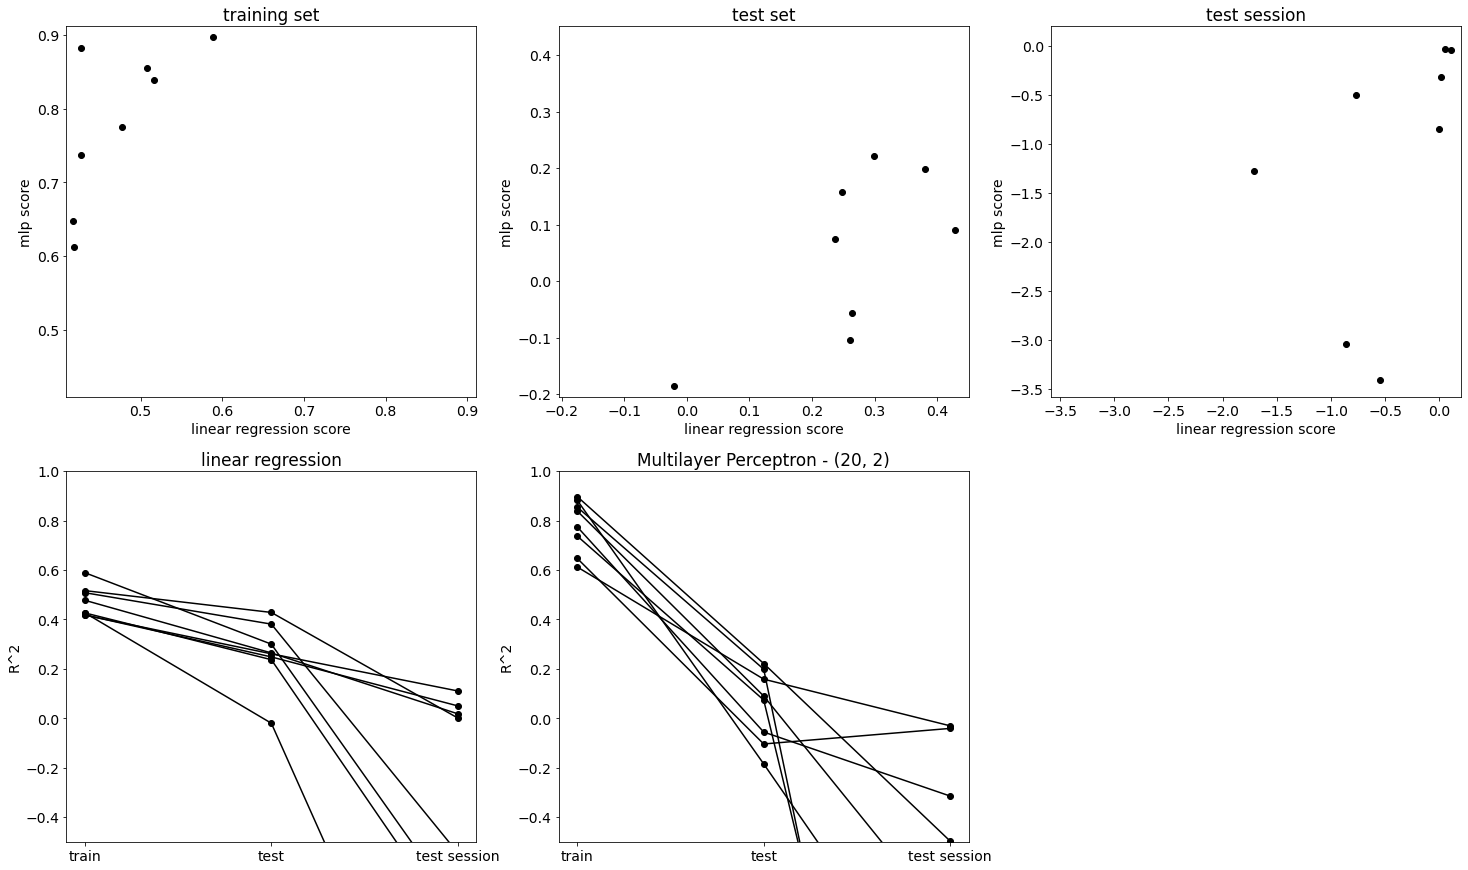

In [57]:
fig = plt.figure(figsize = [25,15])
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5,sharey = ax4)
ax1.plot(np.asarray(scores_dict['linear regression'])[:,0],np.asarray(scores_dict['mlp'])[:,0],'ko')
ax1.set_title('training set')
ax1.set_xlabel('linear regression score')
ax1.set_ylabel('mlp score')
xlimits = ax1.get_xlim()
ylimits = ax1.get_ylim()
limits = [np.min([xlimits[0],ylimits[0]]),np.max([xlimits[1],ylimits[1]])]
ax1.set_xlim(limits)
ax1.set_ylim(limits)

ax2.plot(np.asarray(scores_dict['linear regression'])[:,1],np.asarray(scores_dict['mlp'])[:,1],'ko')
ax2.set_title('test set')
ax2.set_xlabel('linear regression score')
ax2.set_ylabel('mlp score')
xlimits = ax2.get_xlim()
ylimits = ax2.get_ylim()
limits = [np.min([xlimits[0],ylimits[0]]),np.max([xlimits[1],ylimits[1]])]
ax2.set_xlim(limits)
ax2.set_ylim(limits)

ax3.plot(np.asarray(scores_dict['linear regression'])[:,2],np.asarray(scores_dict['mlp'])[:,2],'ko')
ax3.set_title('test session')
ax3.set_xlabel('linear regression score')
ax3.set_ylabel('mlp score')
xlimits = ax3.get_xlim()
ylimits = ax3.get_ylim()
limits = [np.min([xlimits[0],ylimits[0]]),np.max([xlimits[1],ylimits[1]])]
ax3.set_xlim(limits)
ax3.set_ylim(limits)
for i in np.arange(np.asarray(scores_dict['linear regression']).shape[0]):
    ax4.plot(['train','test','test session'],np.asarray(scores_dict['linear regression'])[i,:],'ko-')
ax4.set_title('linear regression')
ax4.set_ylabel('R^2')
for i in np.arange(np.asarray(scores_dict['mlp']).shape[0]):
    ax5.plot(['train','test','test session'],np.asarray(scores_dict['mlp'])[i,:],'ko-')
ax5.set_title('Multilayer Perceptron - {}'.format(hidden_layer_sizes))
ax5.set_ylim([-.5,1])
ax5.set_ylabel('R^2')

In [214]:
len(np.arange(2500,27000,2500))
len(np.arange(0.005,.055,.005))

10

In [229]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso

hidden_layer_sizes = (20,2,)
ridge_alpha = 20000
lasso_alpha = .05
ridge_alphas = np.arange(2500,27000,2500)
lasso_alphas = np.round(np.arange(0.005,.055,.005),3)#[.005, .02,.04,.06,.08,0.1]
dict_list = []
for ridge_alpha,lasso_alpha in zip(ridge_alphas,lasso_alphas):
    scores_dict= {'linear regression':[],
                  'ridge regression':[],
                  'lasso regression':[]}
    print(ridge_alpha)
    for cn in [ 87,  24,  97, 118,  83, 204,  78, 133, 159, 264,  28, 124, 507,
       171, 200, 186, 288, 389, 221, 438, 422, 125,  30,  43, 105, 332,
       289, 374,  72, 571,  71, 156,   4, 357, 248, 378, 466, 173, 152,
       145, 281, 520, 100,  16,  39, 540, 194, 452,  55, 269, 230, 605,
        95, 413, 432, 577,  40, 415,  14, 164, 219,  13, 603, 188, 222,
        59,  10, 565,  94,  63,  93, 187, 561, 353, 392, 489, 364,  67,
        17, 609, 109, 481, 331,   3, 308, 130, 393, 110, 249, 113,  46,
       386, 482,  58, 114, 587, 598, 107,  45, 487,   6, 122, 437,  92,
       550, 199, 509, 167, 294, 302, 450, 123,  15, 558, 447, 473,  23,
        69, 143, 253,  36, 494, 136, 309, 227, 469, 349, 262,  76,   5,
       129, 555, 135,  21,  80, 208, 445, 147, 234, 471, 229, 183, 111,
       551, 304, 205,  60,  42, 151, 545, 254, 319, 283, 223, 440, 368,
       339, 350, 564, 295, 542, 589, 196, 150, 541,  70, 212, 313, 312,
       242, 214, 297, 306, 530, 172, 491,  53,  56, 510, 144,  35, 137,
       483, 399, 617, 439, 163, 166, 377, 379, 403, 454, 578, 203, 501,
       468, 104, 351,  98, 116, 268, 346, 210, 477, 427, 601, 490, 472,
       112, 506, 552, 610, 488, 586, 246, 177, 613, 380, 429, 478,  64,
       533, 320, 239, 182,  32, 527, 614, 354, 228, 311, 433, 505, 197,
       593, 322, 206, 434, 337, 484, 276, 391, 536,  27,  73, 559, 361,
       335, 259, 373, 215, 522, 544, 584, 496, 198, 590, 457, 535, 441,
       574, 296, 517, 502, 316, 620, 293, 161, 424, 381, 327, 178, 418,
       529, 282, 436, 512, 600, 446, 455, 238, 588,  51, 226, 410, 318,
       369,  48,   7, 158, 138, 562,  57, 394, 549, 516, 142, 162, 412,
       149, 448, 479, 404, 273, 140, 499, 286, 526, 299, 508, 352, 591,
       503, 615, 525, 181, 411, 470, 402, 407, 375, 148, 338, 596, 500,
       539, 580,  33, 321, 168, 538,  65, 250, 384, 348, 359, 486, 474,
       314, 267, 518,  85, 175, 300, 595,  82, 504, 521, 511, 420, 498,
       285, 543, 423, 192, 217, 328, 604, 170, 567, 462, 292, 387, 581,
       485, 443, 428, 326, 453, 270, 513, 523, 367, 531, 195, 442, 274,
       388,  18,  19, 370, 585, 599, 570, 231, 356, 189, 416, 108, 463,
       431, 287,  79, 193, 495, 278, 569, 492, 344, 362, 347, 154, 547,
       465, 426, 606, 213, 534, 376, 390, 430, 409, 179,  68,  25,  41,
       355,   0, 244,  88, 546, 395, 405, 258, 366, 397, 279, 548, 444,
       573, 476, 556, 343, 557,  38, 157,  66, 169, 236,  61, 134, 301,
       252, 284, 579, 185, 459, 333, 180,  20, 382, 160, 621, 460, 572,
       106, 247, 383, 451, 616, 528, 216, 271, 406, 190, 458, 291, 261,
       201,  50, 263,   9, 537, 602, 400, 336, 519, 612, 132, 553, 305,
       121,  49, 425, 257, 607, 449, 497, 583,  75, 141, 275, 475, 266,
        47, 619, 576, 340, 209, 575, 514, 597, 401, 153, 563, 334, 524,
       323,  96, 341, 174, 461, 532, 396, 240,  90, 360, 298, 224, 467,
       456, 493, 127, 464, 385, 117, 611, 371, 265,  77, 421,   1,  84,
        99, 243, 582, 207, 233, 290, 363, 618, 146, 566,  86, 251, 191,
       317, 272, 417, 256, 342, 245,  34,   8, 220,  52, 184, 310, 101,
       330, 155,  44, 515, 103, 315,  12, 119, 372, 345, 225, 414, 325,
        91, 358,  22, 237, 608,  74, 128, 324, 398, 592, 260, 365, 115,
        11, 280,  62, 139, 329,  54, 419,  89, 176, 568, 594, 408, 435,
       307,  37, 126, 560, 211,  81, 480, 165, 202, 218,  31, 102,   2,
        29, 277, 235, 232, 120, 303, 131, 255, 554, 241,  26]:#np.arange(2000):
        
        X = DLC_aligned_fit_session.iloc[np.concatenate(frame_indices_fit_session_all[trial_indices_fit_session_fit_subset])].values
        Y = F_fit_session[cn,np.concatenate(frame_indices_fit_session_all[trial_indices_fit_session_fit_subset])]
        X_test = DLC_aligned_fit_session.iloc[np.concatenate(frame_indices_fit_session_all[trial_indices_fit_session_test_subset])].values
        Y_test = F_fit_session[cn,np.concatenate(frame_indices_fit_session_all[trial_indices_fit_session_test_subset])]
        X_test_session = DLC_aligned_test_session
        Y_test_session = F_test_session[cn,:]
        for regression_type in ['linear regression','ridge regression','lasso regression']:
            if regression_type == 'linear regression':
                lr = LinearRegression()   #Ridge(alpha = ridge_alpha)#Lasso(lasso_alpha/100)#
                lr.fit(X,Y)
                beta = lr.coef_
                intercept = lr.intercept_
                score_train=lr.score(X, Y)
                score_test=lr.score(X_test, Y_test)
                score_test_session=lr.score(X_test_session, Y_test_session)
                Y_fitted = (beta@X.T) + intercept
                Y_fitted_test = (beta@X_test.T) + intercept
                Y_fitted_test_session = (beta@X_test_session.T) + intercept
            elif regression_type == 'ridge regression':
                lr = Ridge(alpha = ridge_alpha)#Lasso(lasso_alpha/100)#
                lr.fit(X,Y)
                beta = lr.coef_
                intercept = lr.intercept_
                score_train=lr.score(X, Y)
                score_test=lr.score(X_test, Y_test)
                score_test_session=lr.score(X_test_session, Y_test_session)
                Y_fitted = (beta@X.T) + intercept
                Y_fitted_test = (beta@X_test.T) + intercept
                Y_fitted_test_session = (beta@X_test_session.T) + intercept
            elif regression_type == 'lasso regression':
                lr = Lasso(lasso_alpha)#
                lr.fit(X,Y)
                beta = lr.coef_
                intercept = lr.intercept_
                score_train=lr.score(X, Y)
                score_test=lr.score(X_test, Y_test)
                score_test_session=lr.score(X_test_session, Y_test_session)
                Y_fitted = (beta@X.T) + intercept
                Y_fitted_test = (beta@X_test.T) + intercept
                Y_fitted_test_session = (beta@X_test_session.T) + intercept
            scores_dict[regression_type].append([score_train,score_test,score_test_session])
        #print([score_train,score_test,score_test_session])
    dict_list.append(scores_dict)

2500
5000
7500
10000
12500
15000
17500
20000
22500
25000


In [230]:
train_distances_ridge = []
test_distances_ridge = []
test_session_distances_ridge = []
train_distances_lasso = []
test_distances_lasso = []
test_session_distances_lasso = []
lasso_regs= []
ridge_regs = []

for i,scores_dict in enumerate(dict_list):
    lr_matrix = np.asarray(scores_dict['linear regression'])
    ridge_matrix = np.asarray(scores_dict['ridge regression'])
    lasso_matrix = np.asarray(scores_dict['lasso regression'])
    lr_matrix[lr_matrix<0] = 0
    ridge_matrix[ridge_matrix<0] = 0
    lasso_matrix[lasso_matrix<0] = 0
    train_distances_ridge.append(ridge_matrix[:,0]-lr_matrix[:,0])
    test_distances_ridge.append(ridge_matrix[:,1]-lr_matrix[:,1])
    test_session_distances_ridge.append(ridge_matrix[:,2]-lr_matrix[:,2])
    train_distances_lasso.append(lasso_matrix[:,0]-lr_matrix[:,0])
    test_distances_lasso.append(lasso_matrix[:,1]-lr_matrix[:,1])
    test_session_distances_lasso.append(lasso_matrix[:,2]-lr_matrix[:,2])
    lasso_regs.append(np.ones(lasso_matrix.shape[0])*lasso_alphas[i])
    ridge_regs.append(np.ones(ridge_matrix.shape[0])*ridge_alphas[i])
    

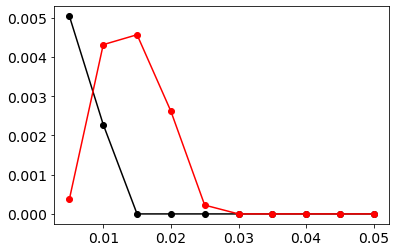

In [237]:
# plt.plot(ridge_alphas,np.median(np.asarray(test_distances_ridge),1),'ko-')
# plt.plot(ridge_alphas,np.median(np.asarray(test_session_distances_ridge),1),'ro-')
plt.plot(lasso_alphas,np.median(np.asarray(test_distances_lasso),1),'ko-')
plt.plot(lasso_alphas,np.median(np.asarray(test_session_distances_lasso),1),'ro-')

/opt/conda/envs/bci_with_suite2p/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 73.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/bci_with_suite2p/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 65.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/bci_with_suite2p/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 60.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/bci_with_suite2p/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 57.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/bci_with_suite2p

Text(0.5, 1.0, 'lasso R^2 difference on test session')

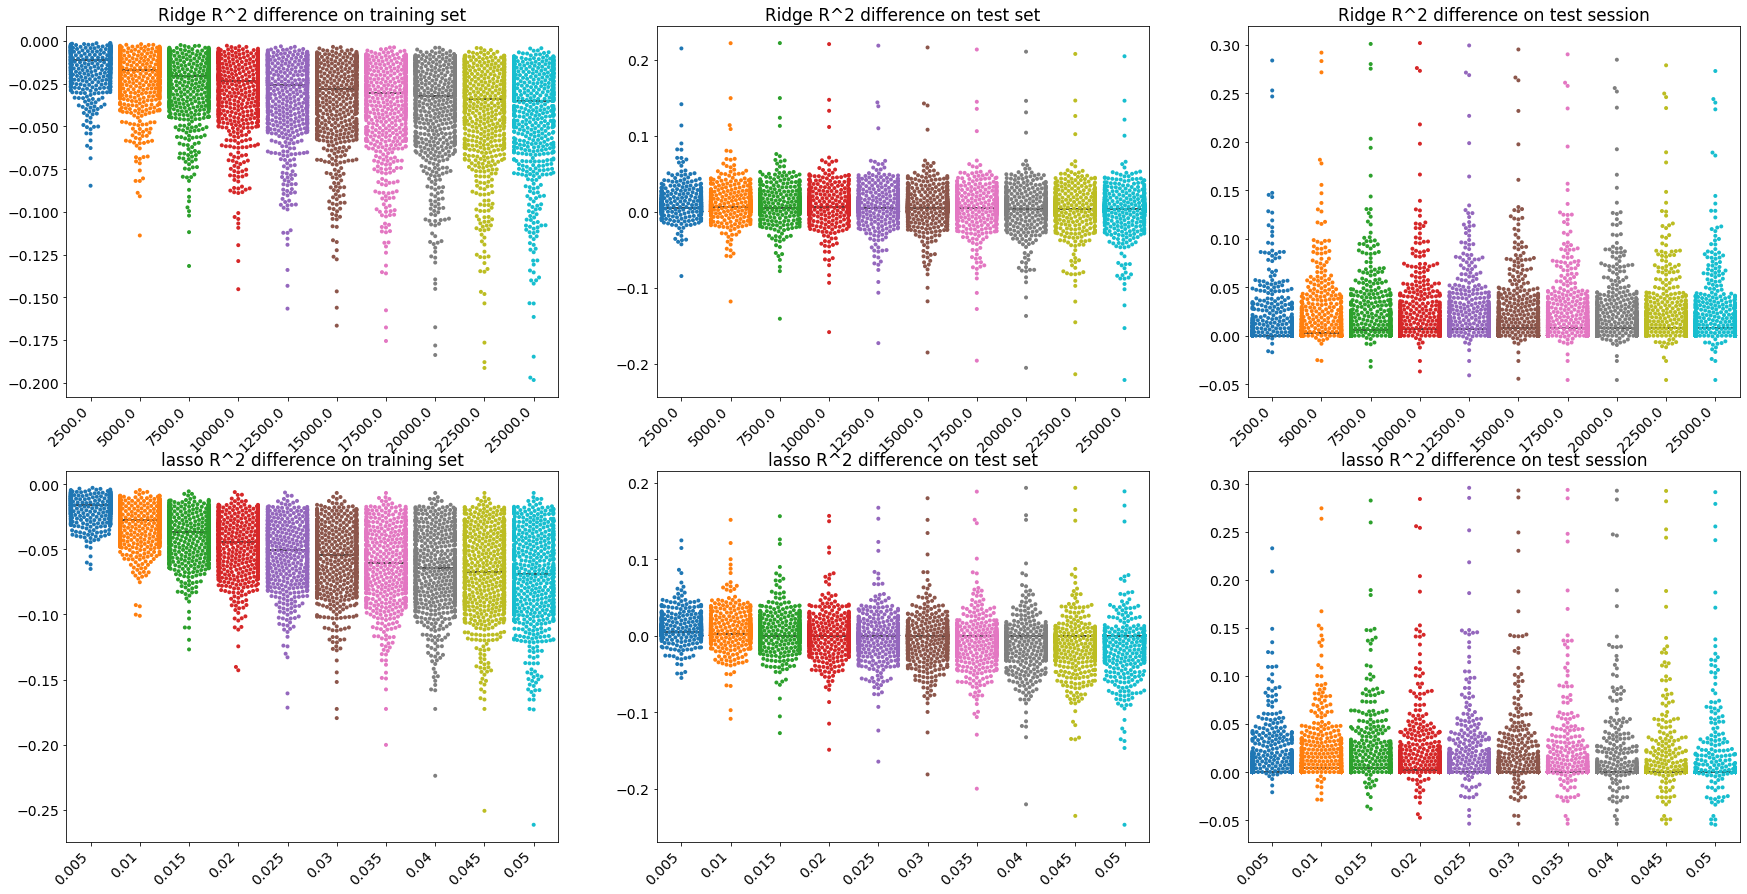

In [231]:
fig = plt.figure(figsize = [30,15])
ax_ridge_train = fig.add_subplot(2,3,1)
seaborn.swarmplot(x = np.concatenate(ridge_regs),
                  y=np.concatenate(train_distances_ridge),
                  ax = ax_ridge_train,
                  size = 4)#,palette="copper",alpha = .5)#,legend=False)#legend = 'brief' , 2.5

seaborn.boxplot(x = np.concatenate(ridge_regs),
                y=np.concatenate(train_distances_ridge),
                ax = ax_ridge_train,
                showmeans=True,
                meanline=True,
                meanprops={'color': 'k', 'ls': '-', 'lw': 2,'visible': False},
                medianprops={'color': 'k','visible': True},
                whiskerprops={'visible': False},
                showfliers=False,
                showbox=False,
                showcaps=False)
#ax_ridge_train.plot(ridge_alphas,np.median(np.asarray(train_distances_ridge),1),'ko-')
plt.xticks(rotation=45, ha='right')
ax_ridge_train.set_title('Ridge R^2 difference on training set')

ax_ridge_test = fig.add_subplot(2,3,2)
seaborn.swarmplot(x = np.concatenate(ridge_regs),
                  y=np.concatenate(test_distances_ridge),
                  ax = ax_ridge_test,
                  size = 4)#,palette="copper",alpha = .5)#,legend=False)#legend = 'brief' , 2.5
seaborn.boxplot(x = np.concatenate(ridge_regs),
                y=np.concatenate(test_distances_ridge),
                ax = ax_ridge_test,
                showmeans=True,
                meanline=True,
                meanprops={'color': 'k', 'ls': '-', 'lw': 2,'visible': False},
                medianprops={'color': 'k','visible': True},
                whiskerprops={'visible': False},
                showfliers=False,
                showbox=False,
                showcaps=False)
plt.xticks(rotation=45, ha='right')
ax_ridge_test.set_title('Ridge R^2 difference on test set')

ax_ridge_test_session = fig.add_subplot(2,3,3)
seaborn.swarmplot(x = np.concatenate(ridge_regs),
                  y=np.concatenate(test_session_distances_ridge),
                  ax = ax_ridge_test_session,
                  size = 4)#,palette="copper",alpha = .5)#,legend=False)#legend = 'brief' , 2.5
seaborn.boxplot(x = np.concatenate(ridge_regs),
                y=np.concatenate(test_session_distances_ridge),
                ax = ax_ridge_test_session,
                showmeans=True,
                meanline=True,
                meanprops={'color': 'k', 'ls': '-', 'lw': 2,'visible': False},
                medianprops={'color': 'k','visible': True},
                whiskerprops={'visible': False},
                showfliers=False,
                showbox=False,
                showcaps=False)
plt.xticks(rotation=45, ha='right')
ax_ridge_test_session.set_title('Ridge R^2 difference on test session')


ax_lasso_train = fig.add_subplot(2,3,4)
seaborn.swarmplot(x = np.concatenate(lasso_regs),
                  y=np.concatenate(train_distances_lasso),
                  ax = ax_lasso_train,
                  size = 4)#,palette="copper",alpha = .5)#,legend=False)#legend = 'brief' , 2.5
seaborn.boxplot(x = np.concatenate(lasso_regs),
                y=np.concatenate(train_distances_lasso),
                ax = ax_lasso_train,
                showmeans=True,
                meanline=True,
                meanprops={'color': 'k', 'ls': '-', 'lw': 2,'visible': False},
                medianprops={'color': 'k','visible': True},
                whiskerprops={'visible': False},
                showfliers=False,
                showbox=False,
                showcaps=False)
plt.xticks(rotation=45, ha='right')
ax_lasso_train.set_title('lasso R^2 difference on training set')

ax_lasso_test = fig.add_subplot(2,3,5)
seaborn.swarmplot(x = np.concatenate(lasso_regs),
                  y=np.concatenate(test_distances_lasso),
                  ax = ax_lasso_test,
                  size = 4)#,palette="copper",alpha = .5)#,legend=False)#legend = 'brief' , 2.5
seaborn.boxplot(x = np.concatenate(lasso_regs),
                y=np.concatenate(test_distances_lasso),
                ax = ax_lasso_test,
                showmeans=True,
                meanline=True,
                meanprops={'color': 'k', 'ls': '-', 'lw': 2,'visible': False},
                medianprops={'color': 'k','visible': True},
                whiskerprops={'visible': False},
                showfliers=False,
                showbox=False,
                showcaps=False)
plt.xticks(rotation=45, ha='right')
ax_lasso_test.set_title('lasso R^2 difference on test set')

ax_lasso_test_session = fig.add_subplot(2,3,6)
seaborn.swarmplot(x = np.concatenate(lasso_regs),
                  y=np.concatenate(test_session_distances_lasso),
                  ax = ax_lasso_test_session,
                  size = 4)#,palette="copper",alpha = .5)#,legend=False)#legend = 'brief' , 2.5
seaborn.boxplot(x = np.concatenate(lasso_regs),
                y=np.concatenate(test_session_distances_lasso),
                ax = ax_lasso_test_session,
                showmeans=True,
                meanline=True,
                meanprops={'color': 'k', 'ls': '-', 'lw': 2,'visible': False},
                medianprops={'color': 'k','visible': True},
                whiskerprops={'visible': False},
                showfliers=False,
                showbox=False,
                showcaps=False)
plt.xticks(rotation=45, ha='right')
ax_lasso_test_session.set_title('lasso R^2 difference on test session')

Text(0, 0.5, 'R^2')

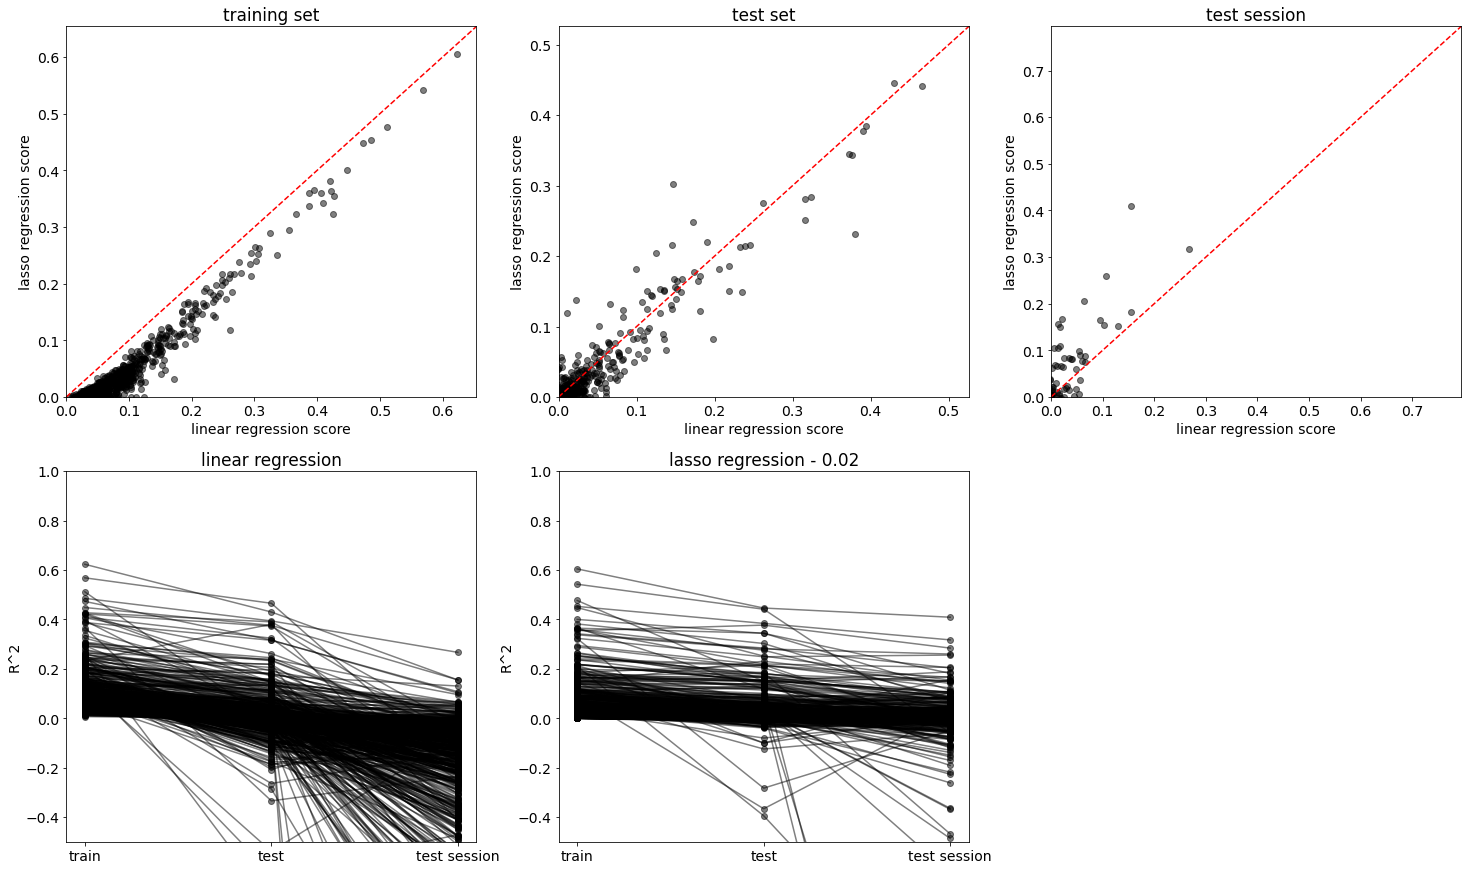

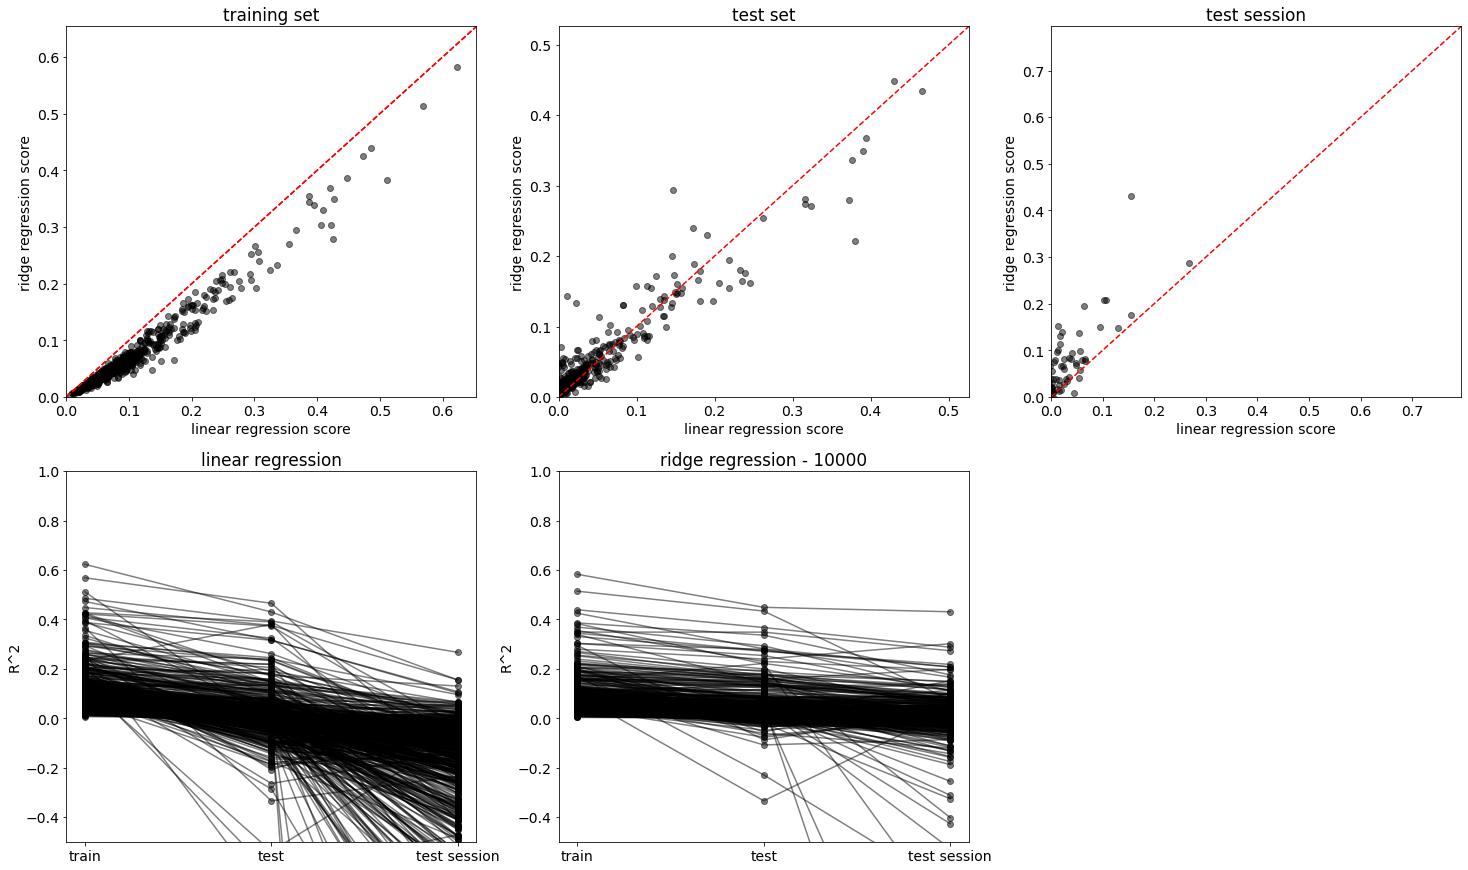

In [238]:
idx = 3
alpha = .5
scores_dict = dict_list[idx]
ridge_alpha = ridge_alphas[idx]
lasso_alpha = lasso_alphas[idx]
fig = plt.figure(figsize = [25,15])
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5,sharey = ax4)
ax1.plot(np.asarray(scores_dict['linear regression'])[:,0],np.asarray(scores_dict['lasso regression'])[:,0],'ko',alpha = alpha)
ax1.set_title('training set')
ax1.set_xlabel('linear regression score')
ax1.set_ylabel('lasso regression score')
xlimits = ax1.get_xlim()
ylimits = ax1.get_ylim()
limits = [np.min([xlimits[0],ylimits[0]]),np.max([xlimits[1],ylimits[1]])]
limits[0] = 0
ax1.plot(limits,limits,'r--')
ax1.set_xlim(limits)
ax1.set_ylim(limits)

ax2.plot(np.asarray(scores_dict['linear regression'])[:,1],np.asarray(scores_dict['lasso regression'])[:,1],'ko',alpha = alpha)
ax2.set_title('test set')
ax2.set_xlabel('linear regression score')
ax2.set_ylabel('lasso regression score')
xlimits = ax2.get_xlim()
ylimits = ax2.get_ylim()
limits = [np.min([xlimits[0],ylimits[0]]),np.max([xlimits[1],ylimits[1]])]
limits[0] = 0
ax2.plot(limits,limits,'r--')
ax2.set_xlim(limits)
ax2.set_ylim(limits)

ax3.plot(np.asarray(scores_dict['linear regression'])[:,2],np.asarray(scores_dict['lasso regression'])[:,2],'ko',alpha = alpha)
ax3.set_title('test session')
ax3.set_xlabel('linear regression score')
ax3.set_ylabel('lasso regression score')
xlimits = ax3.get_xlim()
ylimits = ax3.get_ylim()
limits = [np.min([xlimits[0],ylimits[0]]),np.max([xlimits[1],ylimits[1]])]
limits[0] = 0
ax3.plot(limits,limits,'r--')
ax3.set_xlim(limits)
ax3.set_ylim(limits)
for i in np.arange(np.asarray(scores_dict['linear regression']).shape[0]):
    ax4.plot(['train','test','test session'],np.asarray(scores_dict['linear regression'])[i,:],'ko-',alpha = alpha)
ax4.set_title('linear regression')
ax4.set_ylabel('R^2')
for i in np.arange(np.asarray(scores_dict['lasso regression']).shape[0]):
    ax5.plot(['train','test','test session'],np.asarray(scores_dict['lasso regression'])[i,:],'ko-',alpha = alpha)
ax5.set_title('lasso regression - {}'.format(lasso_alpha))
ax5.set_ylim([-.5,1])
ax5.set_ylabel('R^2')

fig = plt.figure(figsize = [25,15])
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5,sharey = ax4)
ax1.plot(np.asarray(scores_dict['linear regression'])[:,0],np.asarray(scores_dict['ridge regression'])[:,0],'ko',alpha = alpha)
ax1.set_title('training set')
ax1.set_xlabel('linear regression score')
ax1.set_ylabel('ridge regression score')
xlimits = ax1.get_xlim()
ylimits = ax1.get_ylim()
limits = [np.min([xlimits[0],ylimits[0]]),np.max([xlimits[1],ylimits[1]])]
limits[0] = 0
ax1.plot(limits,limits,'r--')
ax1.set_xlim(limits)
ax1.set_ylim(limits)
ax1.plot(limits,limits,'r--')
ax2.plot(np.asarray(scores_dict['linear regression'])[:,1],np.asarray(scores_dict['ridge regression'])[:,1],'ko',alpha = alpha)
ax2.set_title('test set')
ax2.set_xlabel('linear regression score')
ax2.set_ylabel('ridge regression score')
xlimits = ax2.get_xlim()
ylimits = ax2.get_ylim()
limits = [np.min([xlimits[0],ylimits[0]]),np.max([xlimits[1],ylimits[1]])]
limits[0] = 0
ax2.plot(limits,limits,'r--')
ax2.set_xlim(limits)
ax2.set_ylim(limits)

ax3.plot(np.asarray(scores_dict['linear regression'])[:,2],np.asarray(scores_dict['ridge regression'])[:,2],'ko',alpha = alpha)
ax3.set_title('test session')
ax3.set_xlabel('linear regression score')
ax3.set_ylabel('ridge regression score')
xlimits = ax3.get_xlim()
ylimits = ax3.get_ylim()
limits = [np.min([xlimits[0],ylimits[0]]),np.max([xlimits[1],ylimits[1]])]
limits[0] = 0
ax3.plot(limits,limits,'r--')
ax3.set_xlim(limits)
ax3.set_ylim(limits)
for i in np.arange(np.asarray(scores_dict['linear regression']).shape[0]):
    ax4.plot(['train','test','test session'],np.asarray(scores_dict['linear regression'])[i,:],'ko-',alpha = alpha)
ax4.set_title('linear regression')
ax4.set_ylabel('R^2')
for i in np.arange(np.asarray(scores_dict['ridge regression']).shape[0]):
    ax5.plot(['train','test','test session'],np.asarray(scores_dict['ridge regression'])[i,:],'ko-',alpha = alpha)
ax5.set_title('ridge regression - {}'.format(ridge_alpha))
ax5.set_ylim([-.5,1])
ax5.set_ylabel('R^2')

In [182]:
np.argsort(np.asarray(scores_dict['linear regression'])[:,1])[::-1]#[:50]

array([ 87,  24,  97, 118,  83, 204,  78, 133, 159, 264,  28, 124, 507,
       171, 200, 186, 288, 389, 221, 438, 422, 125,  30,  43, 105, 332,
       289, 374,  72, 571,  71, 156,   4, 357, 248, 378, 466, 173, 152,
       145, 281, 520, 100,  16,  39, 540, 194, 452,  55, 269, 230, 605,
        95, 413, 432, 577,  40, 415,  14, 164, 219,  13, 603, 188, 222,
        59,  10, 565,  94,  63,  93, 187, 561, 353, 392, 489, 364,  67,
        17, 609, 109, 481, 331,   3, 308, 130, 393, 110, 249, 113,  46,
       386, 482,  58, 114, 587, 598, 107,  45, 487,   6, 122, 437,  92,
       550, 199, 509, 167, 294, 302, 450, 123,  15, 558, 447, 473,  23,
        69, 143, 253,  36, 494, 136, 309, 227, 469, 349, 262,  76,   5,
       129, 555, 135,  21,  80, 208, 445, 147, 234, 471, 229, 183, 111,
       551, 304, 205,  60,  42, 151, 545, 254, 319, 283, 223, 440, 368,
       339, 350, 564, 295, 542, 589, 196, 150, 541,  70, 212, 313, 312,
       242, 214, 297, 306, 530, 172, 491,  53,  56, 510, 144,  3

In [126]:
regr.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (10,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 500,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 1,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [9]:
score_train

0.4609869834282574

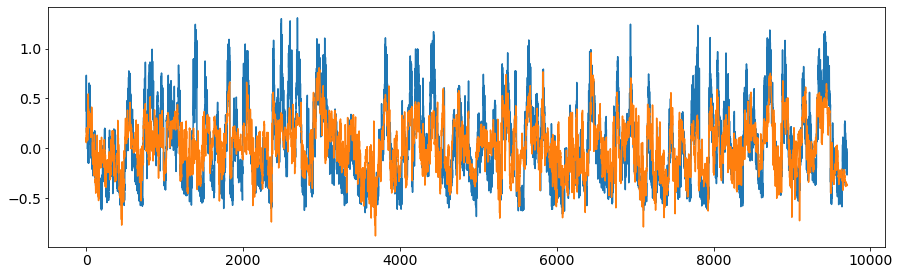

In [7]:
fig = plt.figure(figsize = [15,15])
ax_train = fig.add_subplot(3,1,1)
ax_train.plot(Y)
ax_train.plot(Y_fitted)
# Y_fitted = regr.predict(X)
#                         Y_fitted_test = regr.predict(X_test)
#                         Y_fitted_test_session = regr.predict(X_test_session)

Text(0.5, 1.0, 'MLP default settings all conditioned neurons from 14 scrambled sessions')

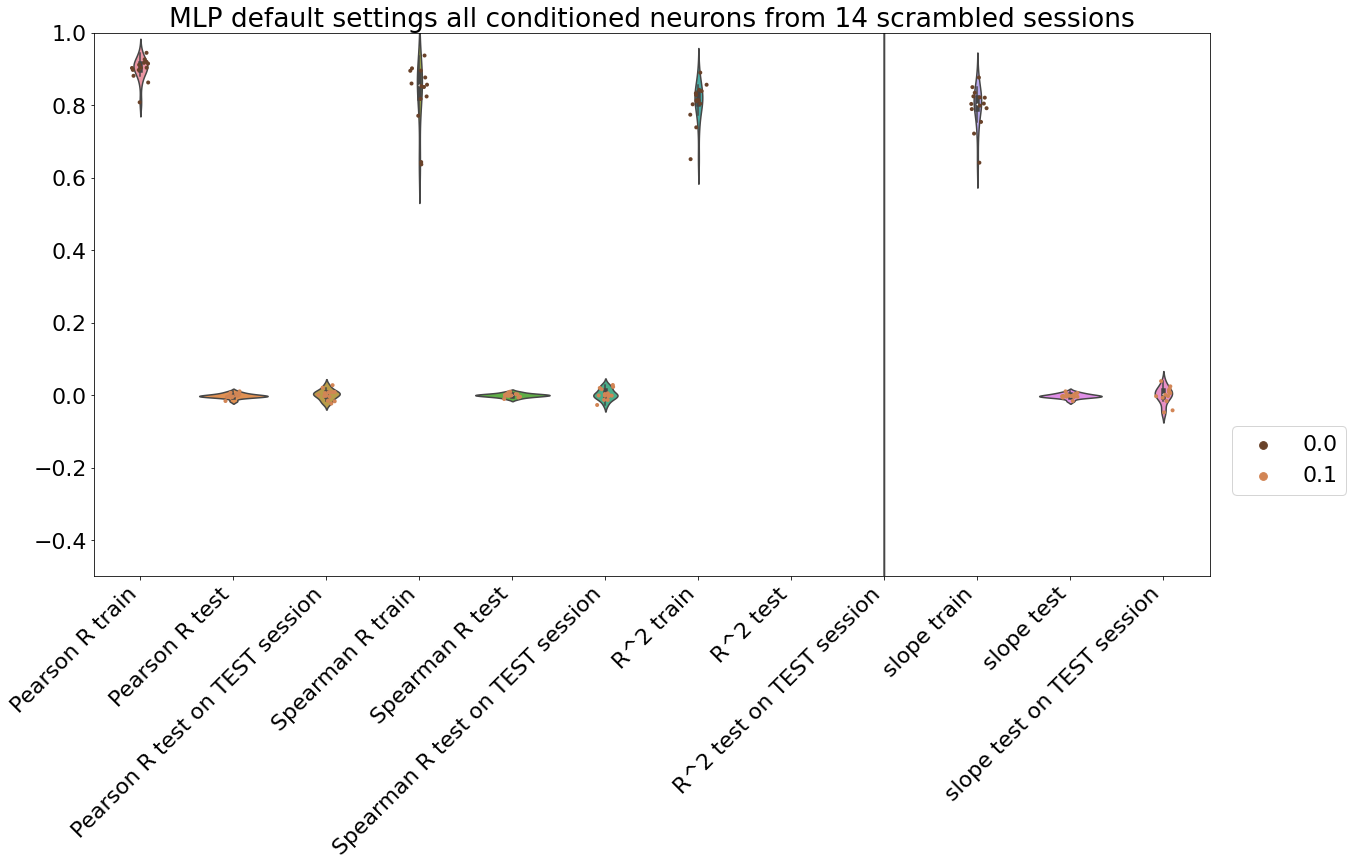

In [115]:
# Plot ALL CNs from all sessions

import seaborn
import matplotlib
font = {'family' : 'normal',
        #'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

mapper = {"pearsons_train_r_median" :'Pearson R train', 
          "pearsons_test_r_median":'Pearson R test',
          "pearsons_test_session_r_median":'Pearson R test on TEST session',
          "spearman_train_r_median":'Spearman R train',
          "spearman_test_r_median":'Spearman R test',
          "spearman_test_session_r_median":'Spearman R test on TEST session',
          "r2_train_median":'R^2 train',
          "r2_test_median":'R^2 test',
          "r2_test_session_median":'R^2 test on TEST session',
          "slope_raw_train_median":'slope train',
          "slope_raw_test_median":'slope test',
          "slope_raw_test_session_median":'slope test on TEST session'}
basenames = ["pearsons_train_", 
               "pearsons_test_",
               "pearsons_test_session_",
               "spearman_train_",
               "spearman_test_",
               "spearman_test_session_",
               "r2_train_",
               "r2_test_",
               "r2_test_session_",
               "slope_raw_train_",
               "slope_raw_test_",
               "slope_raw_test_session_"]
x = []
y = []
hue = []
needed = np.asarray(stats_metadata_ALL['scrambled']) == True
for basename in basenames:
    try:
        #print(basename)
        y_now = np.asarray(stats_metadata_ALL[basename + 'median'])[needed]
        x_now = [mapper[basename + 'median']]*len(y_now)
        
    except:
        
        y_now = np.asarray(stats_metadata_ALL[basename + 'r_median'])[needed]
        x_now = [mapper[basename + 'r_median']]*len(y_now)
    
    hue_now = np.asarray(stats_metadata_ALL[basename + 'p'])[needed]
    hue_now[hue_now>.1] = .1
    y.append(y_now)
    x.append(x_now)
    hue.append(hue_now)
y = np.concatenate(y)
x = np.concatenate(x)
hue = np.concatenate(hue)
significant = hue<=.1
fig = plt.figure(figsize = [20,10])
ax1 = fig.add_subplot(1,1,1)
#seaborn.swarmplot(x = x,y=y,hue=hue,ax = ax1,size = 4,palette="copper",alpha = .5)#,legend=False)#legend = 'brief' , 2.5
seaborn.violinplot(x = x,y=y,ax = ax1,size = 4,alpha = .5)#,legend=False)#legend = 'brief' , 2.5
seaborn.stripplot(x = x[significant],y=y[significant],hue=hue[significant],ax = ax1,size = 4,palette="copper",alpha = 1)#,legend=False)#legend = 'brief' , 2.5
ax1.set_ylim([-.5,1])
plt.legend(bbox_to_anchor=(1.02, 0.15), loc='lower left', borderaxespad=0)
plt.xticks(rotation=45, ha='right')
ax1.set_title('MLP default settings all conditioned neurons from {} scrambled sessions'.format(sum(needed)))
#fig.set_size_inches(30,10)
#plt.show()

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

Text(0.5, 1.0, "BCI33 - test: 070122 - train: ['062722', '062922', '063022'] - all cells - Ridge regression (10000)")

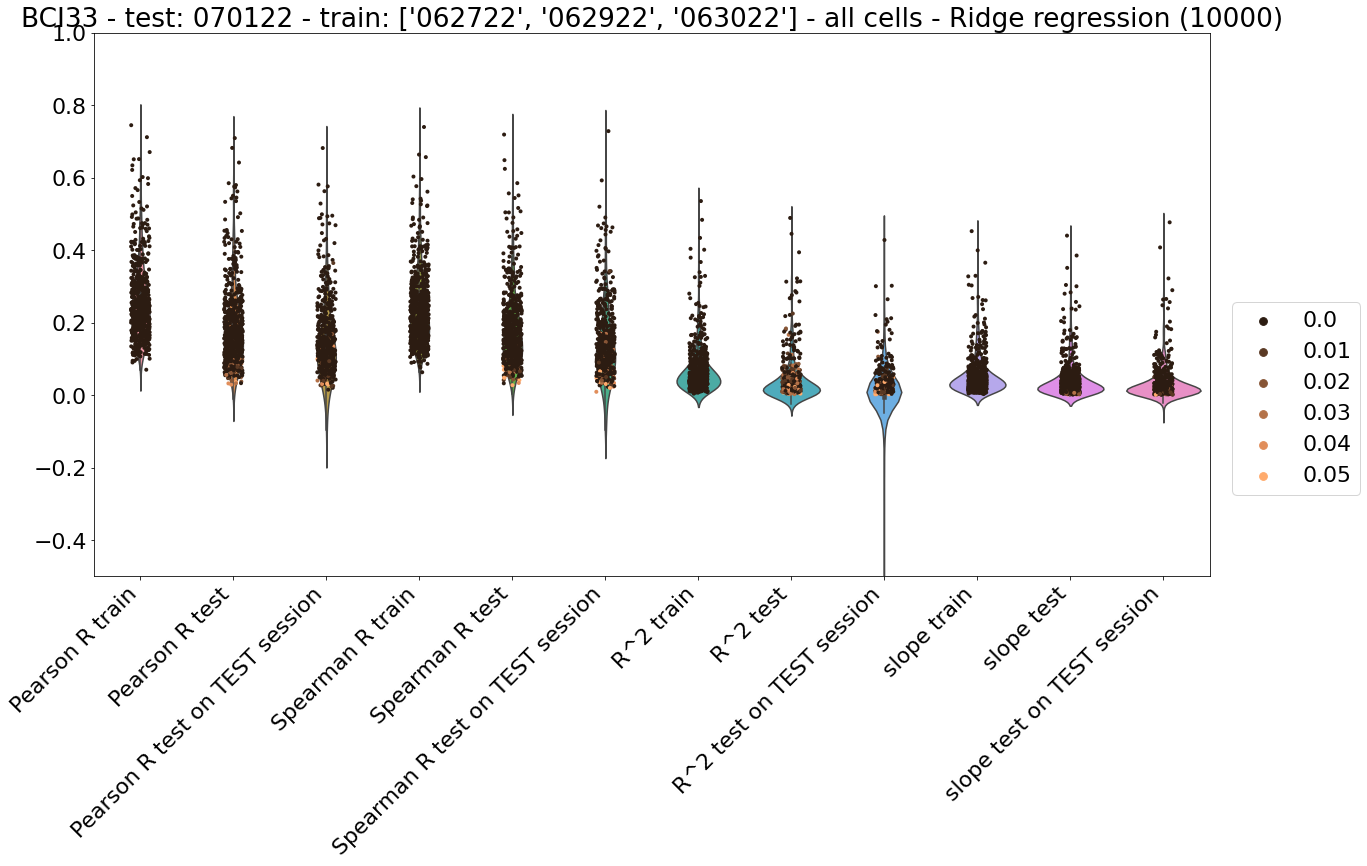

In [141]:
import seaborn
import matplotlib
font = {'family' : 'normal',
        #'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

mapper = {"pearsons_train_r_median" :'Pearson R train', 
          "pearsons_test_r_median":'Pearson R test',
          "pearsons_test_session_r_median":'Pearson R test on TEST session',
          "spearman_train_r_median":'Spearman R train',
          "spearman_test_r_median":'Spearman R test',
          "spearman_test_session_r_median":'Spearman R test on TEST session',
          "r2_train_median":'R^2 train',
          "r2_test_median":'R^2 test',
          "r2_test_session_median":'R^2 test on TEST session',
          "slope_raw_train_median":'slope train',
          "slope_raw_test_median":'slope test',
          "slope_raw_test_session_median":'slope test on TEST session'}
basenames = ["pearsons_train_", 
               "pearsons_test_",
               "pearsons_test_session_",
               "spearman_train_",
               "spearman_test_",
               "spearman_test_session_",
               "r2_train_",
               "r2_test_",
               "r2_test_session_",
               "slope_raw_train_",
               "slope_raw_test_",
               "slope_raw_test_session_"]
x = []
y = []
hue = []
for basename in basenames:
    try:
        y_now = stats_metadata_ALL[basename + 'median']
        x_now = [mapper[basename + 'median']]*len(y_now)
    except:
        y_now = stats_metadata_ALL[basename + 'r_median']
        x_now = [mapper[basename + 'r_median']]*len(y_now)
    
    hue_now = np.asarray(stats_metadata_ALL[basename + 'p'])
    hue_now[hue_now>.1] = .1
    y.append(y_now)
    x.append(x_now)
    hue.append(hue_now)
y = np.concatenate(y)
x = np.concatenate(x)
hue = np.concatenate(hue)
significant = hue<=.05
fig = plt.figure(figsize = [20,10])
ax1 = fig.add_subplot(1,1,1)
#seaborn.swarmplot(x = x,y=y,hue=hue,ax = ax1,size = 4,palette="copper",alpha = .5)#,legend=False)#legend = 'brief' , 2.5
seaborn.violinplot(x = x,y=y,ax = ax1,size = 4,alpha = .5)#,legend=False)#legend = 'brief' , 2.5
seaborn.stripplot(x = x[significant],y=y[significant],hue=hue[significant],ax = ax1,size = 4,palette="copper",alpha = 1)#,legend=False)#legend = 'brief' , 2.5
ax1.set_ylim([-.5,1])
plt.legend(bbox_to_anchor=(1.02, 0.15), loc='lower left', borderaxespad=0)
plt.xticks(rotation=45, ha='right')
ax1.set_title('{} - test: {} - train: {} - all cells - Ridge regression (10000)'.format(stats_metadata_ALL['mouse'][0],stats_metadata_ALL['session'][0],stats_metadata_ALL['train_sessions'][0]))
#ax1.set_title('All conditioned neurons with Ridge regression & regularization (10000)')
#fig.set_size_inches(30,10)
#plt.show()

In [143]:
stats_metadata_ALL_all_cells = stats_metadata_ALL.copy()

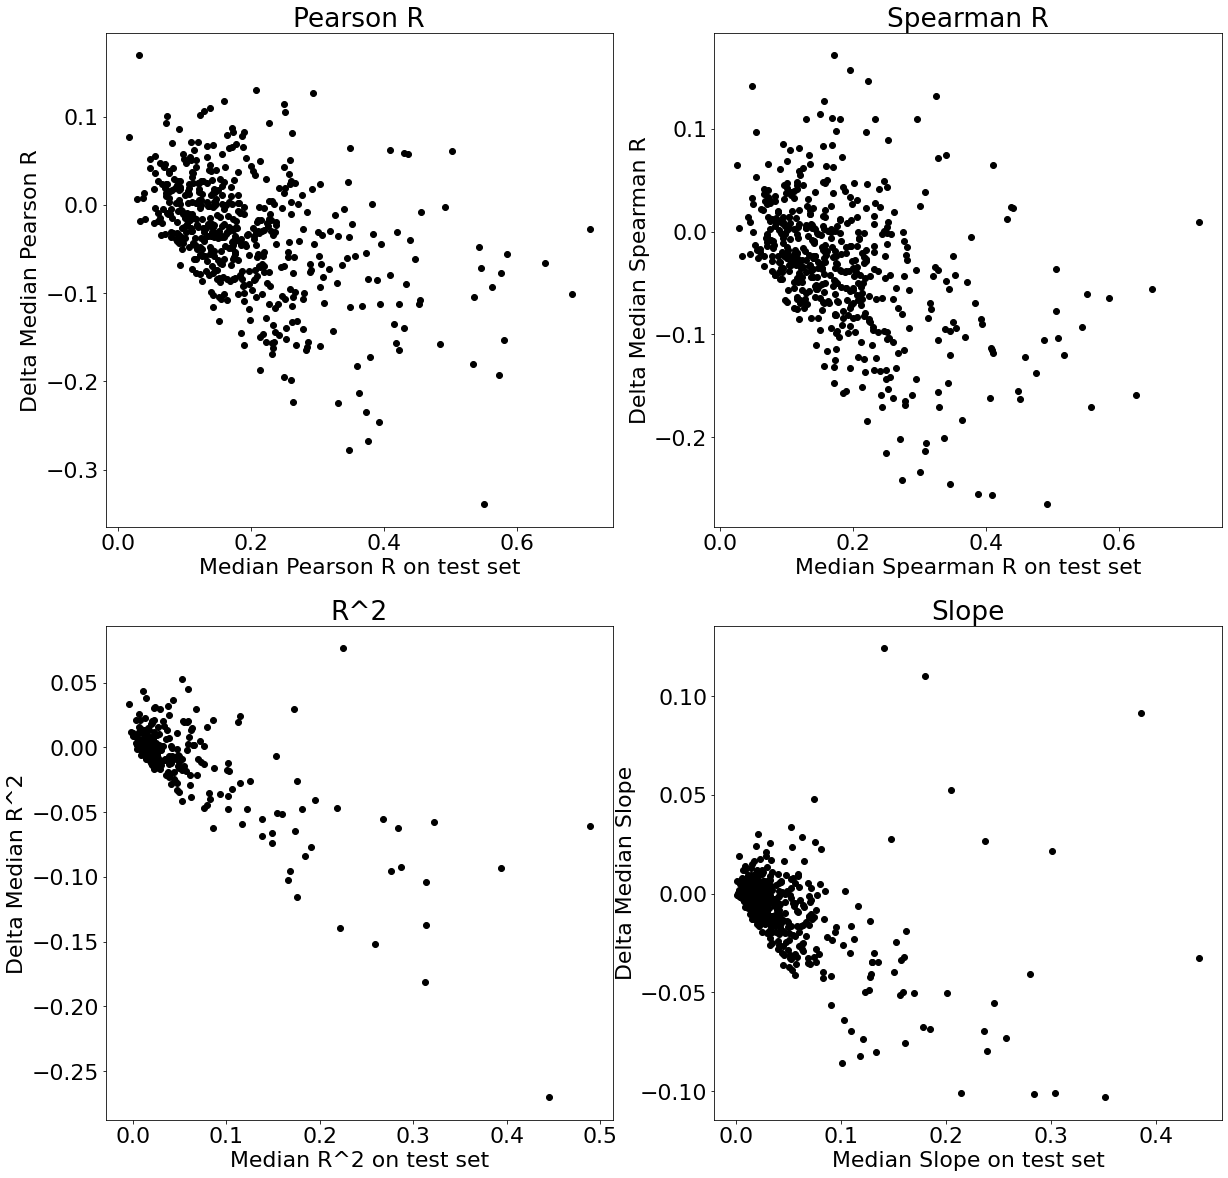

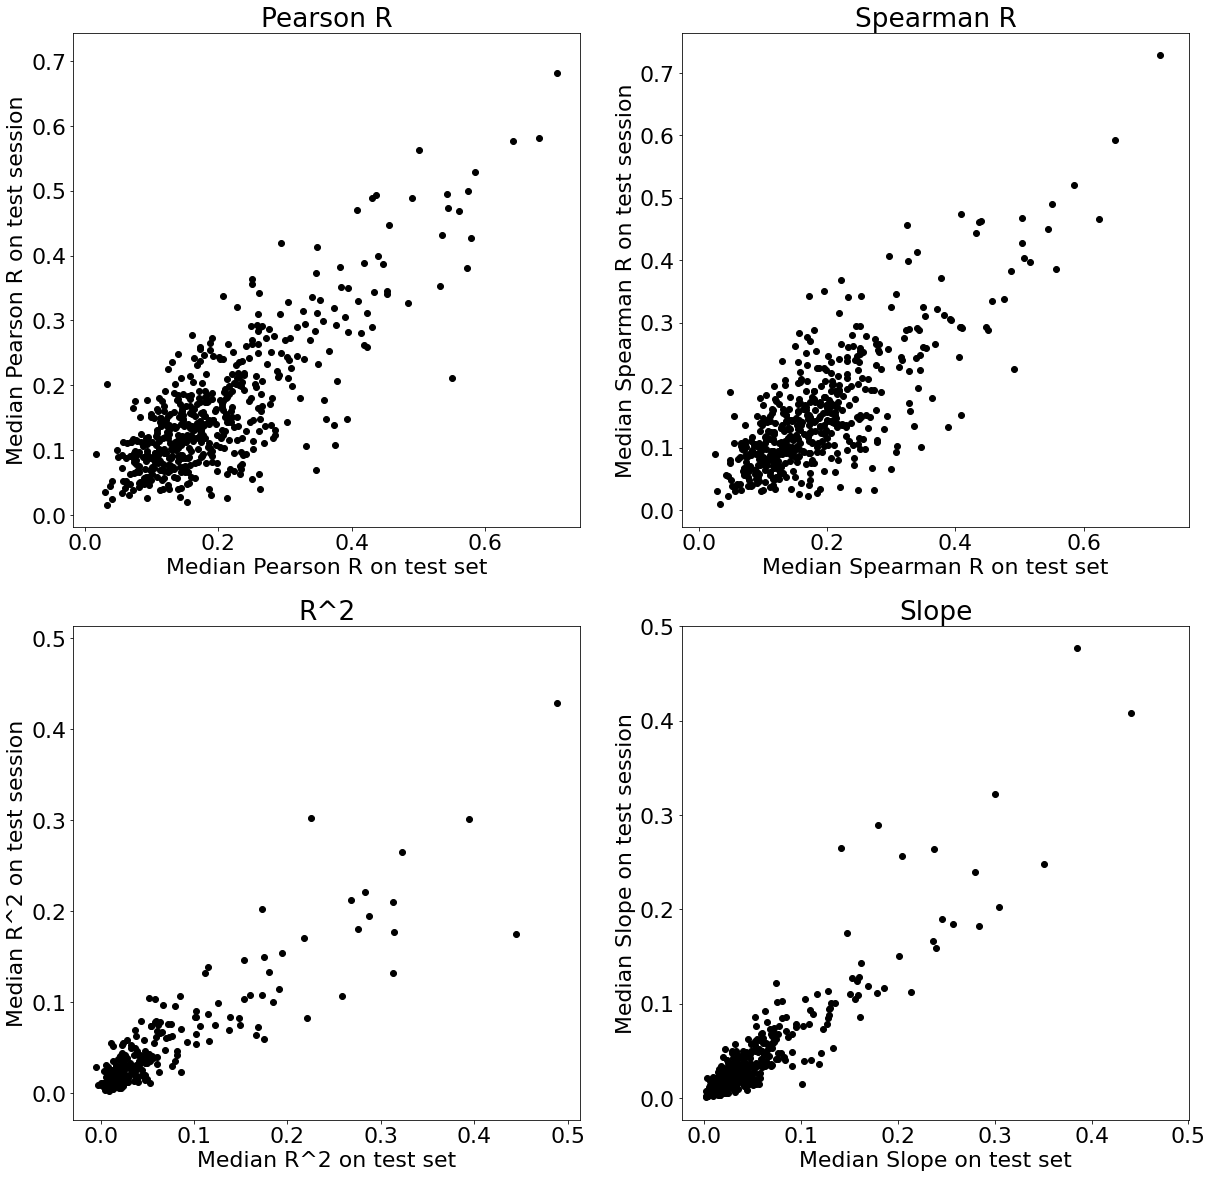

In [142]:
# look at differences between test session and test session
pairs_to_subtract = [["pearsons_train_r_median", "pearsons_test_r_median","pearsons_test_session_r_median"],
                     ["spearman_train_r_median","spearman_test_r_median","spearman_test_session_r_median"],
                     ["r2_train_median","r2_test_median","r2_test_session_median"],
                     ["slope_raw_train_median","slope_raw_test_median","slope_raw_test_session_median"]]
pairs_to_subtract = [["pearsons_test_r_median","pearsons_test_session_r_median"],
                     ["spearman_test_r_median","spearman_test_session_r_median"],
                     ["r2_test_median","r2_test_session_median"],
                     ["slope_raw_test_median","slope_raw_test_session_median"]]
ps_to_use = ["pearsons_test_session_p",
            "spearman_test_session_p",
            "r2_test_session_p",
            "slope_raw_test_session_p"]
titles = ["Pearson R",
          "Spearman R",
          "R^2",
          "Slope"]
axislabels = ["Median Pearson R",
              "Median Spearman R",
              "Median R^2",
              "Median Slope"]


fig = plt.figure(figsize = [20,20])
fig_just_vals = plt.figure(figsize = [20,20])
for i,(pair,p_name) in enumerate(zip(pairs_to_subtract,ps_to_use)):
    v1 = np.asarray(stats_metadata_ALL[pair[1]])
    v0 = np.asarray(stats_metadata_ALL[pair[0]])
    pvals = np.asarray(stats_metadata_ALL[p_name])
    needed0 = pvals>=.05
    needed = pvals<.05
    diff =  v1-v0
    ax = fig.add_subplot(2,2,i+1)
    #ax.plot (v0[needed0],diff[needed0],'k.',alpha = .5)
    ax.plot (v0[needed],diff[needed],'ko',alpha = 1)
    ax.set_title(titles[i])
    ax.set_xlabel(axislabels[i] + ' on test set')
    ax.set_ylabel('Delta '+ axislabels[i] )
    
    ax = fig_just_vals.add_subplot(2,2,i+1)
    #ax.plot (v0[needed0],diff[needed0],'k.',alpha = .5)
    ax.plot (v0[needed],v1[needed],'ko',alpha = 1)
    ax.set_title(titles[i])
    ax.set_xlabel(axislabels[i] + ' on test set')
    ax.set_ylabel(axislabels[i] + ' on test session' )
    limits = np.asarray([ax.get_xlim(),ax.get_ylim()])
    limits= [np.min(limits[:,0]),np.max(limits[:,1])]
    ax.set_xlim(limits)     
    ax.set_ylim(limits)
    

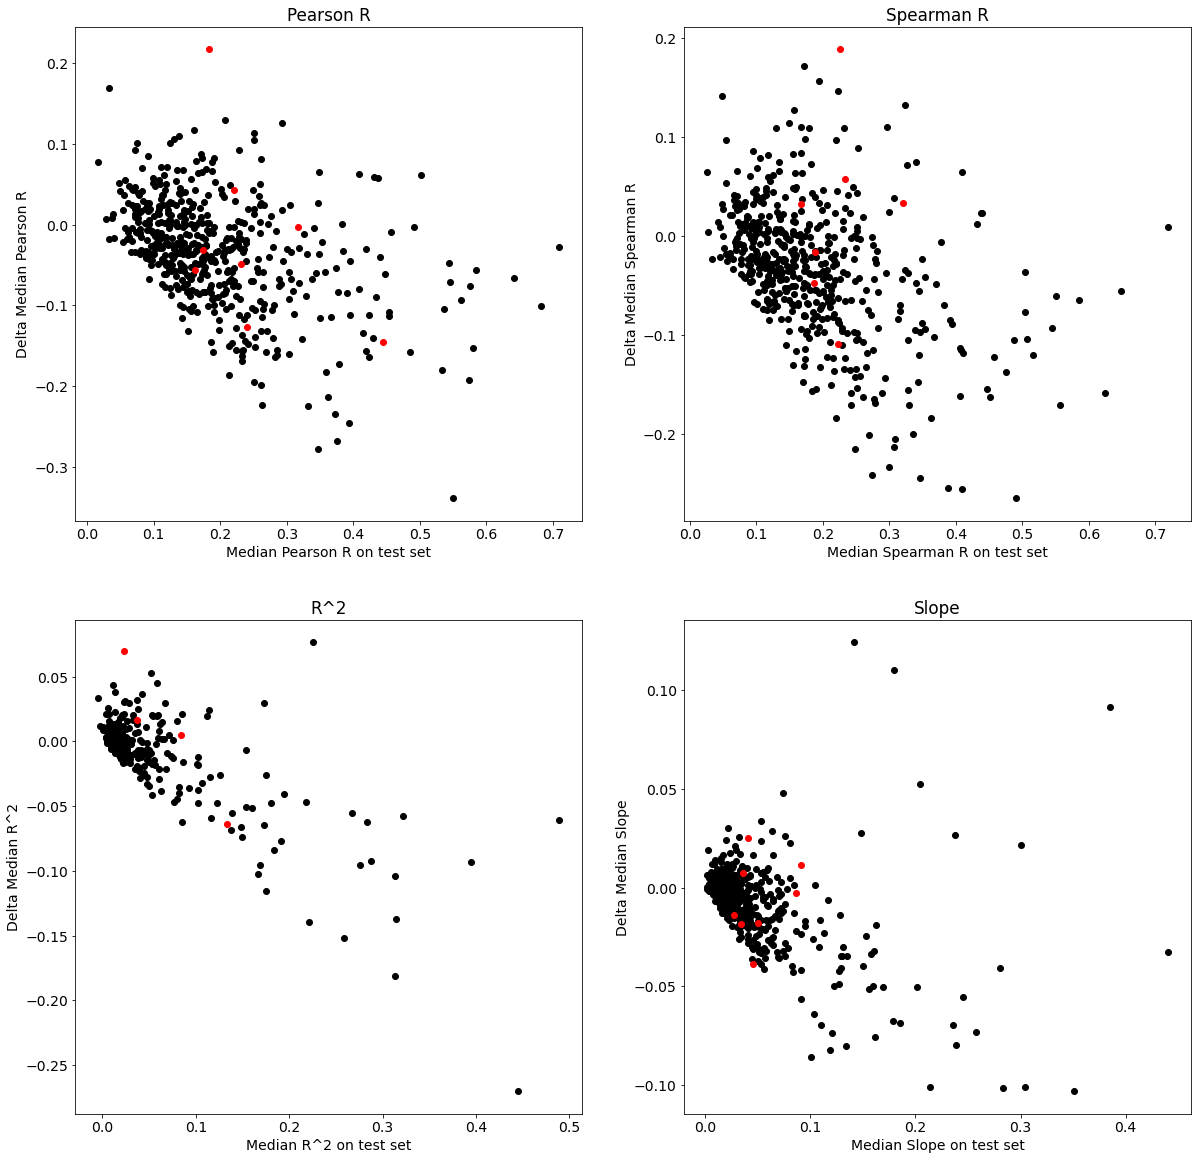

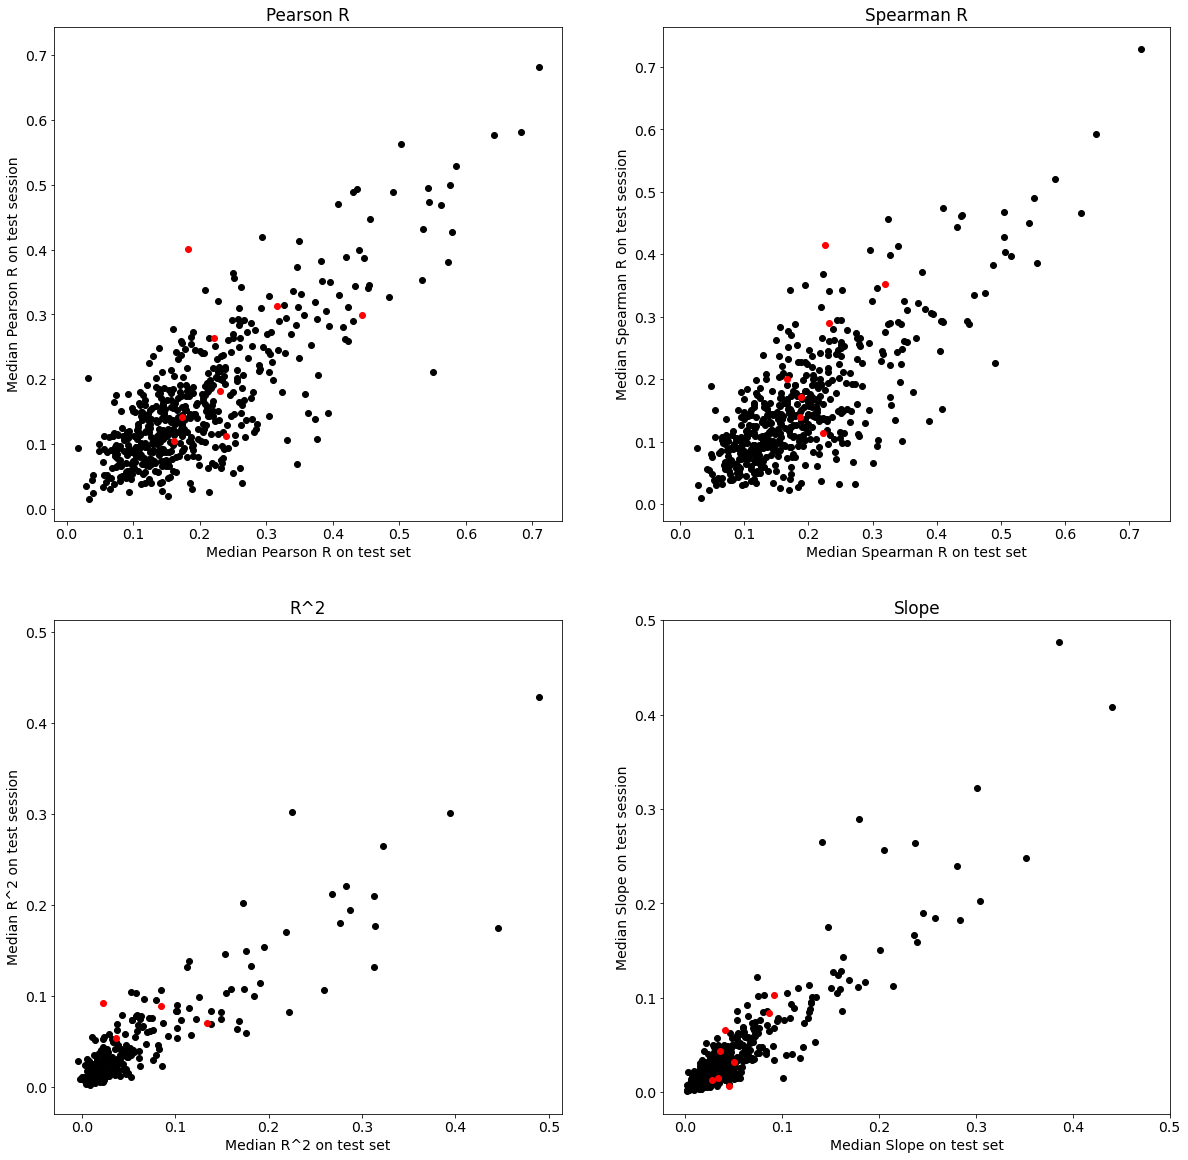

In [146]:
# look at differences between test session and test session
pairs_to_subtract = [["pearsons_train_r_median", "pearsons_test_r_median","pearsons_test_session_r_median"],
                     ["spearman_train_r_median","spearman_test_r_median","spearman_test_session_r_median"],
                     ["r2_train_median","r2_test_median","r2_test_session_median"],
                     ["slope_raw_train_median","slope_raw_test_median","slope_raw_test_session_median"]]
pairs_to_subtract = [["pearsons_test_r_median","pearsons_test_session_r_median"],
                     ["spearman_test_r_median","spearman_test_session_r_median"],
                     ["r2_test_median","r2_test_session_median"],
                     ["slope_raw_test_median","slope_raw_test_session_median"]]
ps_to_use = ["pearsons_test_session_p",
            "spearman_test_session_p",
            "r2_test_session_p",
            "slope_raw_test_session_p"]
titles = ["Pearson R",
          "Spearman R",
          "R^2",
          "Slope"]
axislabels = ["Median Pearson R",
              "Median Spearman R",
              "Median R^2",
              "Median Slope"]


fig = plt.figure(figsize = [20,20])
fig_just_vals = plt.figure(figsize = [20,20])
for i,(pair,p_name) in enumerate(zip(pairs_to_subtract,ps_to_use)):
    ax1 = fig.add_subplot(2,2,i+1)
    ax2 = fig_just_vals.add_subplot(2,2,i+1)
    
    #ax.plot (v0[needed0],diff[needed0],'k.',alpha = .5)
    
    
    v1 = np.asarray(stats_metadata_ALL_all_cells[pair[1]])
    v0 = np.asarray(stats_metadata_ALL_all_cells[pair[0]])
    pvals = np.asarray(stats_metadata_ALL_all_cells[p_name])
    needed0 = pvals>=.05
    needed = pvals<.05
    diff =  v1-v0
    #ax.plot (v0[needed0],diff[needed0],'k.',alpha = .5)
    ax1.plot (v0[needed],diff[needed],'ko',alpha = 1)
    ax2.plot (v0[needed],v1[needed],'ko',alpha = 1)
    
    v1 = np.asarray(stats_metadata_ALL[pair[1]])
    v0 = np.asarray(stats_metadata_ALL[pair[0]])
    pvals = np.asarray(stats_metadata_ALL[p_name])
    needed0 = pvals>=.05
    needed = pvals<.05
    diff =  v1-v0
    #ax.plot (v0[needed0],diff[needed0],'k.',alpha = .5)
    ax1.plot (v0[needed],diff[needed],'ro',alpha = 1)
    ax2.plot (v0[needed],v1[needed],'ro',alpha = 1)
    ax1.set_title(titles[i])
    ax1.set_xlabel(axislabels[i] + ' on test set')
    ax1.set_ylabel('Delta '+ axislabels[i] )
    
    
    ax2.set_title(titles[i])
    ax2.set_xlabel(axislabels[i] + ' on test set')
    ax2.set_ylabel(axislabels[i] + ' on test session' )
    limits = np.asarray([ax2.get_xlim(),ax2.get_ylim()])
    limits= [np.min(limits[:,0]),np.max(limits[:,1])]
    ax2.set_xlim(limits)     
    ax2.set_ylim(limits)
    

/opt/conda/envs/bci_with_suite2p/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


dict_keys(['pearsons_train_r_median', 'pearsons_train_p', 'pearsons_test_r_median', 'pearsons_test_p', 'pearsons_test_session_r_median', 'pearsons_test_session_p', 'spearman_train_r_median', 'spearman_train_p', 'spearman_test_r_median', 'spearman_test_p', 'spearman_test_session_r_median', 'spearman_test_session_p', 'slope_raw_train_median', 'slope_raw_train_p', 'slope_raw_test_median', 'slope_raw_test_p', 'slope_raw_test_session_median', 'slope_raw_test_session_p', 'r2_train_median', 'r2_test_median', 'r2_test_session_median', 'r2_train_p', 'r2_test_p', 'r2_test_session_p', 'session', 'mouse', 'train_sessions', 'stat_dict', 'scrambled', 'reversed'])

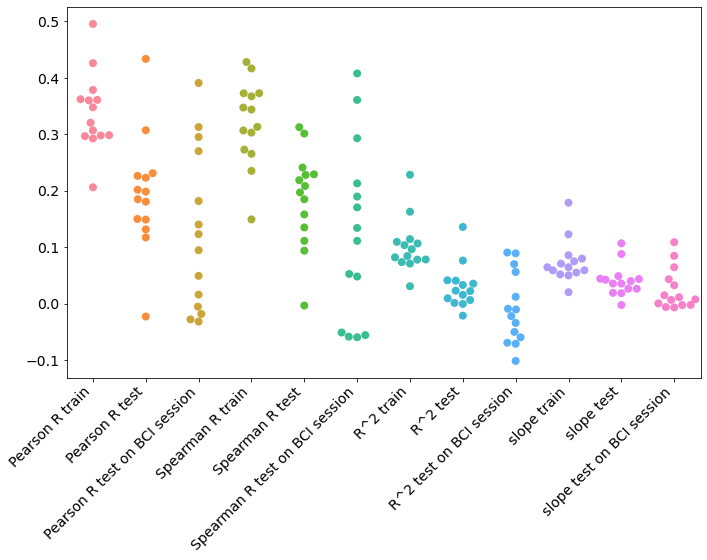

In [131]:
# plot all statistics together 

fig = plt.figure(figsize = [25,15])
ax1 = fig.add_subplot(2,2,1)

stats_df = pd.DataFrame.from_dict(stats_metadata_ALL)
needed = np.arange(int(len(stats_df)/2))

mapper = {"pearsons_train_r_median" :'Pearson R train', 
          "pearsons_test_r_median":'Pearson R test',
          "pearsons_test_session_r_median":'Pearson R test on BCI session',
          "spearman_train_r_median":'Spearman R train',
          "spearman_test_r_median":'Spearman R test',
          "spearman_test_session_r_median":'Spearman R test on BCI session',
          "r2_train_median":'R^2 train',
          "r2_test_median":'R^2 test',
          "r2_test_session_median":'R^2 test on BCI session',
          "slope_raw_train_median":'slope train',
          "slope_raw_test_median":'slope test',
          "slope_raw_test_session_median":'slope test on BCI session'}
df_now = stats_df[["pearsons_train_r_median", 
                   "pearsons_test_r_median",
                   "pearsons_test_session_r_median",
                   "spearman_train_r_median",
                   "spearman_test_r_median",
                   "spearman_test_session_r_median",
                   "r2_train_median",
                   "r2_test_median",
                   "r2_test_session_median",
                   "slope_raw_train_median",
                   "slope_raw_test_median",
                   "slope_raw_test_session_median"]].rename(columns = mapper).iloc[needed]
seaborn.swarmplot(data = df_now ,ax = ax1,size = 8)
plt.xticks(rotation=45, ha='right')

stats_metadata_ALL.keys()

File found at /home/jupyter/bucket/Data/Calcium_imaging/data_aligned/BCI_37/070122-dict_aligned-downsampled.npy


Text(0.5, 1.0, "('NoseTip', 'diff', 'x')")

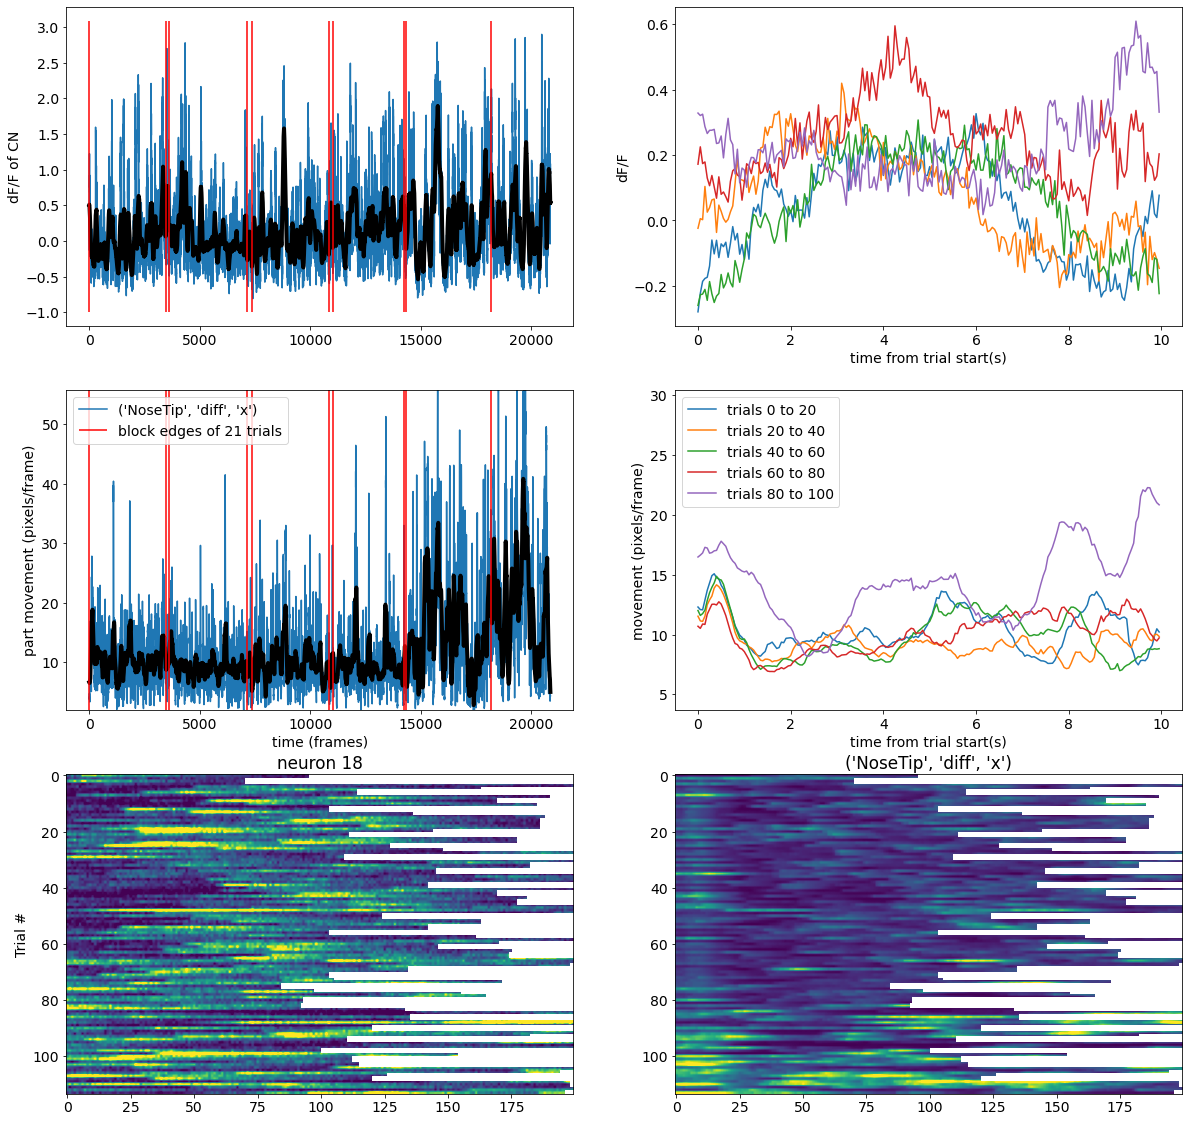

In [1086]:
#plot a certain DLC trace and CN activity side by side 
trial_len_needed = 200 #10s

mouse_now = 'BCI_37'
session_now = '070122'
#part_needed = ('PawL','diff','x')
part_needed = ('NoseTip','diff','x')

# mouse_now = 'BCI_34'
# session_now = '063022'
# part_needed = ('NoseTip','diff','y')
# mouse_now = 'BCI_35'
# session_now = '062822'
# part_needed = ('TongueTip','diff','x')

for mat_session_index in range(len(multi_session_behavior_data['session'])):
    try:
        mouse = multi_session_behavior_data['mouse'][mat_session_index][:3]+'_'+multi_session_behavior_data['mouse'][mat_session_index][3:]
        session = multi_session_behavior_data['session'][mat_session_index]
        if mouse == mouse_now and session == session_now:
            needed_session_idx = mat_session_index
            break
    except:
        pass
#cn = multi_session_dict['cn'][needed_session_idx] 

###### could do this by rerunning the script - for unfiltered data
# DLC_aligned = multi_session_dict['DLC_aligned'][needed_session_idx].copy() 
# F = multi_session_dict['F'][needed_session_idx]
data = {'F':multi_session_behavior_data['df_closedLoop'][needed_session_idx].T,
       'trial_start':multi_session_behavior_data['trial_start'][needed_session_idx],
       'cn':int(multi_session_behavior_data['conditioned_neuron'][needed_session_idx].tolist())-1,
       'si':multi_session_behavior_data['dt_si'][needed_session_idx].tolist()}
cn = data['cn']
dict_aligned = BCI_analysis.pipeline_align.get_aligned_data(suite2p_path, 
                                                            dlc_base_dir, 
                                                            bpod_path, 
                                                            sessionwise_data_path, 
                                                            aligned_data_path, 
                                                            mouse=mouse_now,#,[:3]+'_'+mouse_now[3:], 
                                                            FOV=None, 
                                                            camera=camera, 
                                                            session=session, 
                                                            sampling='down', 
                                                            functions = ['diff','diff_signed','mean'],
                                                            convolve_tau = .7,
                                                            plot = False,
                                                            overwrite=False,
                                                            use_provided_data=True,
                                                            source_data = data)
DLC_aligned = pd.DataFrame.from_dict(dict_aligned['DLC_aligned'])
F = np.concatenate(dict_aligned['F_aligned'], axis=1)
###### could do this by rerunning the script - for unfiltered data


trial_end_frames = np.asarray(dict_aligned['trial_start_indices'])
trial_start_frames = np.concatenate([[0],trial_end_frames[:-1]])
frame_indices_all = []
trial_lens = []
trial_locked_ca = np.ones([len(trial_start_frames),trial_len_needed])*np.nan
trial_locked_movements = np.ones([len(trial_start_frames),trial_len_needed])*np.nan
dlc_trace = DLC_aligned[part_needed].values
for trial_i, (start_frame, end_frame) in enumerate(zip(trial_start_frames,trial_end_frames)):
    frame_indices_all.append(np.arange(start_frame,end_frame))
    trial_len = end_frame-start_frame
    trial_lens.append(trial_len)
    trial_len_used = np.min([trial_len,trial_len_needed])
    trial_locked_ca[trial_i,:trial_len_used] = F[cn,start_frame:start_frame + trial_len_used]
    trial_locked_movements[trial_i,:np.min([trial_len,trial_len_needed])] = dlc_trace[start_frame:start_frame + trial_len_used]
frame_indices_all = np.asarray(frame_indices_all,dtype=object)
trial_num = len(frame_indices_all)


trial_average_win_half = 10
trial_average_step = 20
# trial_average_win_half = 15
# trial_average_step = 30
    



fig = plt.figure(figsize = [20,20])
ax_trace_ca = fig.add_subplot(3,2,1)
ax_trace_ca.plot(F[cn,:],label = 'CN')
ax_trace_ca.plot(BCI_analysis.plot_utils.rollingfun(F[cn,:],100,'mean'),'k-', linewidth = 4)
ax_trace_dlc = fig.add_subplot(3,2,3,sharex = ax_trace_ca)
ax_trace_dlc.plot(dlc_trace,label = part_needed)
ax_trace_dlc.plot(BCI_analysis.plot_utils.rollingfun(dlc_trace,100,'mean'),'k-', linewidth = 4)
ax_trace_dlc.set_ylim(np.percentile(dlc_trace,[.1,99.9]))
ax_mean_ca = fig.add_subplot(3,2,2)
ax_mean_movement = fig.add_subplot(3,2,4,sharex = ax_mean_ca)
vlines_list = []
for ti,tcenter in enumerate(np.arange(trial_average_win_half,trial_num-trial_average_win_half,trial_average_step)):
    mean_ca = np.nanmean(trial_locked_ca[tcenter-trial_average_win_half:tcenter+trial_average_win_half,:],0)
    ax_mean_ca.plot(np.arange(trial_len_needed)/20,mean_ca,label = 'trials {} to {}'.format(tcenter-trial_average_win_half,tcenter+trial_average_win_half))
    mean_mov = np.nanmean(trial_locked_movements[tcenter-trial_average_win_half:tcenter+trial_average_win_half,:],0)
    ax_mean_movement.plot(np.arange(trial_len_needed)/20,mean_mov,label = 'trials {} to {}'.format(tcenter-trial_average_win_half,tcenter+trial_average_win_half))
    vlines_list.extend([frame_indices_all[tcenter-trial_average_win_half][0],frame_indices_all[tcenter+trial_average_win_half][-1]])
ax_mean_movement.legend()
#ax_mean_movement.set_ylim(np.percentile(trial_locked_movements.flatten(),[1,99]))
ax_mean_movement.set_ylim(np.percentile(dlc_trace,[5,95]))
ax_mean_movement.set_xlabel('time from trial start(s)')
ax_mean_movement.set_ylabel('movement (pixels/frame)')
ax_mean_ca.set_ylabel('dF/F')
ax_mean_ca.set_xlabel('time from trial start(s)')

ax_trace_ca.vlines(vlines_list,ax_trace_ca.get_ylim()[0],ax_trace_ca.get_ylim()[1],color='red')
ax_trace_ca.set_ylabel('dF/F of CN')
ax_trace_dlc.vlines(vlines_list,ax_trace_dlc.get_ylim()[0],ax_trace_dlc.get_ylim()[1],color='red',label = 'block edges of {} trials'.format(trial_average_win_half*2+1))
ax_trace_dlc.set_ylabel('part movement (pixels/frame)')
ax_trace_dlc.set_xlabel('time (frames)')
ax_trace_dlc.legend()

ax_heatmap_ca = fig.add_subplot(3,2,5)
im_ca =ax_heatmap_ca.imshow(trial_locked_ca,aspect = 'auto')
im_ca.set_clim(np.percentile(F[cn,:],[5,95]))
ax_heatmap_ca.set_title('neuron {}'.format(cn))
ax_heatmap_ca.set_ylabel('Trial #')
ax_heatmap_movement = fig.add_subplot(3,2,6)
im_movement = ax_heatmap_movement.imshow(trial_locked_movements,aspect = 'auto')
im_movement.set_clim(np.percentile(dlc_trace,[1,99]))
ax_heatmap_movement.set_title(part_needed)

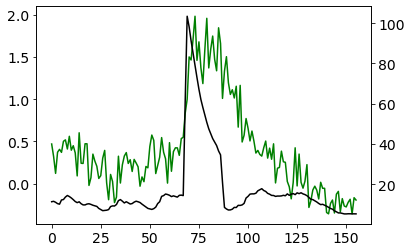

In [1002]:
trial_idx = 77
fig = plt.figure()
axc = fig.add_subplot(1,1,1)
ax = axc.twinx()
axc.plot(trial_locked_ca[trial_idx,:],'g-')#88
ax.plot(trial_locked_movements[trial_idx,:],'k-')#88

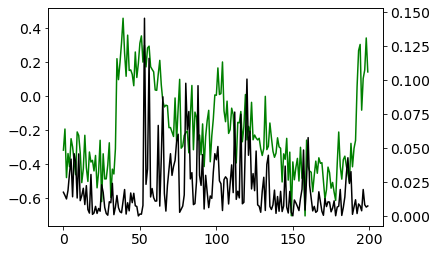

In [992]:
trial_idx = 49
fig = plt.figure()
axc = fig.add_subplot(1,1,1)
ax = axc.twinx()
axc.plot(trial_locked_ca[trial_idx,:],'g-')#88
ax.plot(trial_locked_movements[trial_idx,:],'k-')#88

(27048, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 81.97it/s]

0.04926692949527256


(26401, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.56it/s]

0.048608633050499006


(23323, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.85it/s]

0.10480358955890268


(23223, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.10it/s]

0.07543785237926837


(20166, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.43it/s]

0.08368238027651109


(19965, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 59.54it/s]

0.07477466998410809


(21355, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 55.72it/s]

0.05093905064376825


(20987, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.81it/s]

0.044126808874321855


(16959, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 67.51it/s]

0.0866313471207103


(16996, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 66.74it/s]

0.052854379521730444


(18045, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 67.66it/s]

0.06837522947819474


(17285, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 67.29it/s]

0.05857580972527576


(32373, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 52.17it/s]

0.0472239511076179


(32603, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 53.65it/s]

0.03841535396947171


(15902, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 66.90it/s]

0.0477235396910356


(17191, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 65.30it/s]

0.09865464532630208


(18482, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 65.42it/s]

0.05057846509408548


(18278, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 64.37it/s]

0.07331757848184994


(19958, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 59.66it/s]

0.10468088935663578


(20568, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.60it/s]

0.22847708467149375


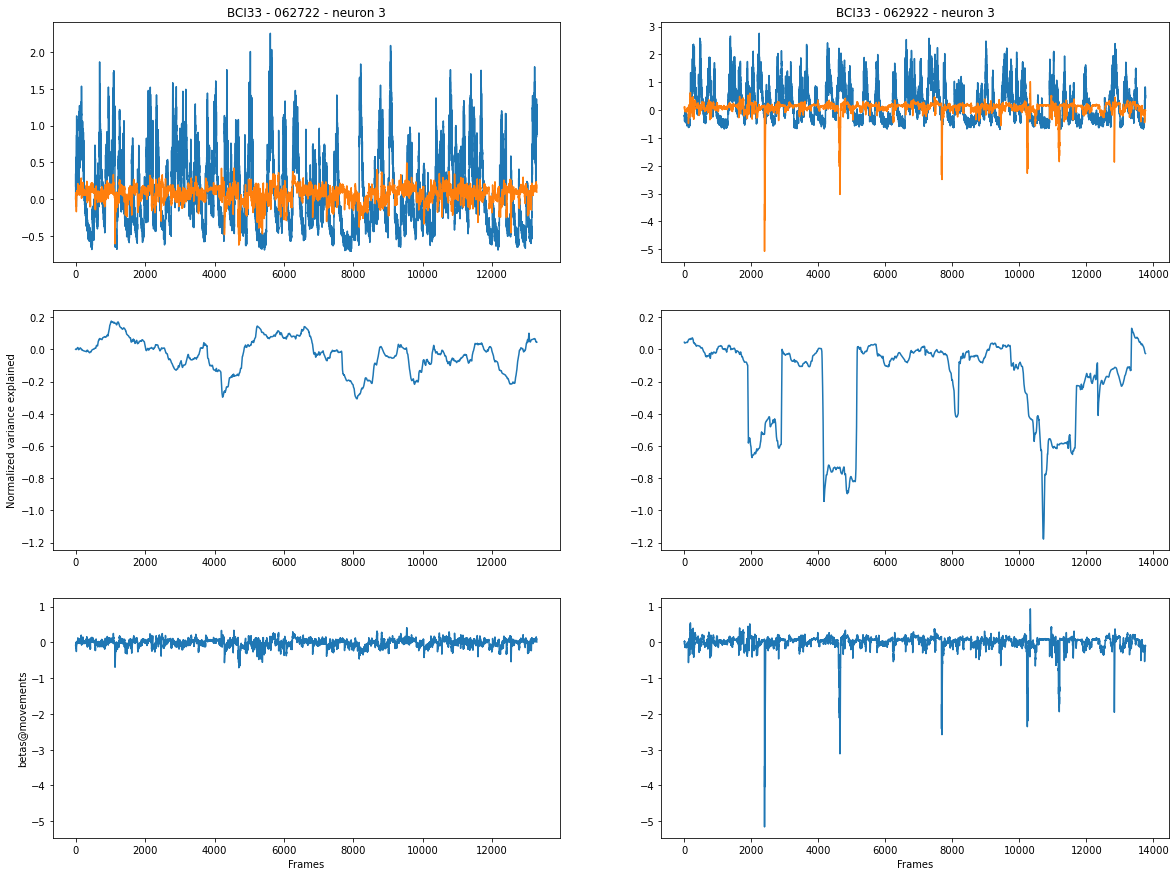

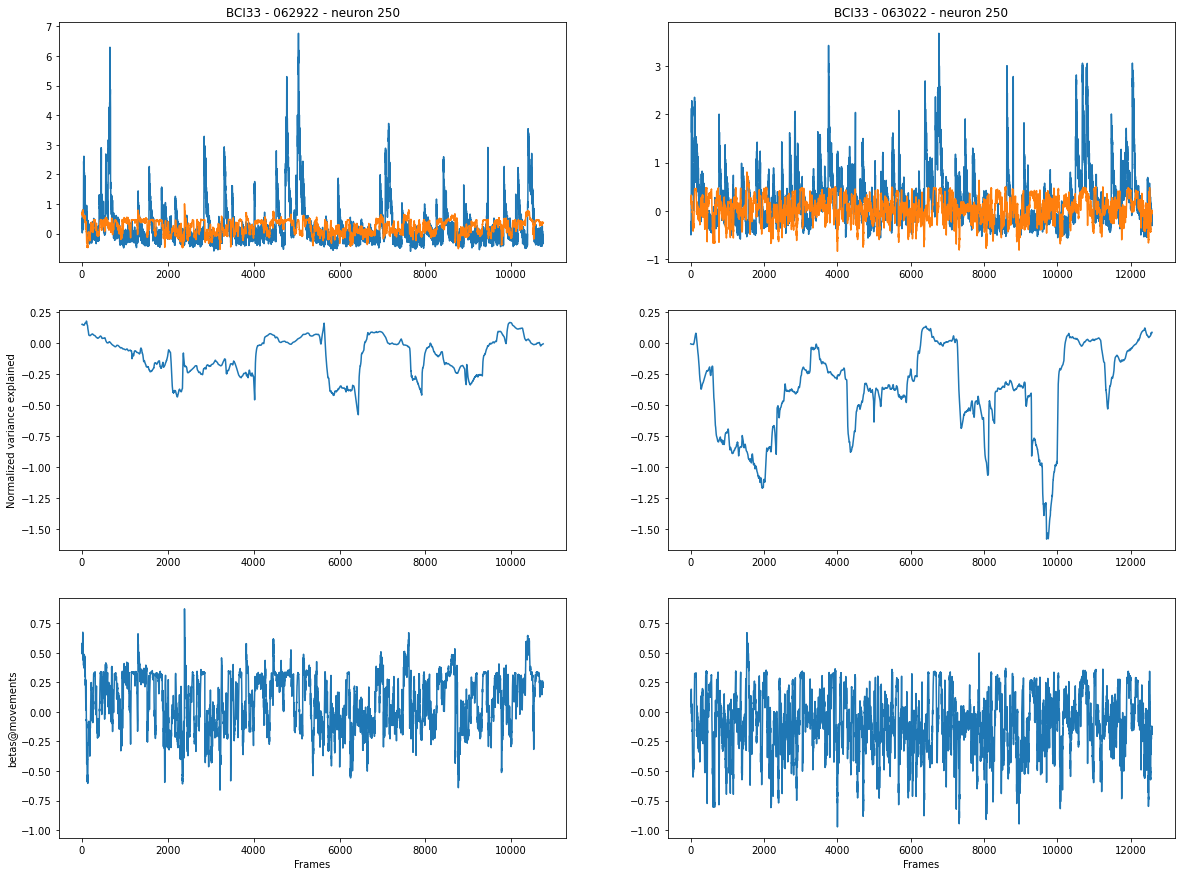

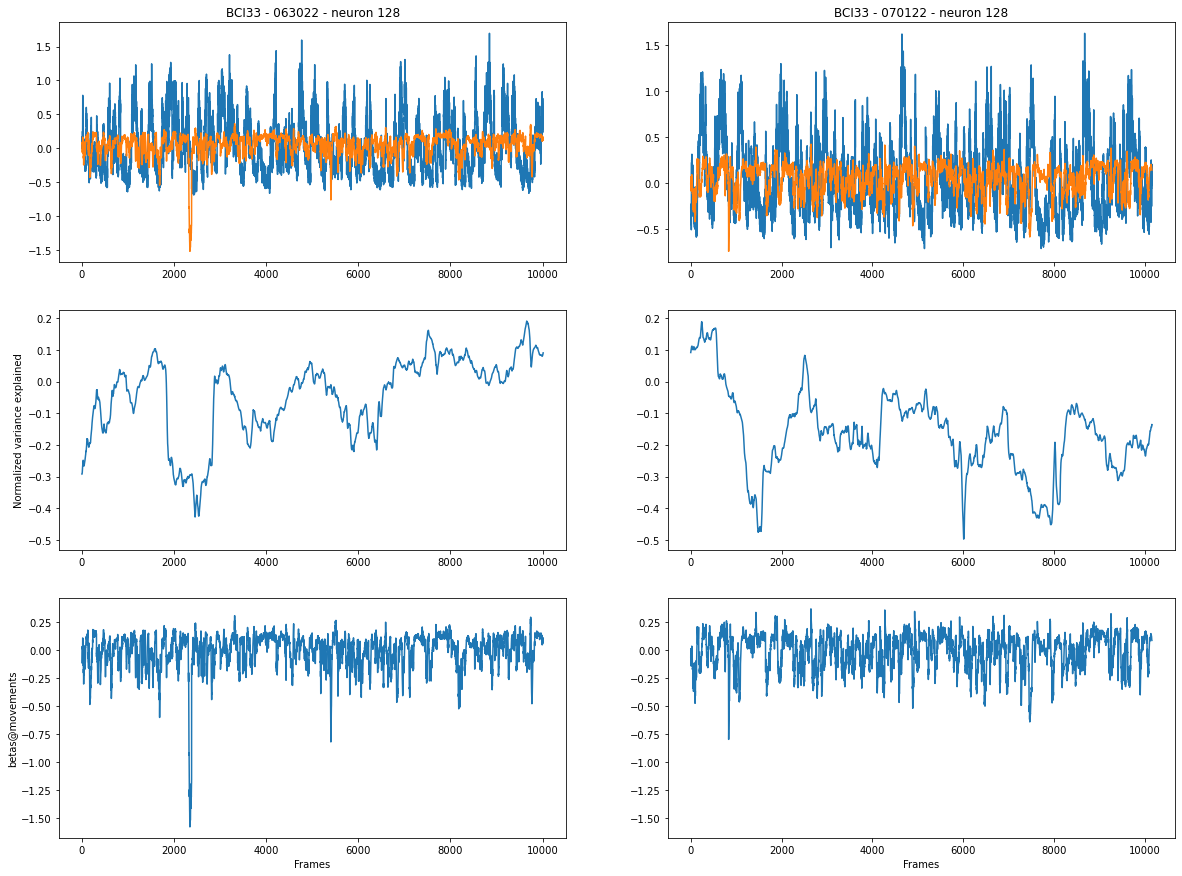

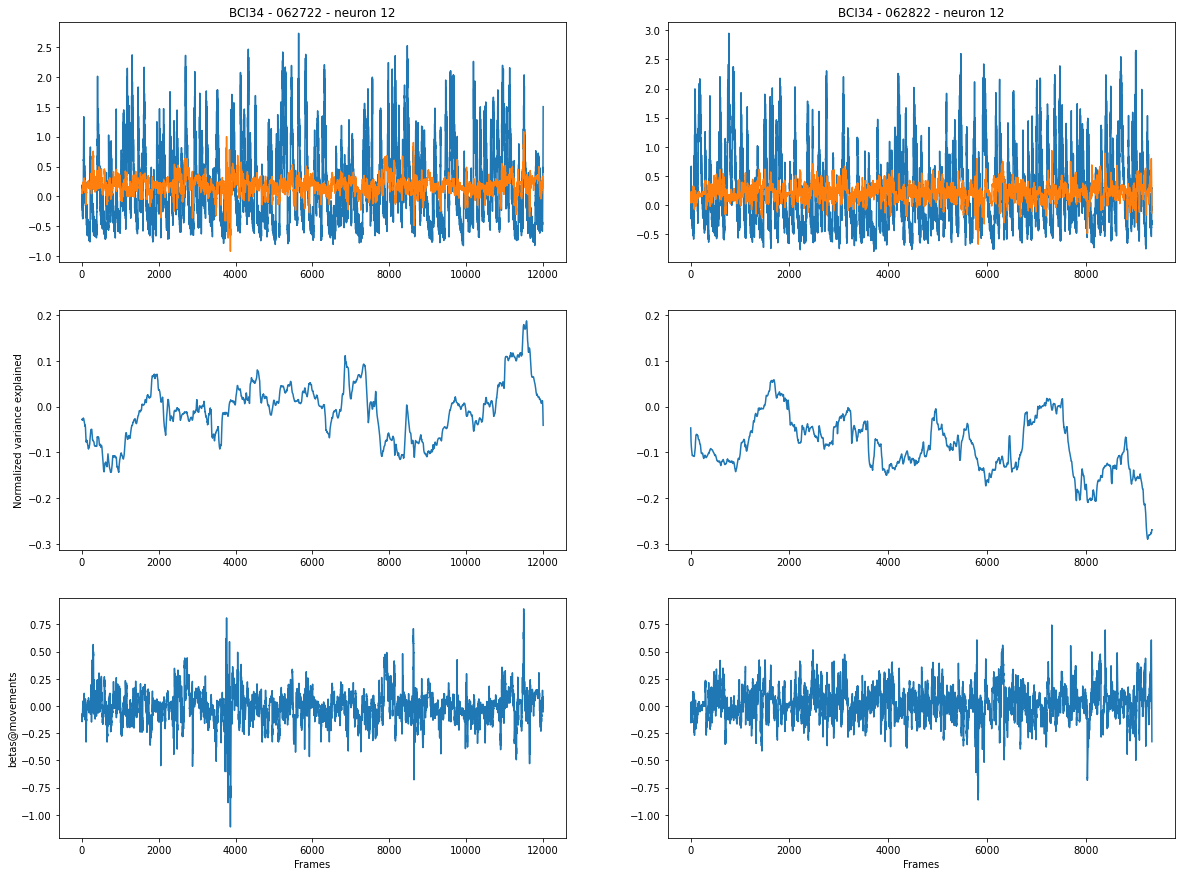

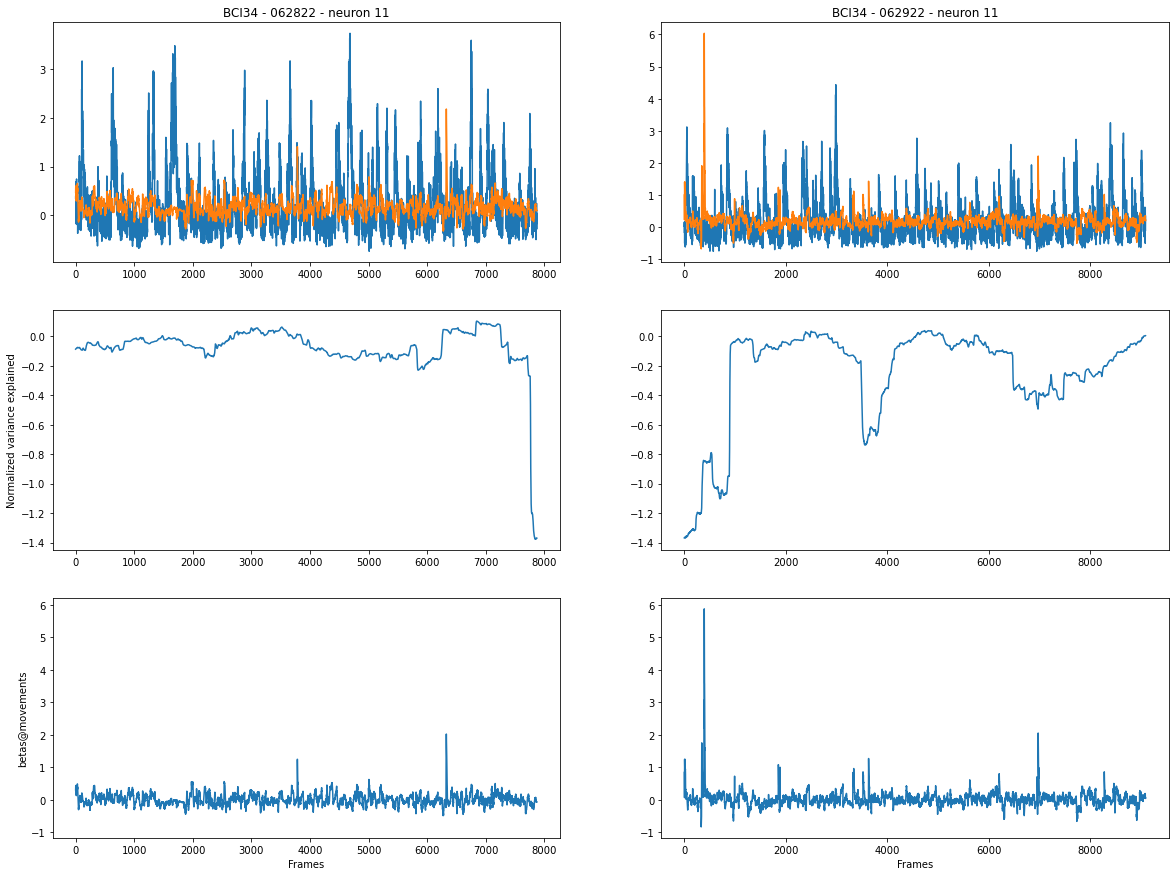

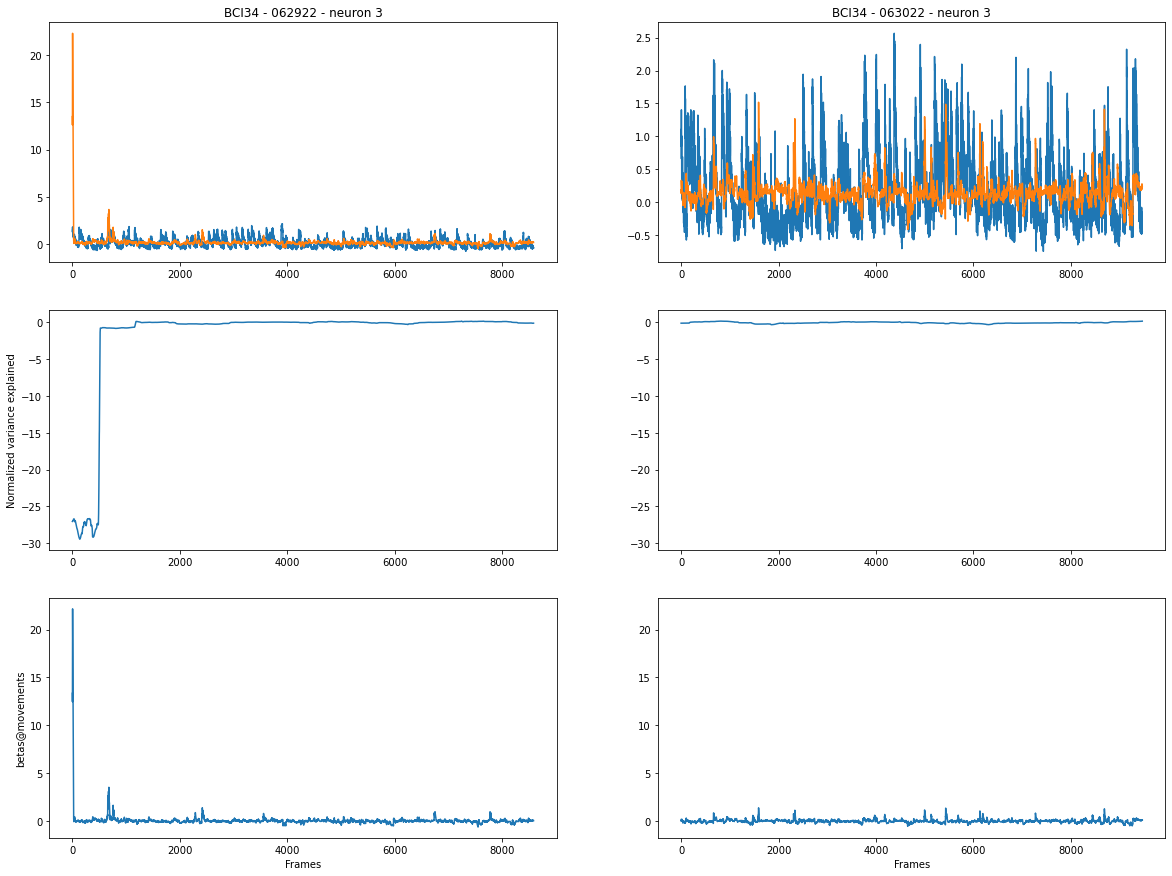

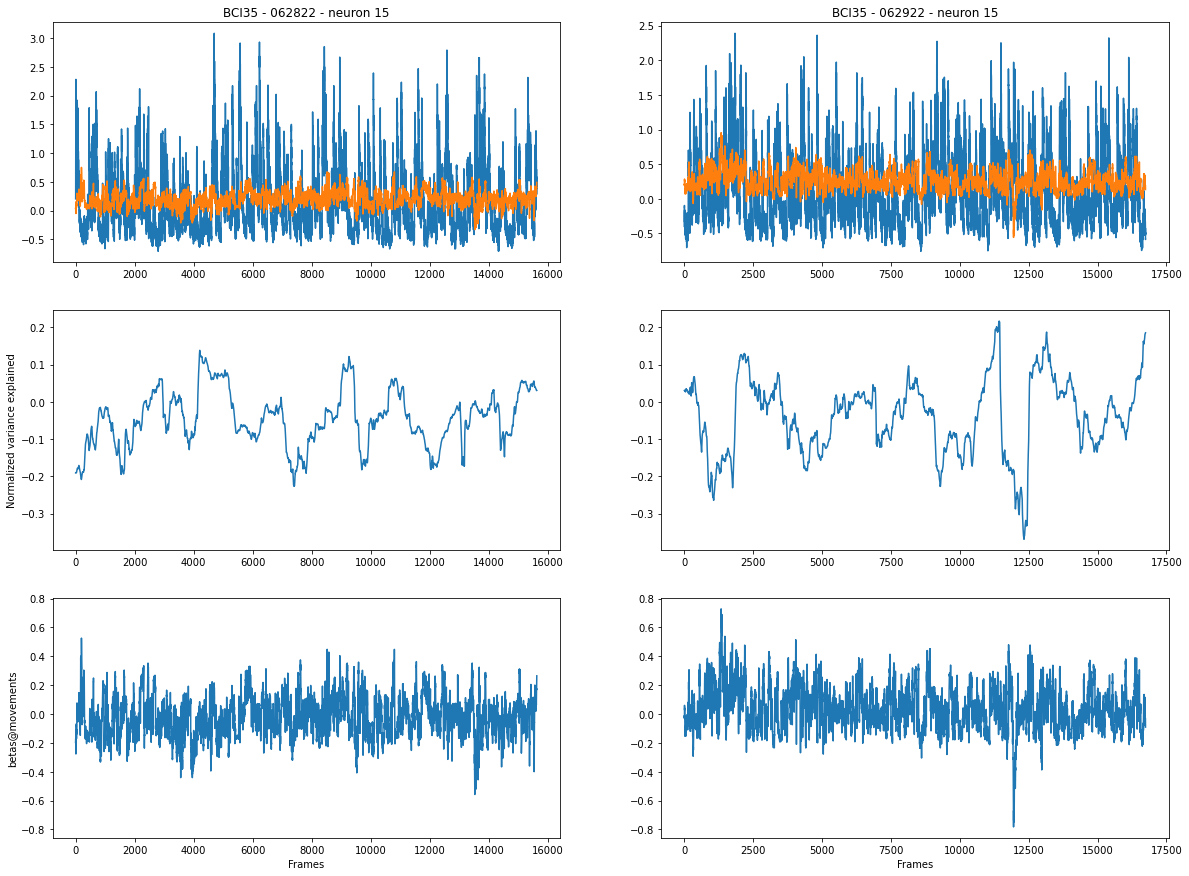

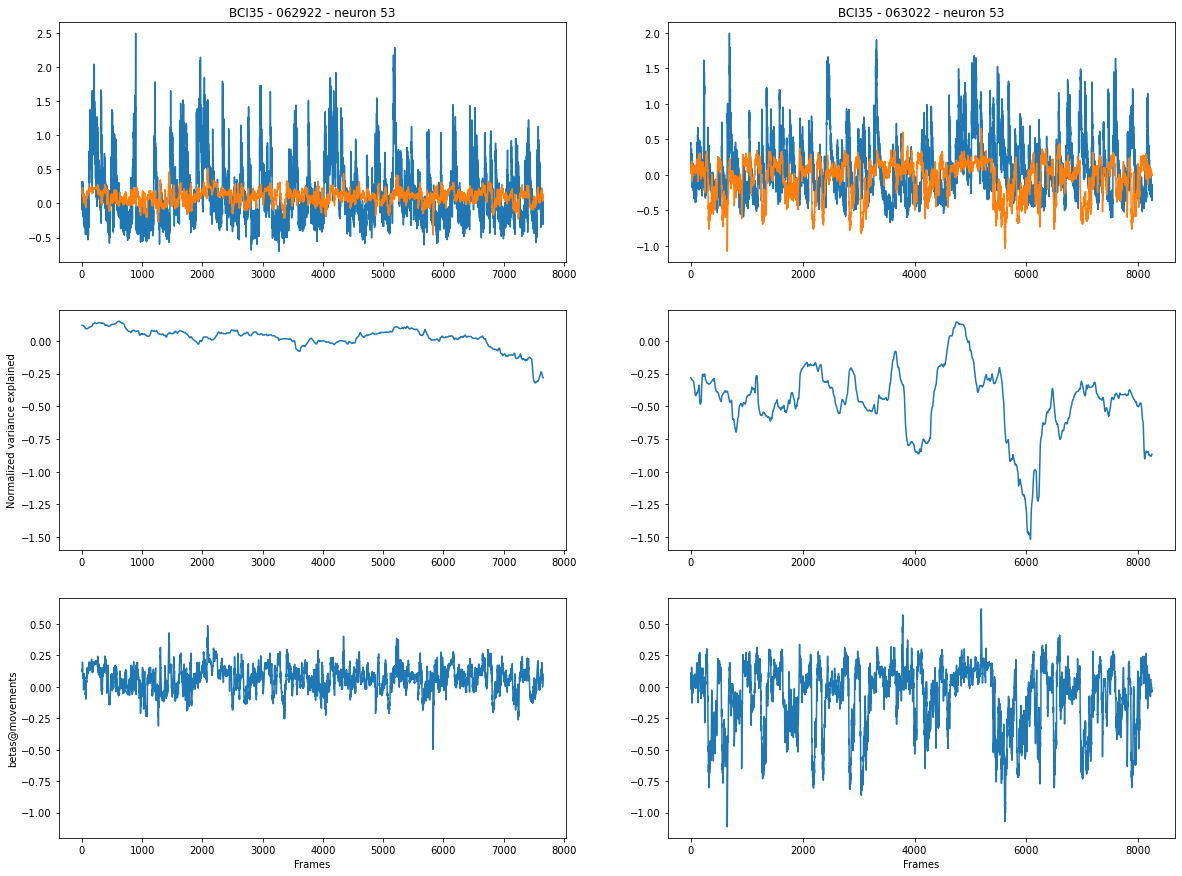

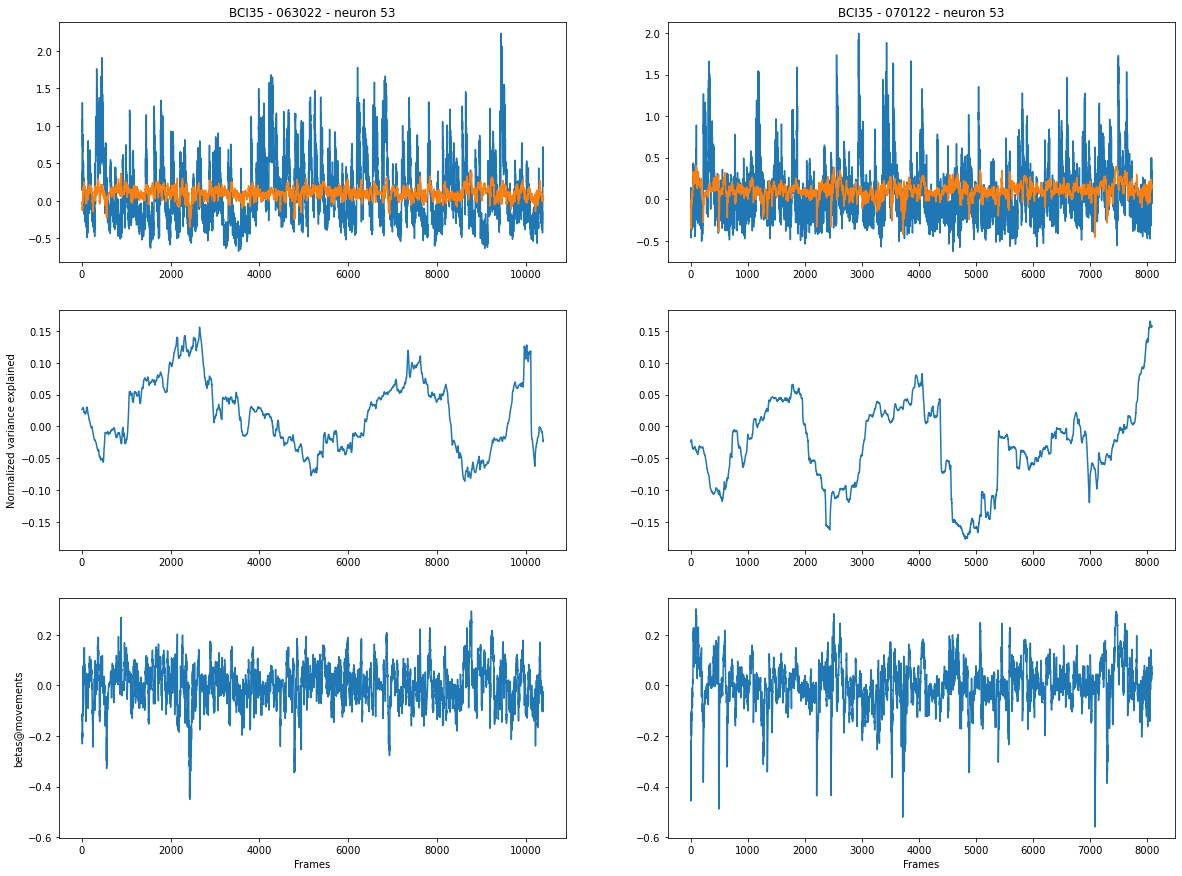

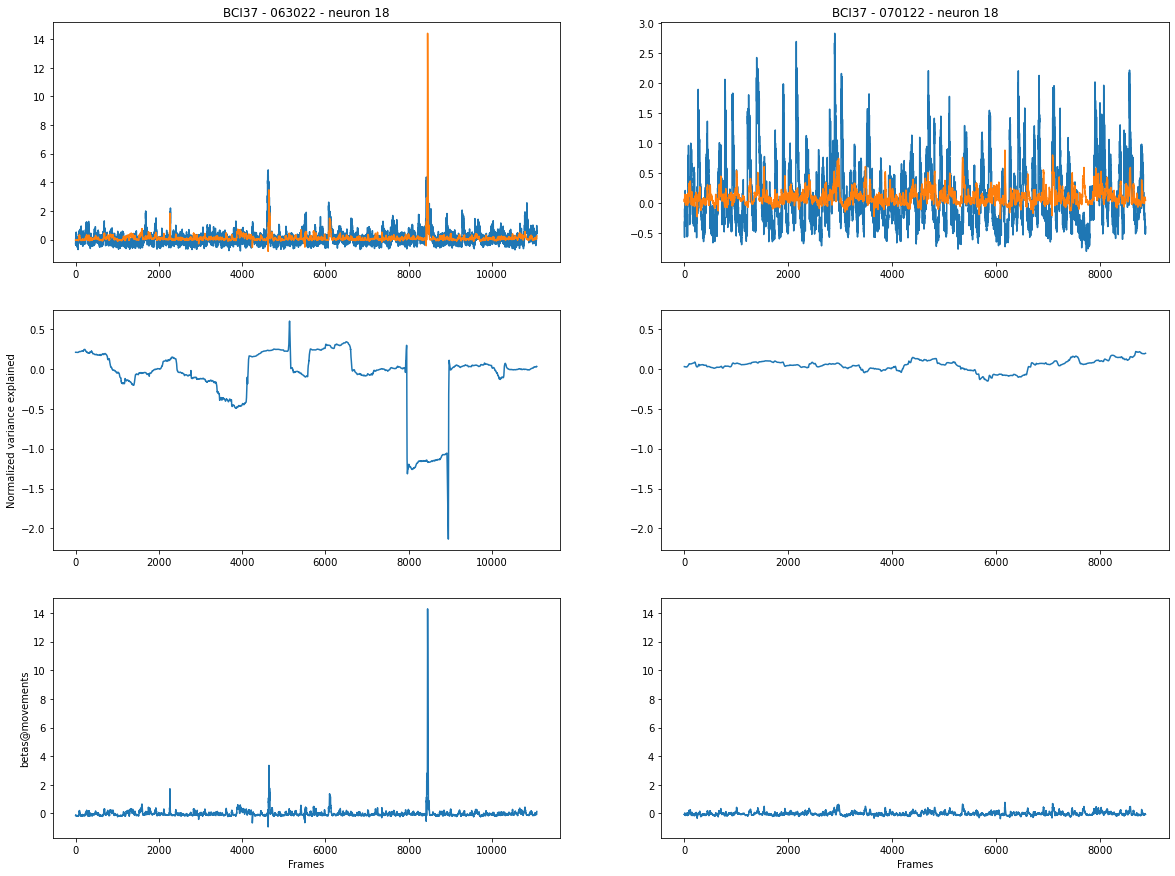

In [389]:
# Fit a CN on previous day's activity, then look at how the activity changes the next day

#create multi-session dlc-aligned
import scipy, random
zscore_fluorescence = False
session_frame_nums = []
create_lags = False
moving_average_F = False
moving_average_win = 10
lags = np.arange(-20,25,5)

bootstrap = True
bootstrap_n = 2
bootstrap_ratio = .5 # for training, testing is the rest
if not bootstrap:
    bootstrap_n = 1


movements_output_dict={'mean_movements_ctrl':[],
                      'mean_movements_test':[],
                      'var_movements_ctrl':[],
                      'var_movements_test':[],
                      'variance_explained_ctrl':[],
                      'variance_explained_test':[],}
#mouse_now = np.unique(multi_session_dict['mouse'])[1]
for mouse_now in np.unique(multi_session_dict['mouse']):
    needed_sessions = np.where(np.asarray(multi_session_dict['mouse']) == mouse_now)[0]
    for ctrl_session,test_session in zip(needed_sessions[:-1],needed_sessions[1:]):
        mean_movements_ctrl = []
        mean_movements_test = []
        var_movements_ctrl = []
        var_movements_test = []
        variance_explained_ctrl = []
        variance_explained_test = []
        for bootstrap_i in range(bootstrap_n):
            DLC_aligned_ctrl_session = multi_session_dict['DLC_aligned'][ctrl_session].copy()
            F_ctrl_session = multi_session_dict['F'][ctrl_session]
            DLC_aligned_test_session = multi_session_dict['DLC_aligned'][test_session].copy()
            F_test_session = multi_session_dict['F'][test_session]
            
            if moving_average_F:
                F_ctrl_session_filtered = []
                for f in F_ctrl_session:
                    F_ctrl_session_filtered.append(BCI_analysis.plot_utils.rollingfun(f,moving_average_win,'mean'))
                F_ctrl_session=np.asarray(F_ctrl_session_filtered)
                F_test_session_filtered = []
                for f in F_test_session:
                    F_test_session_filtered.append(BCI_analysis.plot_utils.rollingfun(f,moving_average_win,'mean'))
                F_test_session=np.asarray(F_test_session_filtered)
            if bootstrap: #bootstraps the train day
                #fit day (day before becoming a CN)
                trial_end_frames = np.asarray(multi_session_dict['trial_end_frames'][ctrl_session])
                trial_start_frames = np.concatenate([[0],trial_end_frames[:-1]])
                trial_indices = np.arange(len(trial_end_frames))
                random.shuffle(trial_indices)
                trial_indices_ctrl_train = trial_indices[:int(len(trial_indices)*bootstrap_ratio)]
                
                trial_start_frames_ctrl_train = trial_start_frames[trial_indices_ctrl_train]
                trial_end_frames_ctrl_train = trial_end_frames[trial_indices_ctrl_train]
                DLC_aligned_ctrl_train_ = None
                F_ctrl_train_ = []
                for trial_start,trial_end in zip(trial_start_frames_ctrl_train,trial_end_frames_ctrl_train):
                    DLC_aligned_ctrl_train_ = pd.concat([DLC_aligned_ctrl_train_,DLC_aligned_ctrl_session[trial_start:trial_end]], ignore_index=True)
                    if len(F_ctrl_train_) == 0:
                        F_ctrl_train_ = F_ctrl_session[:,trial_start:trial_end]
                    else:
                        F_ctrl_train_ = np.concatenate([F_ctrl_train_,F_ctrl_session[:,trial_start:trial_end]],1)
                F_ctrl_session_train = F_ctrl_train_
                DLC_aligned_ctrl_session_train = DLC_aligned_ctrl_train_
                
                trial_indices_ctrl_test = trial_indices[int(len(trial_indices)*bootstrap_ratio):]
                trial_start_frames_ctrl_test = trial_start_frames[trial_indices_ctrl_test]
                trial_end_frames_ctrl_test= trial_end_frames[trial_indices_ctrl_test]
                DLC_aligned_ctrl_test_ = None
                F_ctrl_test_ = []
                for trial_start,trial_end in zip(trial_start_frames_ctrl_test,trial_end_frames_ctrl_test):
                    DLC_aligned_ctrl_test_ = pd.concat([DLC_aligned_ctrl_test_,DLC_aligned_ctrl_session[trial_start:trial_end]], ignore_index=True)
                    if len(F_ctrl_test_) == 0:
                        F_ctrl_test_ = F_ctrl_session[:,trial_start:trial_end]
                    else:
                        F_ctrl_test_ = np.concatenate([F_ctrl_test_,F_ctrl_session[:,trial_start:trial_end]],1)
                F_ctrl_session_test = F_ctrl_test_
                DLC_aligned_ctrl_session_test = DLC_aligned_ctrl_test_
                
                #test day (when being a CN)
                trial_end_frames = np.asarray(multi_session_dict['trial_end_frames'][test_session])
                trial_start_frames = np.concatenate([[0],trial_end_frames[:-1]])
                trial_indices = np.arange(len(trial_end_frames))
                random.shuffle(trial_indices)
                trial_indices_test_session_test = trial_indices[:len(trial_indices_ctrl_test)] # same number of trials as for the test on the previous day
                trial_start_frames_test_session_test = trial_start_frames[trial_indices_test_session_test]
                trial_end_frames_test_session_test= trial_end_frames[trial_indices_test_session_test]
                DLC_aligned_test_session_test_ = None
                F_test_session_test_ = []
                for trial_start,trial_end in zip(trial_start_frames_test_session_test,trial_end_frames_test_session_test):
                    DLC_aligned_test_session_test_ = pd.concat([DLC_aligned_test_session_test_,DLC_aligned_test_session[trial_start:trial_end]], ignore_index=True)
                    if len(F_test_session_test_) == 0:
                        F_test_session_test_ = F_test_session[:,trial_start:trial_end]
                    else:
                        F_test_session_test_ = np.concatenate([F_test_session_test_,F_test_session[:,trial_start:trial_end]],1)
                F_test_session_test = F_test_session_test_
                DLC_aligned_test_session_test = DLC_aligned_test_session_test_
            
            
            
            if zscore_fluorescence:
                print('implement Zscoring across datasets')
                # F_ctrl = scipy.stats.zscore(F_ctrl,axis = 1)
                # F_test = scipy.stats.zscore(F_test,axis = 1)
            for k in DLC_aligned_ctrl_session.keys():
                if 'mean' in k:# subtract mean from the raw position from day to day
                    DLC_aligned_ctrl_session_train[k] = DLC_aligned_ctrl_session_train[k] - np.nanmean(DLC_aligned_ctrl_session[k])
                    DLC_aligned_ctrl_session_test[k] = DLC_aligned_ctrl_session_test[k] - np.nanmean(DLC_aligned_ctrl_session[k])
                    DLC_aligned_ctrl_session[k] = DLC_aligned_ctrl_session[k] - np.nanmean(DLC_aligned_ctrl_session[k])
                    DLC_aligned_test_session_test[k] = DLC_aligned_test_session_test[k] - np.nanmean(DLC_aligned_test_session[k])
                    DLC_aligned_test_session[k] = DLC_aligned_test_session[k] - np.nanmean(DLC_aligned_test_session[k])
            
            
            DLC_aligned_all = pd.concat([DLC_aligned_ctrl_session, DLC_aligned_test_session], ignore_index=True)
            F_all = np.concatenate([F_ctrl_session,F_test_session],1)
            DLC_aligned = pd.concat([DLC_aligned_ctrl_session_test, DLC_aligned_test_session_test], ignore_index=True) # this is the test
            F = np.concatenate([F_ctrl_session_test,F_test_session_test],1)
            ctrl_frame_num = F_ctrl_session_test.shape[1]
            print(DLC_aligned.shape)
            


            for k in DLC_aligned.keys(): # remove eye and likelihood
                if 'likelihood'in k or 'eye' in k[0].lower() or 'pole' in k[0].lower():
                    DLC_aligned.pop(k)
                    DLC_aligned_all.pop(k)
                    DLC_aligned_ctrl_session.pop(k)
                    DLC_aligned_ctrl_session_train.pop(k)
                    DLC_aligned_ctrl_session_test.pop(k)
                    DLC_aligned_test_session.pop(k)
                    DLC_aligned_test_session_test.pop(k)
            for k in DLC_aligned.keys(): # remove lickport
                if 'lickport' in k[0].lower() or 'pole' in k[0].lower() or 'mean' in k: #remove mean as well
                    DLC_aligned.pop(k)
                    DLC_aligned_all.pop(k)
                    DLC_aligned_ctrl_session.pop(k)
                    DLC_aligned_ctrl_session_train.pop(k)
                    DLC_aligned_ctrl_session_test.pop(k)
                    DLC_aligned_test_session.pop(k)
                    DLC_aligned_test_session_test.pop(k)
            for k in DLC_aligned.keys(): # normalize data
                mean_val = DLC_aligned_all[k].mean()
                std_val = DLC_aligned_all[k].std()
                
                DLC_aligned[k] = (DLC_aligned[k] - mean_val)/std_val
                DLC_aligned_all[k] = (DLC_aligned_all[k] - mean_val)/std_val
                DLC_aligned_ctrl_session[k] = (DLC_aligned_ctrl_session[k] - mean_val)/std_val
                DLC_aligned_ctrl_session_train[k] = (DLC_aligned_ctrl_session_train[k] - mean_val)/std_val
                DLC_aligned_ctrl_session_test[k] = (DLC_aligned_ctrl_session_test[k] - mean_val)/std_val
                DLC_aligned_test_session[k] = (DLC_aligned_test_session[k] - mean_val)/std_val
                DLC_aligned_test_session_test[k] = (DLC_aligned_test_session_test[k] - mean_val)/std_val
                
                #DLC_aligned[k] = (DLC_aligned[k] - DLC_aligned[k].quantile(.05))/(DLC_aligned[k].quantile(.95)-DLC_aligned[k].quantile(.05))
            

            #create offsets
            if create_lags:
                print('sort out creating lags')
#                 cols_new = []
#                 for col in DLC_aligned.columns:
#                     for offset in lags:
#                         cols_new.append((col[0],offset,col[1],col[2]))
#                 df2 = pd.DataFrame(0, index=range(0), columns=cols_new)#dlc_data.columns)
#                 df2_ctrl = pd.DataFrame(0, index=range(0), columns=cols_new)#dlc_data.columns)
#                 df2_test = pd.DataFrame(0, index=range(0), columns=cols_new)#dlc_data.columns)

#                 for k in df2.keys():
#                     df2[k] = pd.Series(np.roll(DLC_aligned[k[0],k[2],k[3]],k[1]))
#                     df2_ctrl[k] = pd.Series(np.roll(DLC_aligned_ctrl[k[0],k[2],k[3]],k[1]))
#                     df2_test[k] = pd.Series(np.roll(DLC_aligned_test[k[0],k[2],k[3]],k[1]))
#                 DLC_aligned = df2    
#                 DLC_aligned_ctrl = df2_ctrl 
#                 DLC_aligned_test = df2_test


            cn = multi_session_dict['cn'][test_session]
            scores_, beta_, intercept_ = pipeline_regression.linear_regression(F_ctrl_session_train[cn:cn+1], DLC_aligned_ctrl_session_train)
            scores_ = scores_[0]
            print(scores_)
            beta_ = beta_[0]
            intercept_ = intercept_[0]

            var_win = 1000
            original_variance = BCI_analysis.plot_utils.rollingfun(F[cn, :],var_win,'var')
            predicted_variance =BCI_analysis.plot_utils.rollingfun((beta_@DLC_aligned.T.values) + intercept_,var_win,'var') 
            residual_variance = BCI_analysis.plot_utils.rollingfun(F[cn, :] - ((beta_@DLC_aligned.T.values) + intercept_),var_win,'var')
            nonexplained_variance = residual_variance/original_variance
            explained_variance = 1-nonexplained_variance


            orig_var_ctrl = np.nanvar(F_ctrl_session_test[cn,:])
            residual_var_ctrl = np.nanvar(F_ctrl_session_test[cn,:] - ((beta_@DLC_aligned_ctrl_session_test.T.values) + intercept_))
            explained_variance_ctrl = 1- residual_var_ctrl/orig_var_ctrl

            orig_var_test = np.nanvar(F_test_session_test[cn,:])
            residual_var_test = np.nanvar(F_test_session_test[cn,:] - ((beta_@DLC_aligned_test_session_test.T.values) + intercept_))
            explained_variance_test = 1- residual_var_test/orig_var_test
            
            
            movements_ctrl = (beta_@DLC_aligned_ctrl_session_test.T.values)
            movements_test = (beta_@DLC_aligned_test_session_test.T.values)
            if bootstrap_i == 0:
                fig = plt.figure(figsize = [20,15])
                ax_ctrl_trace = fig.add_subplot(3,2,1)
                ax_ctrl_trace.plot(F_ctrl_session_test[cn, :], label=f'neuron {cn} Flourescence Trace')
                ax_ctrl_trace.plot((beta_@DLC_aligned_ctrl_session_test.T.values) + intercept_, label='Fitted Data')
                ax_ctrl_trace.set_title('{} - {} - neuron {}'.format(mouse_now, multi_session_dict['session'][ctrl_session],cn))

                ax_ctrl_var_explained = fig.add_subplot(3,2,3)
                ax_ctrl_var_explained.plot(explained_variance[:ctrl_frame_num])
                ax_ctrl_var_explained.set_ylabel('Normalized variance explained')


                ax_test_trace = fig.add_subplot(3,2,2)
                ax_test_trace.plot(F_test_session_test[cn, :], label=f'neuron {cn} Flourescence Trace')
                ax_test_trace.plot((beta_@DLC_aligned_test_session_test.T.values) + intercept_, label='Fitted Data')
                ax_test_trace.set_title('{} - {} - neuron {}'.format(mouse_now, multi_session_dict['session'][test_session],cn))


                ax_test_var_explained = fig.add_subplot(3,2,4,sharey = ax_ctrl_var_explained)
                ax_test_var_explained.plot(explained_variance[ctrl_frame_num:])

                ax_ctrl_movements = fig.add_subplot(3,2,5)
                
                ax_ctrl_movements.plot(movements_ctrl)
                ax_ctrl_movements.set_ylabel('betas@movements')
                ax_ctrl_movements.set_xlabel('Frames')

                ax_test_movements = fig.add_subplot(3,2,6,sharey = ax_ctrl_movements)
                
                ax_test_movements.plot(movements_test)
                ax_test_movements.set_xlabel('Frames')
            
            
            mean_movements_ctrl.append(np.nanmean(movements_ctrl))
            mean_movements_test.append(np.nanmean(movements_test))
            var_movements_ctrl.append(np.nanvar(movements_ctrl))
            var_movements_test.append(np.nanvar(movements_test))
            variance_explained_ctrl.append(explained_variance_ctrl)
            variance_explained_test.append(explained_variance_test)
            #break
        movements_output_dict['mean_movements_ctrl'].append(mean_movements_ctrl)
        movements_output_dict['mean_movements_test'].append(mean_movements_test)
        movements_output_dict['var_movements_ctrl'].append(var_movements_ctrl)
        movements_output_dict['var_movements_test'].append(var_movements_test)
        movements_output_dict['variance_explained_ctrl'].append(variance_explained_ctrl)
        movements_output_dict['variance_explained_test'].append(variance_explained_test)

    #break


(-0.5, 1.5)

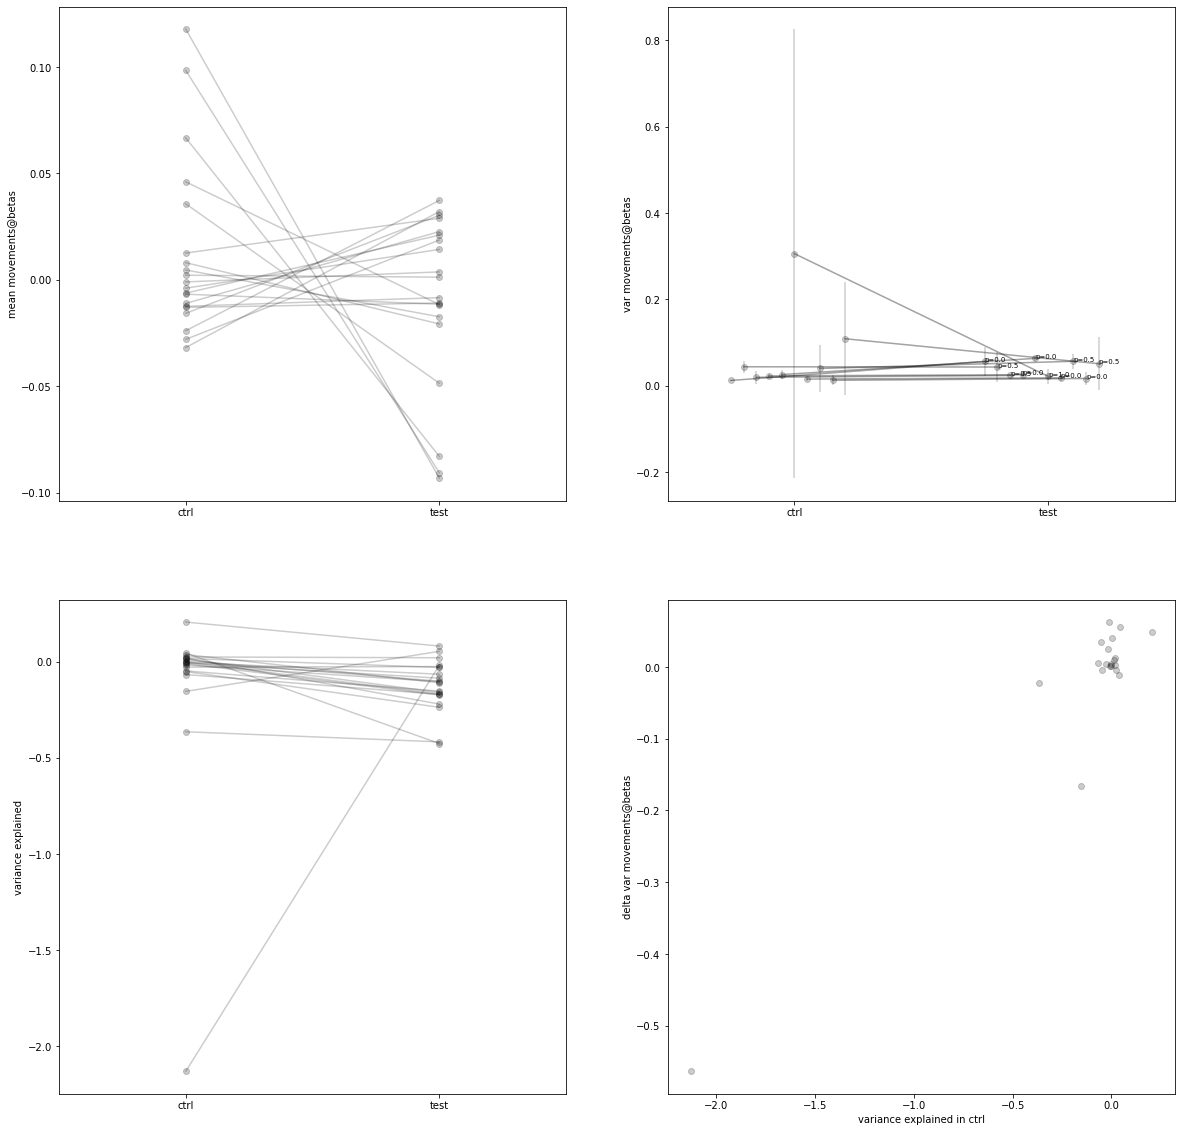

In [390]:
fig = plt.figure(figsize = [20,20])
ax1 = fig.add_subplot(2,2,1)
ax1.set_ylabel('mean movements@betas')
ax2 = fig.add_subplot(2,2,2)
ax2.set_ylabel('var movements@betas')
ax3 = fig.add_subplot(2,2,4)
ax4 = fig.add_subplot(2,2,3)
p_list = []
for mean1,mean2 in zip(np.concatenate(movements_output_dict['mean_movements_ctrl']),np.concatenate(movements_output_dict['mean_movements_test'])):
    ax1.plot([0,1],[mean1,mean2],'ko-',alpha = .2)
var_diff = []
for i, (var1,var2) in enumerate(zip(movements_output_dict['var_movements_ctrl'],movements_output_dict['var_movements_test'])):
    xvals = [0+i*.05-.25,1+i*.05-.25]
    yvals = [np.nanmean(var1),np.nanmean(var2)]
    yerrors = np.concatenate([np.diff(np.percentile(var1,[5,95])),np.diff(np.percentile(var2,[5,95]))])
    ax2.plot(xvals,yvals,'ko-',alpha = .2)
    p = 1- np.nanmean(((np.asarray(var2)-np.asarray(var1))>0))
    p_list.append(p)
    ax2.errorbar(xvals,yvals,yerrors,color = 'black',alpha = .2)
    ax2.text (xvals[1],yvals[1],'p={}'.format(np.round(p,2)),fontsize = 'x-small')
    var_diff.append(np.asarray(var2)-np.asarray(var1))
var_diff = np.concatenate(var_diff) 
for varexp1,varexp2 in zip(np.concatenate(movements_output_dict['variance_explained_ctrl']),np.concatenate(movements_output_dict['variance_explained_test'])):
    ax4.plot([0,1],[varexp1,varexp2],'ko-',alpha = .2)
ax4.set_ylabel('variance explained')

ax3.plot(np.concatenate(movements_output_dict['variance_explained_ctrl']),var_diff,'ko',alpha = .2)
ax3.set_xlabel('variance explained in ctrl')
ax3.set_ylabel('delta var movements@betas')
ax1.set_xticks([0,1])
ax1.set_xticklabels(['ctrl','test'])
ax1.set_xlim([-.5,1.5])
ax2.set_xticks([0,1])
ax2.set_xticklabels(['ctrl','test'])
ax2.set_xlim([-.5,1.5])
#ax2.set_ylim([-.1,.3])
ax4.set_xticks([0,1])
ax4.set_xticklabels(['ctrl','test'])
ax4.set_xlim([-.5,1.5])
#ax1.plot(np.concatenate([np.ones_like(movements_output_dict['mean_movements_ctrl']),np.ones_like(movements_output_dict['mean_movements_test'])*2]),np.concatenate([movements_output_dict['mean_movements_ctrl'],movements_output_dict['mean_movements_test']]),'ko')

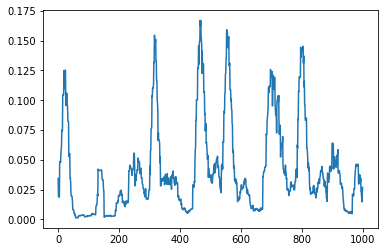

In [306]:
plt.plot(lickport_movement[:1000])

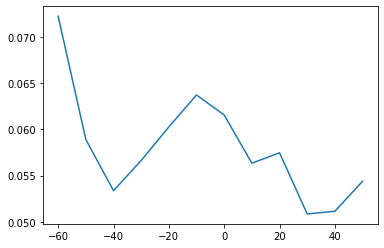

/tmp/ipykernel_8748/637008623.py:74: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


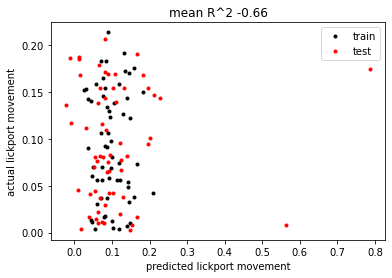

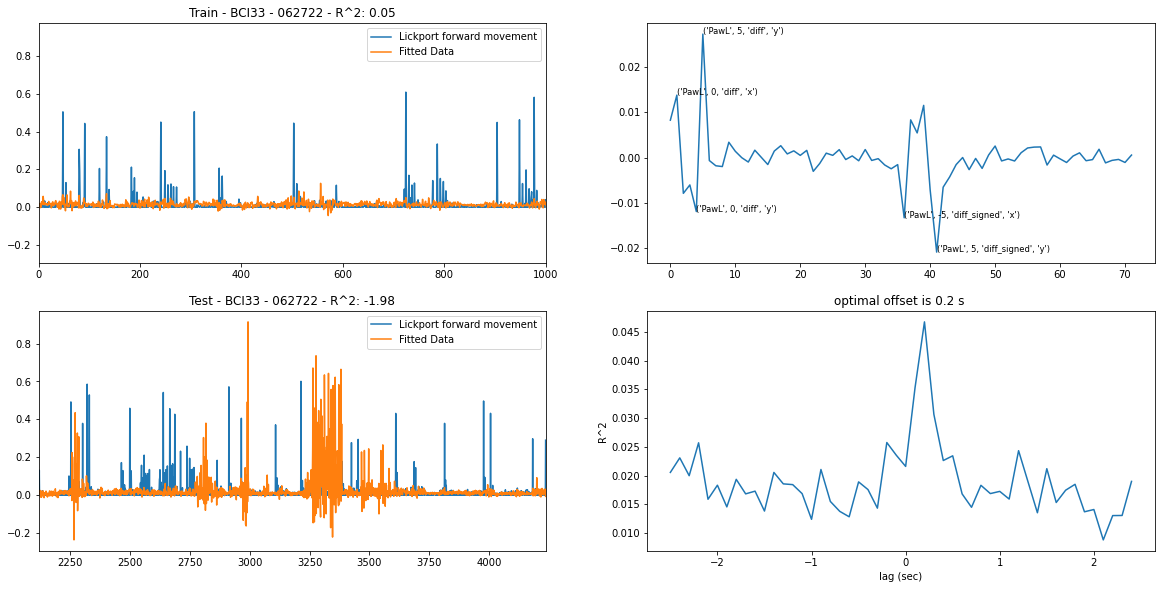

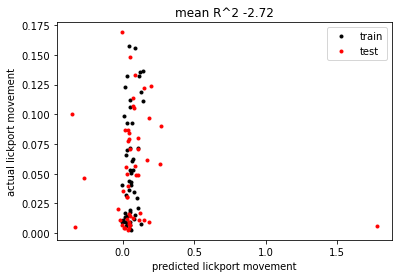

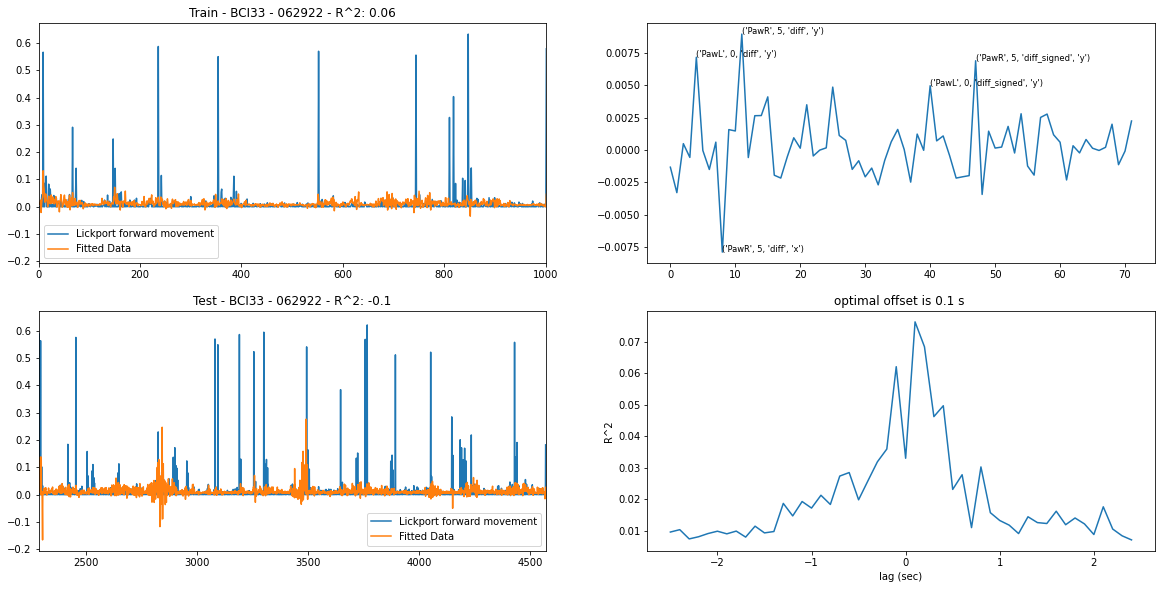

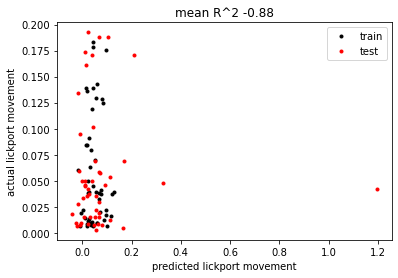

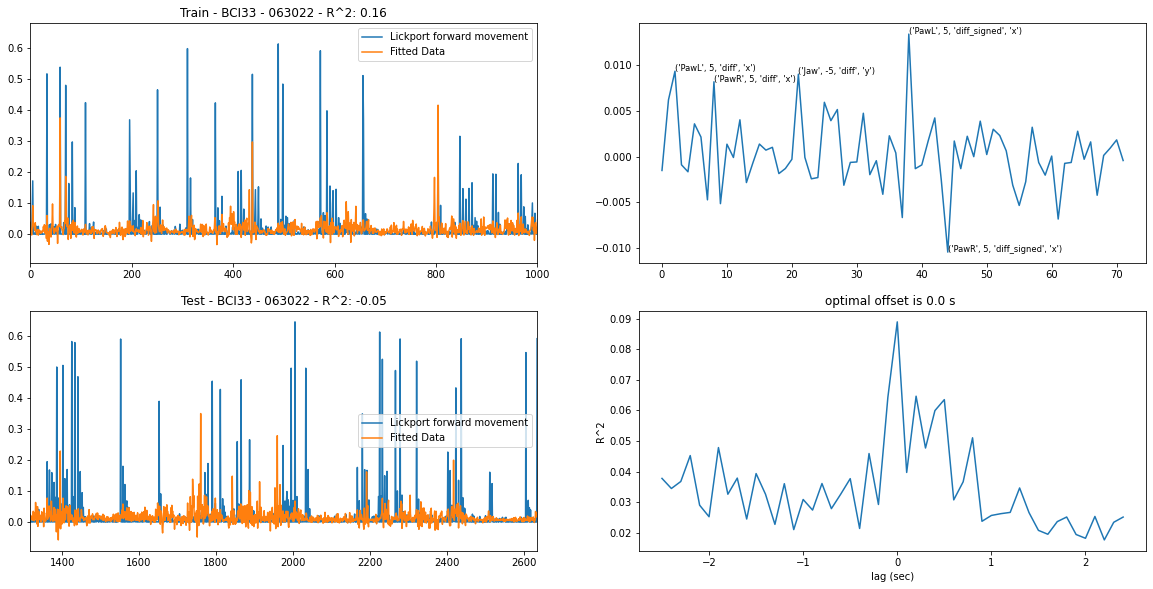

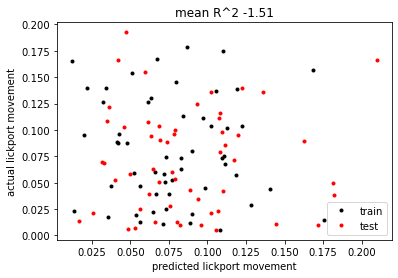

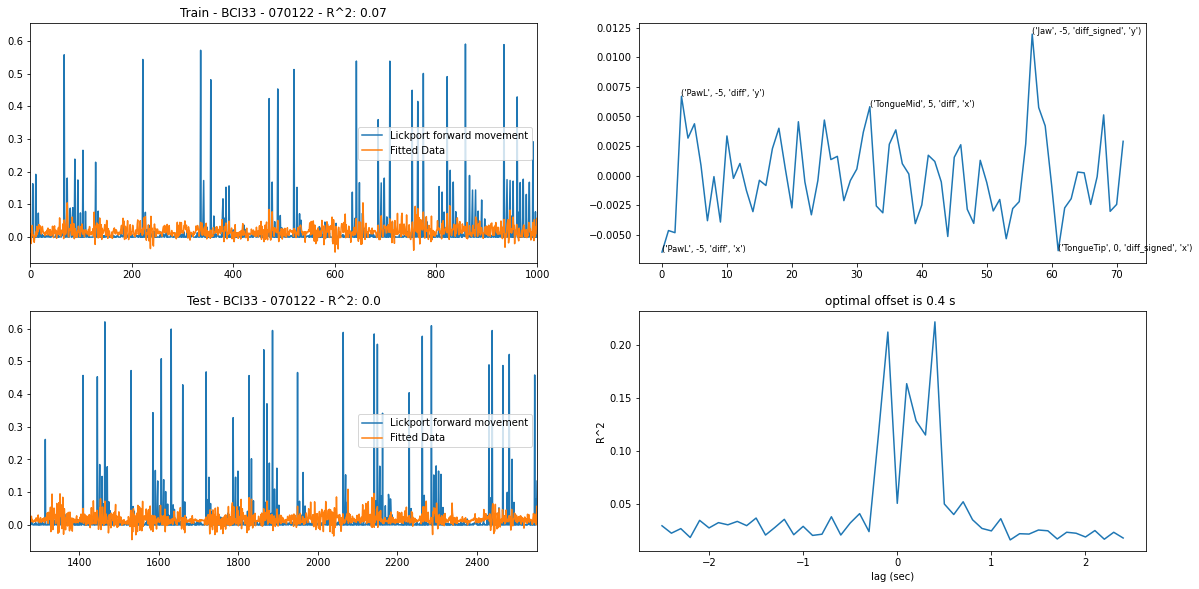

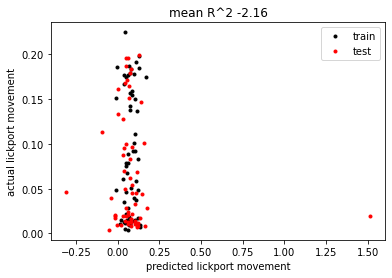

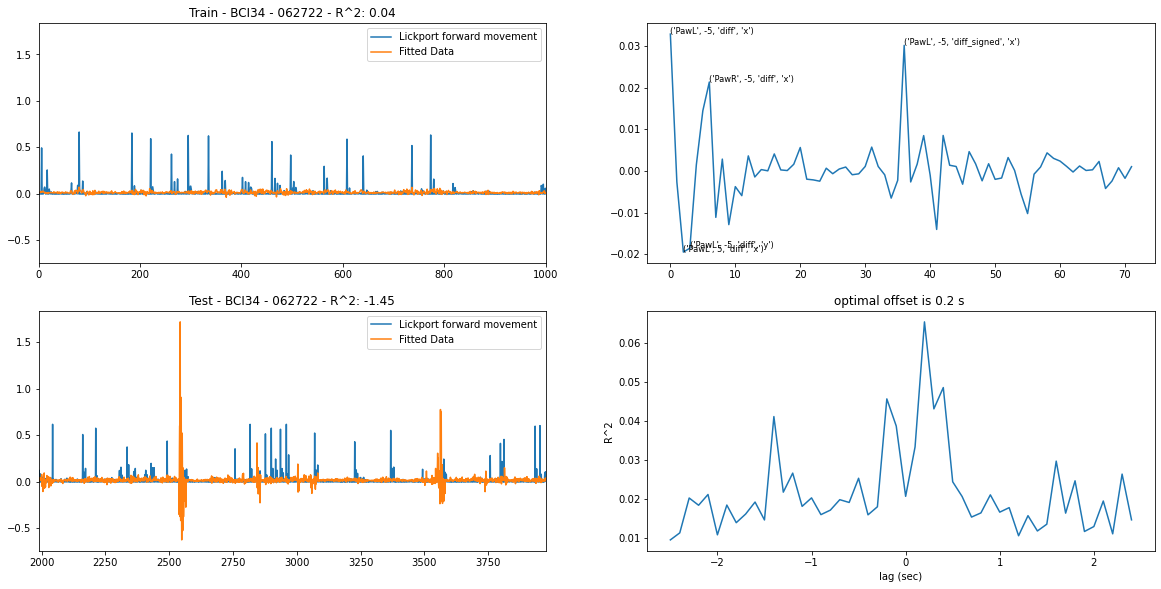

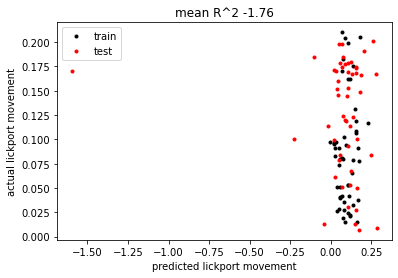

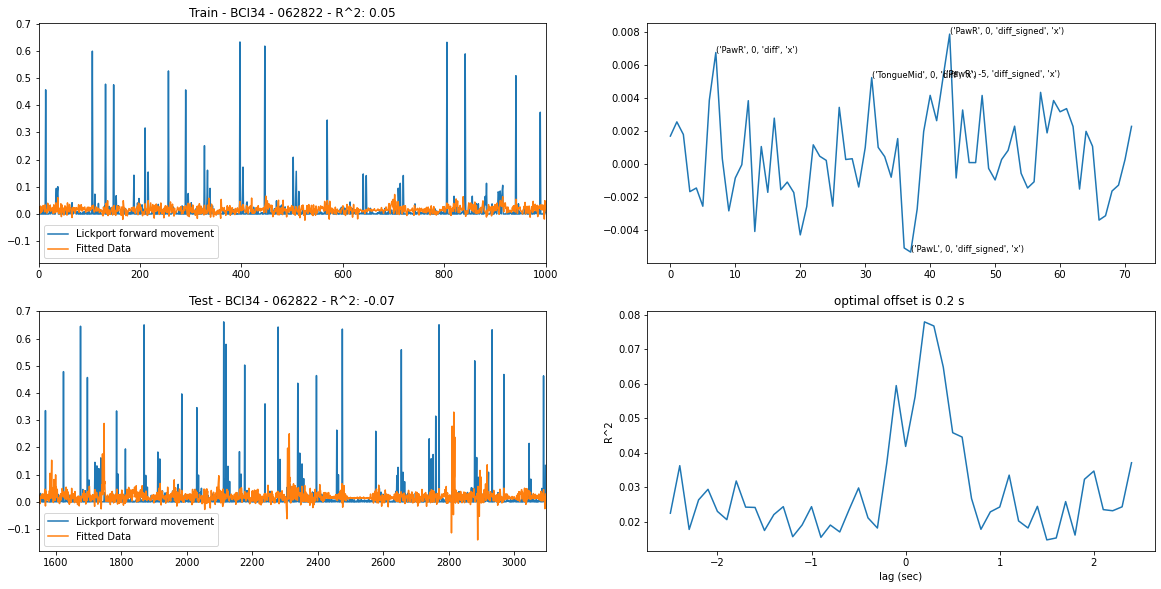

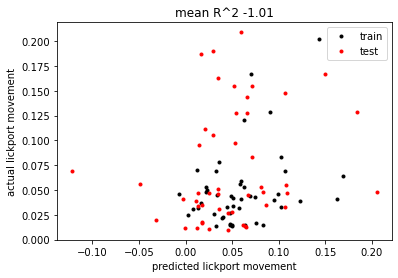

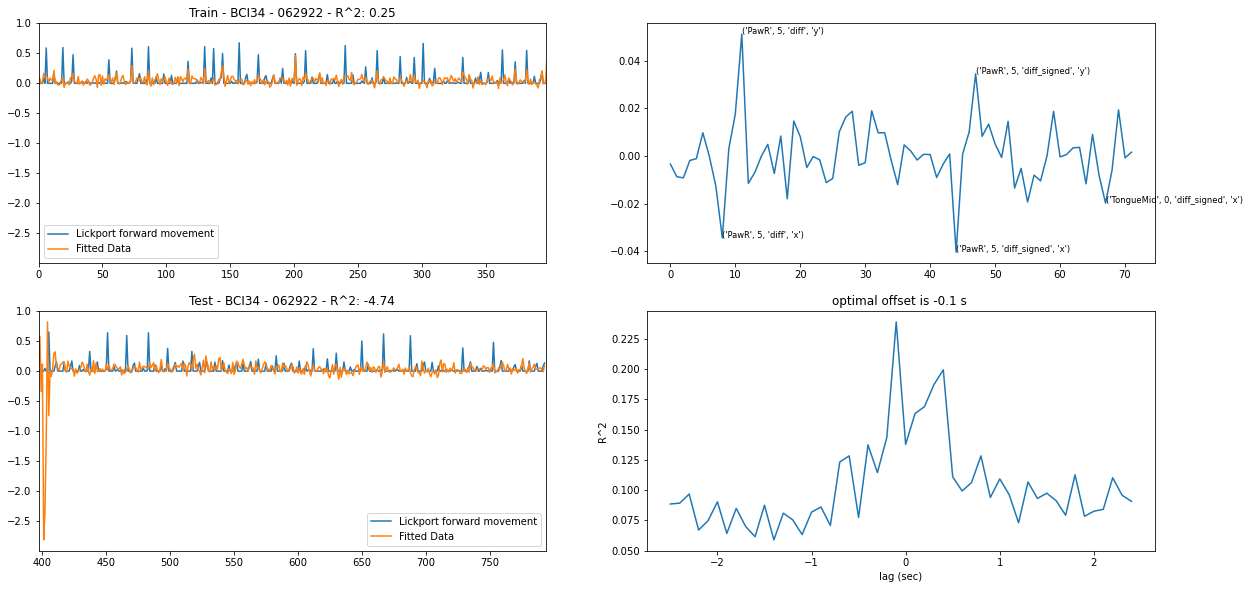

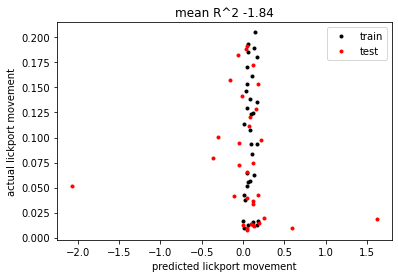

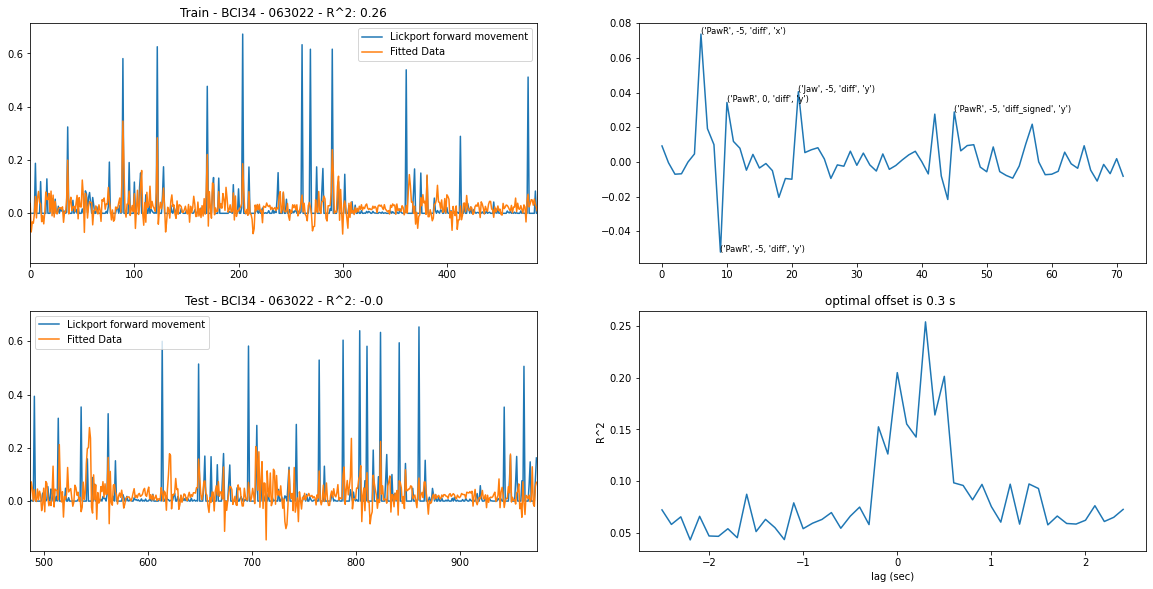

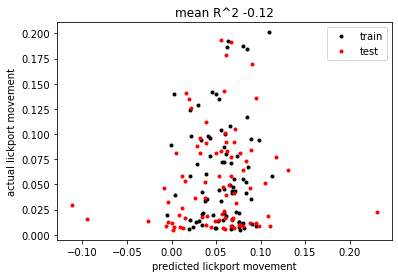

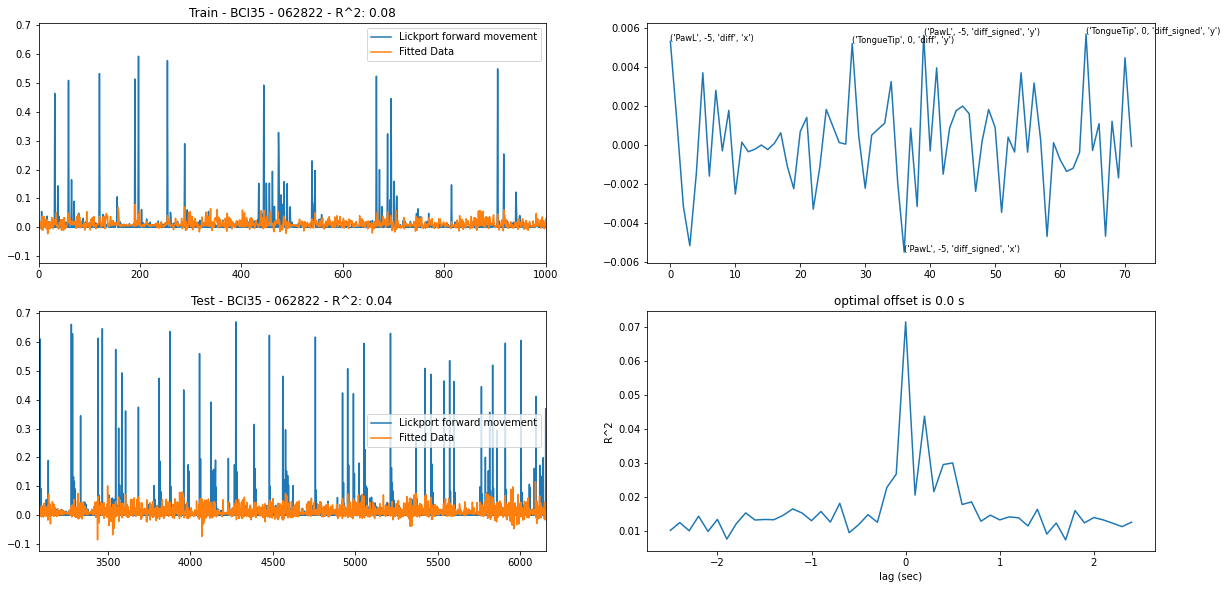

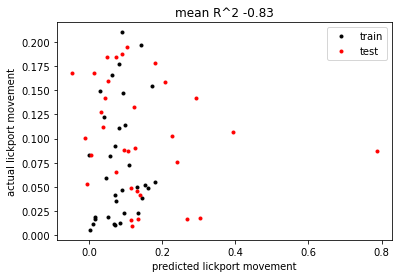

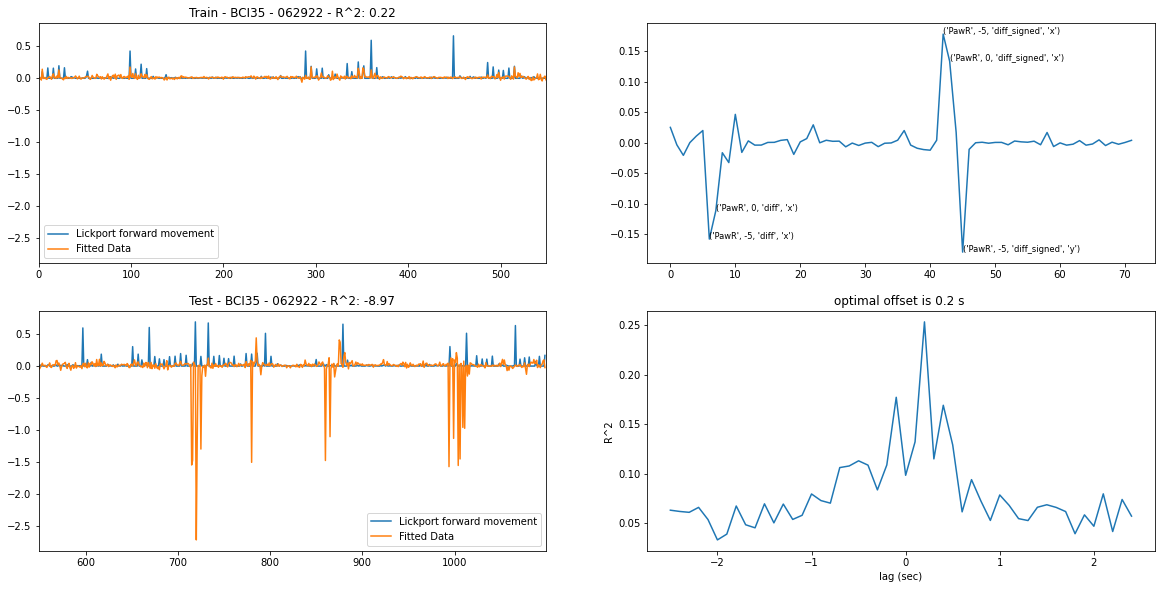

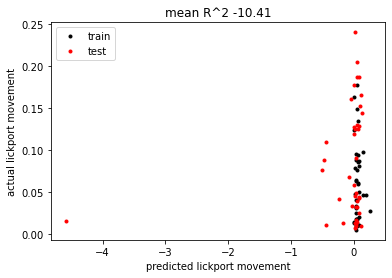

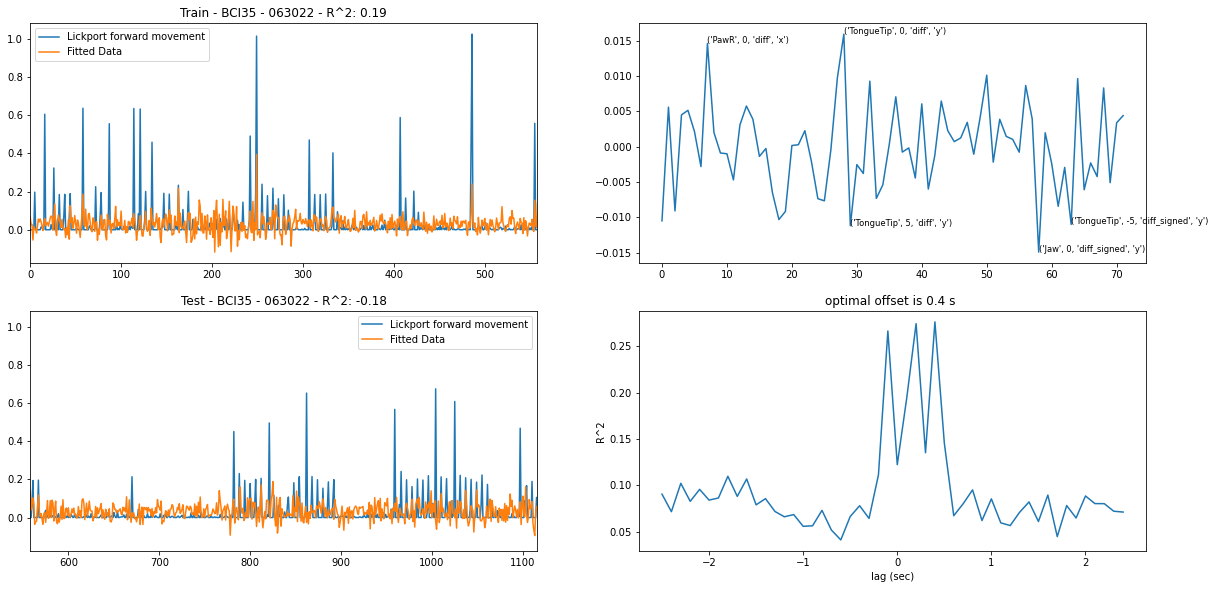

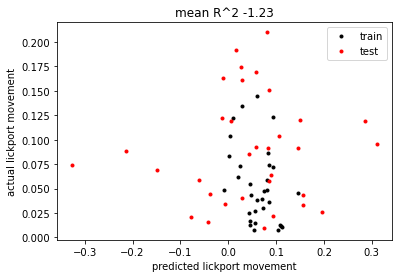

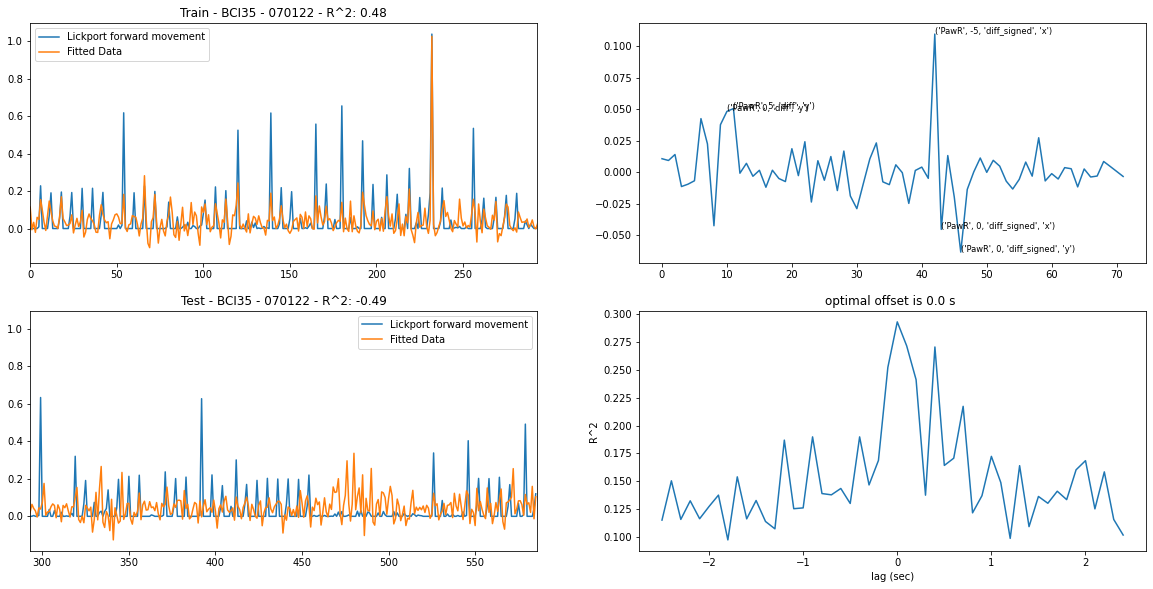

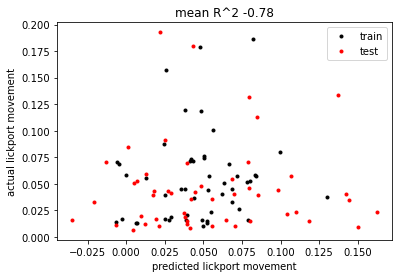

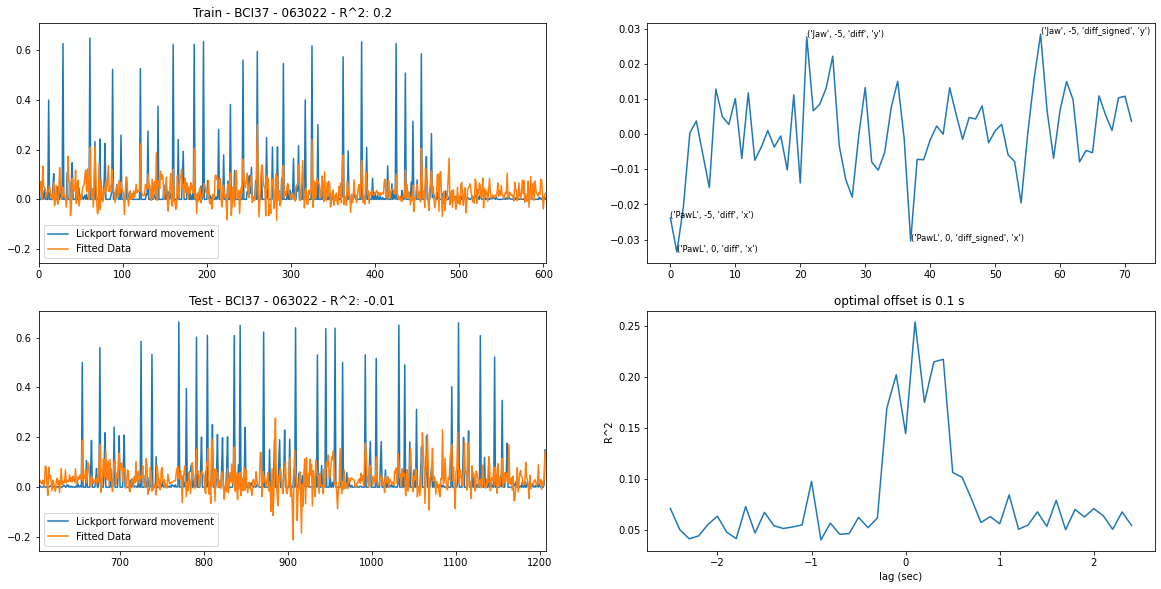

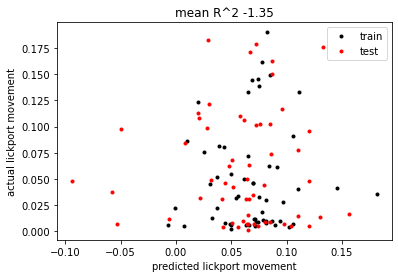

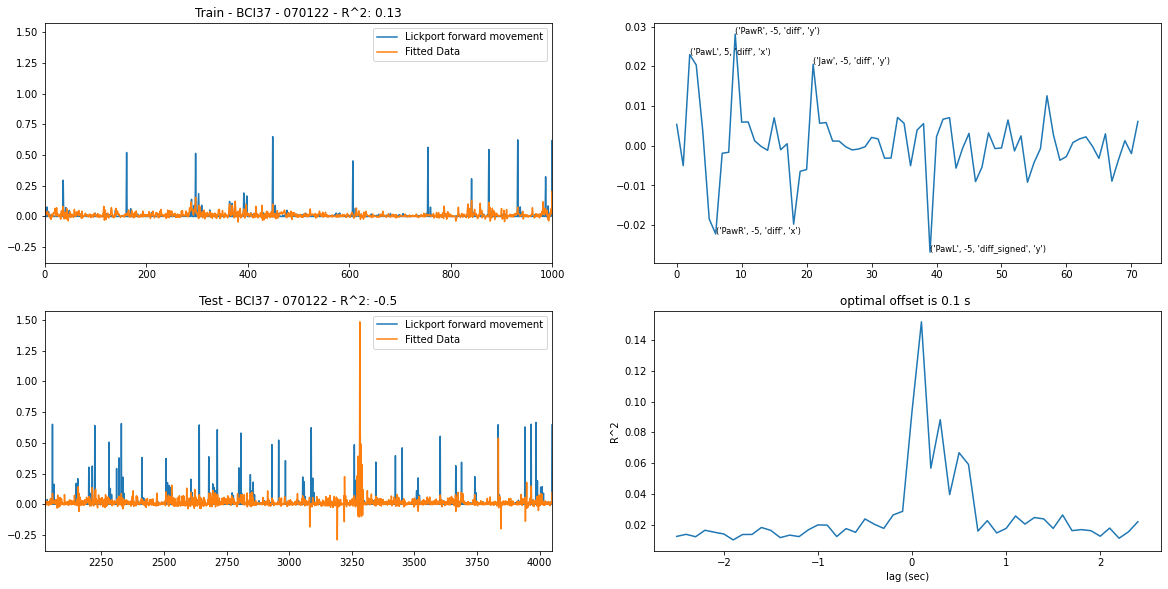

In [331]:
# can we predict lickport movements with behavior??
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import cross_val_score, cross_val_predict
create_lags = True
movement_threshold = .1#5
baseline_length = 40 # before lickport movement
peak_length = 20  # after start of lickport movement
ridge_alpha = 1
lasso_alpha = 0.001#.005
moving_average_win = 5
for needed_session in range(len(multi_session_dict['DLC_aligned'])):

    DLC_aligned= multi_session_dict['DLC_aligned'][needed_session].copy()
    lickport_movement = DLC_aligned['Lickport']['diff_signed']['x'].values   
    
    lickport_movement[lickport_movement<0] = 0
    #lickport_movement = BCI_analysis.plot_utils.rollingfun(lickport_movement,moving_average_win,'mean')
    for k in DLC_aligned.keys():
        if 'mean' in k:# subtract mean from the raw position from day to day
            DLC_aligned[k] = DLC_aligned[k] - np.nanmean(DLC_aligned[k])
            DLC_aligned.pop(k)
    for k in DLC_aligned.keys(): # normalize data
        DLC_aligned[k] = (DLC_aligned[k] - DLC_aligned[k].mean())/DLC_aligned[k].std()

    for k in DLC_aligned.keys(): # remove eye and likelihood
        if 'likelihood'in k or 'eye' in k[0].lower() or 'pole' in k[0].lower():
            DLC_aligned.pop(k)
    for k in DLC_aligned.keys(): # remove lickport
        if 'lickport' in k[0].lower() or 'pole' in k[0].lower() or 'mean' in k: #remove mean as well
            DLC_aligned.pop(k)
    
    #lickport_movement = scipy.stats.zscore(lickport_movement)
    
    trial_end_frames = np.asarray(multi_session_dict['trial_end_frames'][needed_session])
    trial_start_frames = np.concatenate([[0],trial_end_frames[:-1]])
    needed_indices = []
    lickport_movement_magnitudes = []
    baseline_movements = []
    for ti,(tstart,tend) in enumerate(zip(trial_start_frames,trial_end_frames)): #Find the first lickport movement
        
        lickport_movement_now = lickport_movement[tstart:tend]
        lickport_start_idx = np.argmax(lickport_movement_now>movement_threshold)+1
        if tstart+lickport_start_idx>baseline_length:
            lickport_movement_magnitudes.append(np.nanmean(lickport_movement_now[lickport_start_idx:lickport_start_idx+peak_length]))
            baseline_movements.append(np.nanmean(DLC_aligned.iloc[tstart+lickport_start_idx-baseline_length:tstart+lickport_start_idx].values,0))
        lickport_movement_now[lickport_start_idx:] = np.nan
        lickport_movement[tstart:tend] = lickport_movement_now
        needed_indices.append(np.arange(lickport_start_idx)+tstart)
    random.shuffle(needed_indices)
    lickport_movement = lickport_movement[np.concatenate(needed_indices)]
    DLC_aligned = DLC_aligned.iloc[np.concatenate(needed_indices)].reset_index()
    DLC_aligned.pop('index')
    
    ####
    
    X = np.asarray(baseline_movements)
    Y = np.asarray(lickport_movement_magnitudes)
    
    indices = np.arange(len(Y))
    random.shuffle(indices)
    X = X[indices,:]
    Y = Y[indices]
    #scores_, beta_, intercept_ = pipeline_regression.linear_regression(Y, X)
    n_features = X.shape[1]
    lr = LinearRegression()#Ridge(alpha = ridge_alpha)#Lasso(lasso_alpha/100)#
    half = int(len(Y)*.5)
    lr.fit(X[:half,:], Y[:half])
    scores = cross_val_score(lr, X, Y, cv=6)
    #scores_ = np.nanmean(scores)
    scores_=lr.score(X[half:,:], Y[half:])
    beta_ = lr.coef_
    intercept_ = lr.intercept_
    fitted_lickport_movement_magnitudes = (beta_@X.T) + intercept_
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(fitted_lickport_movement_magnitudes[:half],lickport_movement_magnitudes[:half],'k.',label = 'train')
    ax.plot(fitted_lickport_movement_magnitudes[half:],lickport_movement_magnitudes[half:],'r.',label = 'test')
    ax.set_xlabel('predicted lickport movement')
    ax.set_ylabel('actual lickport movement')
    ax.set_title('mean R^2 {}'.format(np.round(np.nanmean(scores),2)))
    ax.legend()
    ###

    #create offsets - in frames
    if create_lags:
        offsets = np.arange(-5,10,5)
        cols_new = []
        for col in DLC_aligned.columns:
            for offset in offsets:
                cols_new.append((col[0],offset,col[1],col[2]))
        df2 = pd.DataFrame(0, index=range(0), columns=cols_new)#dlc_data.columns)

        for k in df2.keys():
            df2[k] = pd.Series(np.roll(DLC_aligned[k[0],k[2],k[3]],k[1]))
        DLC_aligned = df2    


    X = DLC_aligned.values
    #X = BCI_analysis.plot_utils.rollingfun(X,moving_average_win,'mean')
    Y = lickport_movement
    
    offsets = np.arange(-50,50,2)
    beta_list = []
    score_list = []
    for offset in offsets:
        Y_now  =np.roll(Y,offset)
        lr = LinearRegression()#Ridge(alpha = ridge_alpha)#
        lr.fit(X, Y_now)
        score_list.append(lr.score(X, Y_now))
    best_offset = offsets[np.argmax(score_list)]
    Y_now  =np.roll(Y,best_offset)
    
    #scores_, beta_, intercept_ = pipeline_regression.linear_regression(Y, X)
    n_features = X.shape[1]
    lr = LinearRegression()#Ridge(alpha = ridge_alpha)#Lasso(lasso_alpha)#
    half = int(len(Y)*.5)
    lr.fit(X[:half,:], Y[:half])
    scores = cross_val_score(lr, X, Y, cv=6)
    scores_ = np.nanmean(scores)
    scores_train=lr.score(X[:half,:], Y[:half])
    scores_test=lr.score(X[half:,:], Y[half:])
    beta_ = lr.coef_
    intercept_ = lr.intercept_


    
    
    
    #scores_, beta_, intercept_ = pipeline_regression.ridge_regression(F_ctrl[cn:cn+1], DLC_aligned_ctrl)
    # scores_ = scores_[0]
    # beta_ = beta_[0]
    # intercept_ = intercept_[0]
    
    fig = plt.figure(figsize = [20,15])
    ax_trace = fig.add_subplot(3,2,1)
    ax_trace.plot(Y, label=f'Lickport forward movement')
    ax_trace.plot((beta_@X.T) + intercept_, label='Fitted Data')
    #ax_trace.set_xlim([0,5000])
    r2 = np.round(np.nanmean(scores_train),2)
    ax_trace.set_title('Train - {} - {} - R^2: {}'.format(multi_session_dict['mouse'][needed_session], multi_session_dict['session'][needed_session],r2))
    ax_trace.set_xlim([0,np.min([half,1000])])
    ax_trace.legend()
    
    ax_trace_test = fig.add_subplot(3,2,3)
    ax_trace_test.plot(Y, label=f'Lickport forward movement')
    ax_trace_test.plot((beta_@X.T) + intercept_, label='Fitted Data')
    #ax_trace.set_xlim([0,5000])
    r2 = np.round(np.nanmean(scores_test),2)
    ax_trace_test.set_title('Test - {} - {} - R^2: {}'.format(multi_session_dict['mouse'][needed_session], multi_session_dict['session'][needed_session],r2))
    ax_trace_test.set_xlim([half,len(Y)])
    ax_trace_test.legend()

    ax_coef = fig.add_subplot(3,2,2)
    ax_coef.plot(beta_)
    for i in np.argsort(np.abs(beta_))[::-1][:5]:
        ax_coef.text(i,beta_[i],DLC_aligned.keys()[i],fontsize = 'small')
        
    ax_offset = fig.add_subplot(3,2,4)
    ax_offset.plot(offsets/20,score_list)
    ax_offset.set_xlabel('lag (sec)')
    ax_offset.set_ylabel('R^2')
    ax_offset.set_title('optimal offset is {} s '.format(best_offset/20))

In [133]:
import sklearn
sklearn.model_selection.cross_val_score

<function sklearn.model_selection._validation.cross_val_score(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=nan)>

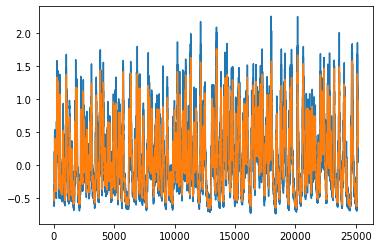

In [387]:
plt.plot(multi_session_dict['F'][ii].T[:,3])
plt.plot(df[:,3])

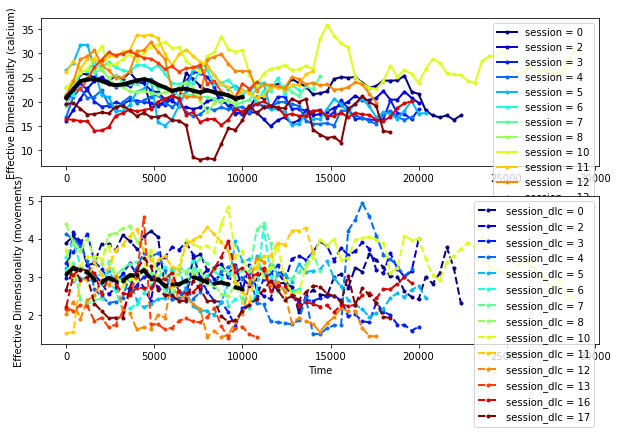

In [388]:
# Matt Bull's dimensionality estimation
from sklearn.decomposition import PCA
import matplotlib.cm as cm

windowsize = 2000
windowstep = 400
PCAcomponents = 100
filt_win  =0
fig = plt.figure(figsize=[10,6])
ax = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2,sharex = ax)
sessionstostudy = multi_session_dict['mat_idx']#np.where(np.array(multi_session_behavior_data['session']).ravel() != None)[0]
cmap = cm.jet(np.linspace(0,1,len(sessionstostudy)))
sessionct=0
traces_calcium =[]
t_ = []
traces_movement = []
for ii,session in enumerate(sessionstostudy):
    neuron = multi_session_behavior_data['conditioned_neuron'][session]
    #df = multi_session_behavior_data['df_closedLoop'][session]
    df = multi_session_dict['F'][ii].T
    if filt_win>1:
        df_filt = []
        for f in df.T:
            df_filt.append(BCI_analysis.plot_utils.rollingfun(f,filt_win,'mean'))
        df=np.asarray(df_filt).T
    dlc = multi_session_dict['DLC_aligned'][ii]
    numwindow = int((df.shape[0]-windowsize)/windowstep)
    dimovertime = np.zeros([numwindow,1])
    dimovertime_dlc = np.zeros([numwindow,1])
    if np.min(df[0:windowsize].shape) > PCAcomponents:
        pca = PCA(n_components=PCAcomponents, svd_solver='full')
        for i in range(numwindow):
            pca.fit(df[i*windowstep:i*windowstep+windowsize,:])
            dimovertime[i] = np.sum(pca.explained_variance_)**2/(np.sum(pca.explained_variance_**2))
            
            pca.fit(dlc[i*windowstep:i*windowstep+windowsize])
            dimovertime_dlc[i] = np.sum(pca.explained_variance_)**2/(np.sum(pca.explained_variance_**2))

        ax.plot(np.arange(numwindow)*windowstep, dimovertime.ravel(),'.-', color=cmap[sessionct,:], lw = 2, label='session = ' + str(session))
        ax2.plot(np.arange(numwindow)*windowstep, dimovertime_dlc.ravel(),'.--', color=cmap[sessionct,:], lw = 2, label='session_dlc = ' + str(session))
        traces_calcium.append(dimovertime.ravel())
        traces_movement.append(dimovertime_dlc.ravel())
    sessionct += 1
    #break

l_ = []
for t in traces_calcium:
    l_.append(len(t))
l_ = np.min(l_)
dim_ca_matrix = np.zeros([len(traces_calcium),l_])
dim_dlc_matrix = np.zeros([len(traces_calcium),l_])
for i,(c,m) in enumerate(zip(traces_calcium,traces_movement)):
    dim_ca_matrix[i,:] = c[:l_]
    dim_dlc_matrix[i,:] = m[:l_]
ax.plot(np.arange(l_)*windowstep,np.mean(dim_ca_matrix,0),'k.-',linewidth = 4)    
ax2.plot(np.arange(l_)*windowstep,np.mean(dim_dlc_matrix,0),'k.--',linewidth = 4)    
   
    
ax.set_ylabel('Effective Dimensionality (calcium)')
ax2.set_ylabel('Effective Dimensionality (movements)')
plt.xlabel('Time')
ax.legend(loc='upper right')
ax2.legend(loc='upper right')
plt.show()



In [27]:
# save DLC data and calcium traces to fit the neural network in FaceMap
import h5py
def save_dict_to_hdf5(h5file, path, data_dict):
    """
    Saves dictionary to an HDF5 file. Adapted from https://github.com/talmolab/sleap/blob/391bc0421fe3820ddd6b5d07e31311d60b129fe3/sleap/util.py#L116
    Calls itself recursively if items in dictionary are not
    `np.ndarray`, `np.int64`, `np.float64`, `str`, or bytes.
    Objects must be iterable.
    Args:
        h5file: The HDF5 filename object to save the data to.
            Assume it is open.
        path: The path to group save the dict under.
        data_dict: The dict containing data to save.
    Raises:
        ValueError: If type for item in dict cannot be saved.
    Returns:
        None
    """
    for key, item in list(data_dict.items()):
        if item is None:
            h5file[path + key] = ""
        elif isinstance(item, bool):
            h5file[path + key] = int(item)
        elif isinstance(item, list):
            items_encoded = []
            for it in item:
                if isinstance(it, str):
                    items_encoded.append(it.encode("utf8"))
                else:
                    items_encoded.append(it)

            h5file[path + key] = np.asarray(items_encoded)
        elif isinstance(item, (str)):
            h5file[path + key] = item.encode("utf8")
        elif isinstance(
            item, (np.ndarray, np.int64, np.float64, str, bytes, float)
        ):
            h5file[path + key] = item
        elif isinstance(item, dict):
            save_dict_to_hdf5(h5file, path + key + "/", item)
        elif isinstance(item, int):
            h5file[path + key] = item
        else:
            raise ValueError("Cannot save %s type" % type(item))
            
            
facemap_keys = ['eye(back)',
                 'eye(bottom)',
                 'eye(front)',
                 'eye(top)',
                 'lowerlip',
                 'mouth',
                 'nose(bottom)',
                 'nose(r)',
                 'nose(tip)',
                 'nose(top)',
                 'nosebridge',
                 'paw',
                 'whisker(I)',
                 'whisker(II)',
                 'whisker(III)']
dict_out = {}
for k in facemap_keys:
    dict_out[k] = {}
dlc_keys = []
dlc_keys_rest = []
for k in DLC_aligned.keys():
    if 'mean' in k:
        dlc_keys.append(k)
    else:
        dlc_keys_rest.append(k)
dlc_keys.extend(dlc_keys_rest)
for i,k in enumerate(dlc_keys):
    idx = int((i-i%3)/3)
    if idx==len(facemap_keys):
        print(k)
        break
    if 'likelihood' in k:
        dict_out[facemap_keys[idx]][k[-1]] = np.ones_like(DLC_aligned[k].values)
    else:
        dict_out[facemap_keys[idx]][k[-1]] = DLC_aligned[k].values
dict_out = {'Facemap':dict_out}           
     
    
with h5py.File("/home/jupyter/bucket/test_movements.h5", "w") as f:
    save_dict_to_hdf5(f, "", dict_out)
np.save("/home/jupyter/bucket/test_neurons.npy",F)
np.save("/home/jupyter/bucket/timestamps.npy",np.arange(F.shape[1]))

from sklearn.decomposition import PCA
PCAcomponents = 100
pca = PCA(n_components=PCAcomponents, svd_solver='full')
pca.fit(F)
np.save("/home/jupyter/bucket/test_neurons_pca.npy",pca.components_)

('NoseTip', -20, 'mean', 'y')


(-5.0, 5.0)

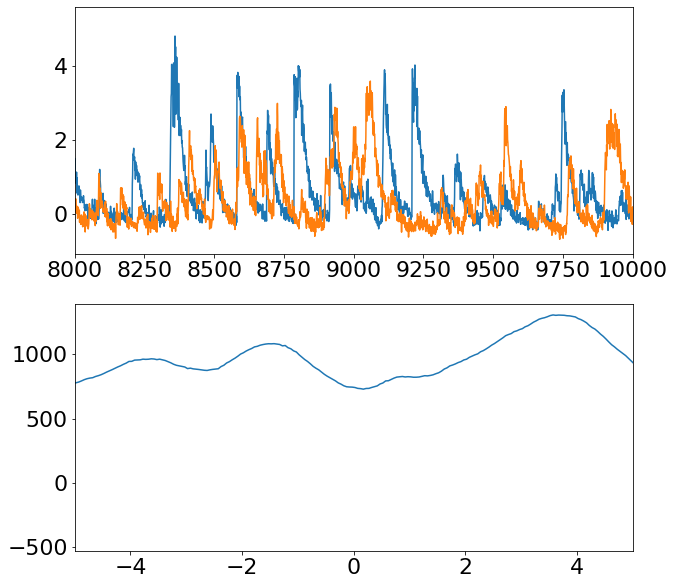

In [36]:
fig = plt.figure(figsize = [10,10])
ax = fig.add_subplot(2,1,1)
ax.plot(F[1,:])
ax.plot(F[3,:])
ax.set_xlim([8000,10000])
import scipy
cc = scipy.signal.correlate(F[1,10000:15000], F[3,10000:15000], mode='full', method='auto')
ax2 = fig.add_subplot(2,1,2)
ax2.plot((np.arange(len(cc))-len(cc)/2)/20,cc)
ax2.set_xlim([-5,5])

In [16]:
# select neurons to predict based on their activity - e.g. exclude cells that have low activity, or include cells that have bit movement-triggered averages, and whatnot - Marton can do this

In [150]:
# predict the activity of the selected neurons from DLC data

## FaceMap model

In [1]:
from facemap.neural_prediction import prediction_utils #neural_activity

# Comparison of day-to-day movements

In [184]:
# extract reward-triggered and go-cue triggered movements of a mouse for ALL sessions
import os
import importlib
importlib.reload(BCI_analysis.pipeline_align)
dlc_base_dir = os.path.abspath("../bucket/Data/Behavior_videos/DLC_output/Bergamo-2P-Photostim/")
bpod_path = os.path.abspath("../bucket/Data/Behavior/BCI_exported/Bergamo-2P-Photostim/")
suite2p_path = os.path.abspath("../bucket/Data/Calcium_imaging/suite2p/Bergamo-2P-Photostim/")
sessionwise_data_path = os.path.abspath("../bucket/Data/Calcium_imaging/sessionwise_tba/")
aligned_data_path = os.path.abspath("../bucket/Data/Calcium_imaging/data_aligned/")
plt_save_path = os.path.abspath("../Plots/")

mouse = "BCI_26"
FOV = "FOV_04"
camera = "side"
session = "041022"
dict_aligned = BCI_analysis.pipeline_align.get_aligned_data(suite2p_path, dlc_base_dir, bpod_path, 
                                                            sessionwise_data_path, aligned_data_path, 
                                                            mouse=mouse, FOV=FOV, camera=camera, 
                                                            session=session, sampling='down', overwrite=False)

# function1: dict_aligned should also have the moving standard deviation and then downsample it. (Paint)
#            Also make sure to have the flouroscence indices.        
# function2: align at some point

File found at /home/jupyter/BCI_analysis/bucket/Data/Calcium_imaging/data_aligned/BCI_26/041022-dict_aligned-downsampled.npy


dict_keys(['F_aligned', 'DLC_aligned', 'dff_aligned', 'lick_times_aligned', 'reward_times_aligned', 'trial_times_aligned', 'cn', 'trials_taken'])


Calculating regression fit for 887 neurons, May take time


100%|██████████| 887/887 [00:20<00:00, 43.11it/s]


In [ ]:
# train a classifier to predict the session ID based on the movements. Can we do it?

# classify single trials with many parameters, if we look at single movements its easier to do it. 
## to focus on sessions that the mouse mightve learnt with movements. 

# look at behavior after the reward vs before the reward. 
# look at trial to trial data. 

#
#
#      Speed (root(vx^2 + vy^2))
#     (moving standard devations)  ----> Random Forest ----> 
#         ------reward------
#
#

import pandas as pd
from sklearn.ensemble import RandomForestClassifier

X = DLC_aligned
y = data['session ID']

clf = RandomForestClassifier()

# Fit the classifier to the data
clf.fit(X, y)
predictions = clf.predict(X)
print(predictions)

